In [1]:
import yfinance as yf
from deep_hedging import *
from SBTS import *
from tools import *

### Market data

In [189]:
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2020-01-30"

data = yf.download(ticker, start=start_date, end=end_date)
N = 60 
X = np.array([data["Close"].values[i:i+N+1]/data["Close"].values[i] for i in range(len(data)-N)])
M = len(X) 
log_returns = np.zeros((M,N+1))
X = X.squeeze()
log_returns[:, 1:] = np.diff(np.log(X), axis = 1)

[*********************100%***********************]  1 of 1 completed


### Generation of synthetic trajectories 

In [221]:
N_pi = 100
h = 0.05
delta = 2/252 
vals = simulate_SBTS_trajectories(log_returns, 1000, h, delta, N_pi, x0=None)

100%|███████████████████████████████████████| 1000/1000 [01:36<00:00, 10.37it/s]


In [223]:
vals_ = np.exp(vals.cumsum(axis = 1))

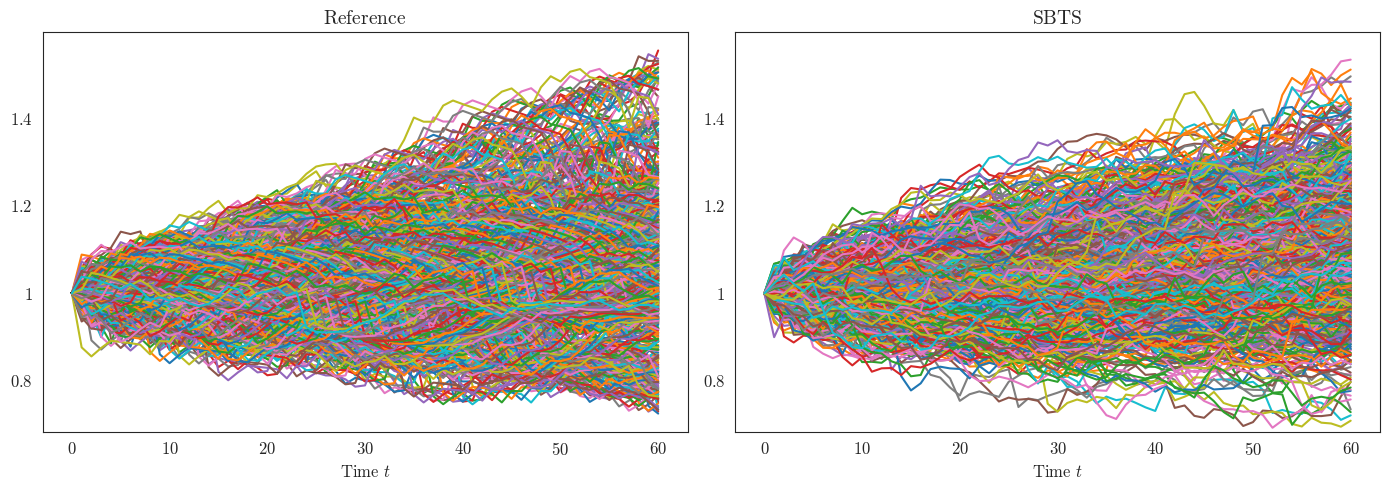

In [87]:
plot_traj_12(X, vals_, samelim=True) 

### Correlation matrix 

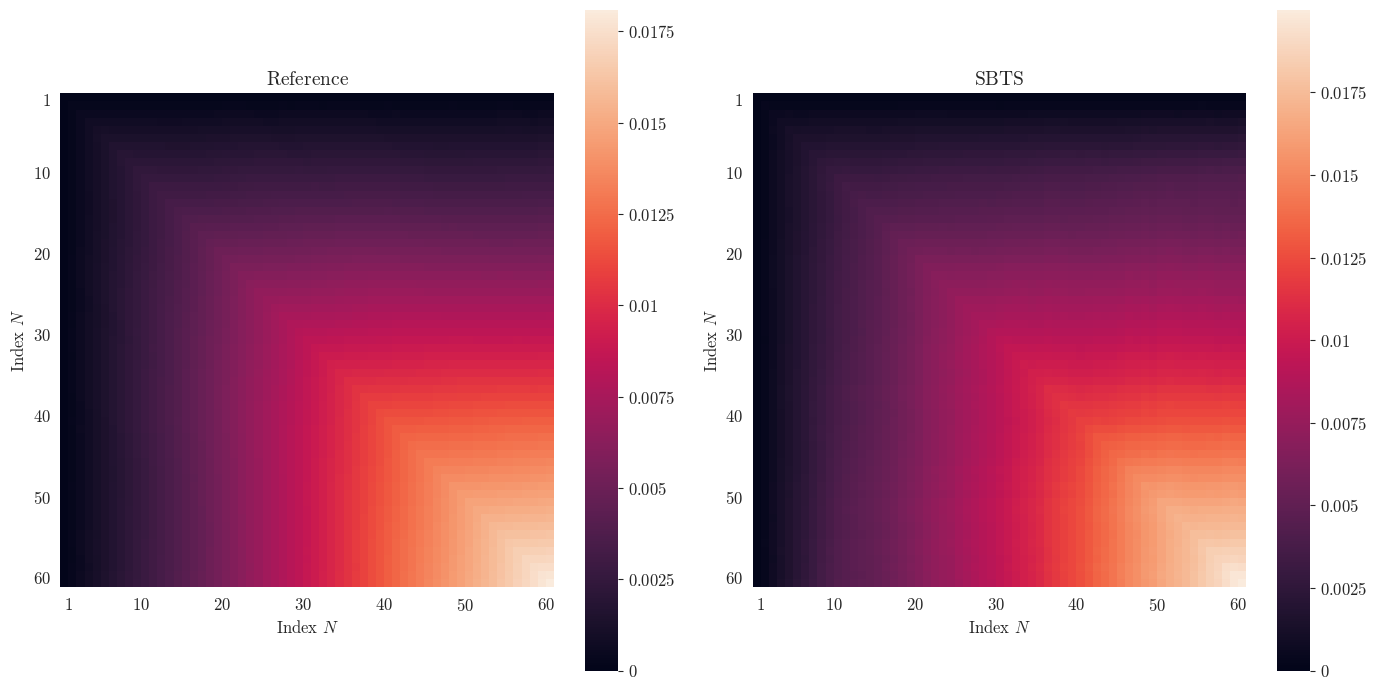

In [229]:
plot_correlation_matrix(X, vals_, N)

### Deep Hedging 

#### Generation of synthetic trajectories 

In [125]:
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2020-01-30"

data = yf.download(ticker, start=start_date, end=end_date)
N = 60 
X = np.array([data["Close"].values[i:i+N+1]/data["Close"].values[i] for i in range(len(data)-N)])
M = len(X) 
log_returns = np.zeros((M, N+1))
X = X.squeeze()
log_returns[:, 1:] = np.diff(np.log(X), axis = 1)

[*********************100%***********************]  1 of 1 completed


In [126]:
N_pi = 100
h = 0.05
delta = 2./252 
vals = simulate_SBTS_trajectories(log_returns, 2500, h, delta, N_pi, x0=None)

100%|███████████████████████████████████████| 2500/2500 [04:43<00:00,  8.82it/s]


In [129]:
vals = np.exp(vals.cumsum(axis = 1))

In [131]:
start_date_val_test = "2020-06-01"
end_date_val_test = "2023-04-30"
data_val_test = yf.download(ticker, start=start_date_val_test, end=end_date_val_test)
X_val_test = np.array([data_val_test["Close"].values[i:i+N+1]/data_val_test["Close"].values[i] for i in range(len(data_val_test)-N)])
X_val_test = X_val_test.squeeze()
test_size = len(X_val_test)//2
dictio = {"train" : X, "val" : X_val_test[:test_size], "test" : X_val_test[test_size:]} 

[*********************100%***********************]  1 of 1 completed


In [133]:
dictio["test"].shape

(337, 61)

#### Training 

In [137]:
num_epochs = 1000
batch_size = 128

In [139]:
DeepHedging_Market = DeepHedging(N, dictio["train"], dictio["val"])
DeepHedging_Market.train(num_epochs, batch_size)

  0%|▏                                         | 3/1000 [00:00<00:43, 22.89it/s]

Époch 1/1000
Train Loss: 0.020457 | Val Loss: 0.020783
Époch 2/1000
Train Loss: 0.014476 | Val Loss: 0.014952
Époch 3/1000
Train Loss: 0.009989 | Val Loss: 0.010326
Époch 4/1000
Train Loss: 0.006394 | Val Loss: 0.006361
Époch 5/1000
Train Loss: 0.003632 | Val Loss: 0.003269
Époch 6/1000


  1%|▍                                         | 9/1000 [00:00<00:35, 27.59it/s]

Train Loss: 0.001936 | Val Loss: 0.001755
Époch 7/1000
Train Loss: 0.001544 | Val Loss: 0.001373
Époch 8/1000
Train Loss: 0.001454 | Val Loss: 0.001244
Époch 9/1000
Train Loss: 0.001358 | Val Loss: 0.001115
Époch 10/1000
Train Loss: 0.001324 | Val Loss: 0.000987
Époch 11/1000
Train Loss: 0.001315 | Val Loss: 0.000967
Époch 12/1000
Train Loss: 0.001309 | Val Loss: 0.000937
Époch 13/1000


  2%|▋                                        | 16/1000 [00:00<00:35, 27.91it/s]

Train Loss: 0.001307 | Val Loss: 0.000910
Époch 14/1000
Train Loss: 0.001276 | Val Loss: 0.000874
Époch 15/1000
Train Loss: 0.001274 | Val Loss: 0.000895
Époch 16/1000
Train Loss: 0.001288 | Val Loss: 0.000822
Époch 17/1000
Train Loss: 0.001259 | Val Loss: 0.000844
Époch 18/1000
Train Loss: 0.001243 | Val Loss: 0.000863
Époch 19/1000


  2%|▉                                        | 24/1000 [00:00<00:33, 29.45it/s]

Train Loss: 0.001226 | Val Loss: 0.000836
Époch 20/1000
Train Loss: 0.001228 | Val Loss: 0.000819
Époch 21/1000
Train Loss: 0.001247 | Val Loss: 0.000812
Époch 22/1000
Train Loss: 0.001200 | Val Loss: 0.000831
Époch 23/1000
Train Loss: 0.001200 | Val Loss: 0.000811
Époch 24/1000
Train Loss: 0.001178 | Val Loss: 0.000808
Époch 25/1000
Train Loss: 0.001158 | Val Loss: 0.000817
Époch 26/1000


  3%|█▎                                       | 31/1000 [00:01<00:32, 29.81it/s]

Train Loss: 0.001144 | Val Loss: 0.000789
Époch 27/1000
Train Loss: 0.001140 | Val Loss: 0.000796
Époch 28/1000
Train Loss: 0.001118 | Val Loss: 0.000786
Époch 29/1000
Train Loss: 0.001105 | Val Loss: 0.000782
Époch 30/1000
Train Loss: 0.001079 | Val Loss: 0.000777
Époch 31/1000
Train Loss: 0.001064 | Val Loss: 0.000747
Époch 32/1000


  4%|█▍                                       | 35/1000 [00:01<00:31, 30.23it/s]

Train Loss: 0.001055 | Val Loss: 0.000730
Époch 33/1000
Train Loss: 0.001013 | Val Loss: 0.000807
Époch 34/1000
Train Loss: 0.001009 | Val Loss: 0.000711
Époch 35/1000
Train Loss: 0.000999 | Val Loss: 0.000737
Époch 36/1000
Train Loss: 0.000980 | Val Loss: 0.000768
Époch 37/1000
Train Loss: 0.000952 | Val Loss: 0.000761
Époch 38/1000
Train Loss: 0.000956 | Val Loss: 0.000750
Époch 39/1000


  4%|█▊                                       | 43/1000 [00:01<00:31, 30.44it/s]

Train Loss: 0.000917 | Val Loss: 0.000746
Époch 40/1000
Train Loss: 0.000885 | Val Loss: 0.000739
Époch 41/1000
Train Loss: 0.000861 | Val Loss: 0.000717
Époch 42/1000
Train Loss: 0.000847 | Val Loss: 0.000811
Époch 43/1000
Train Loss: 0.000825 | Val Loss: 0.000784
Époch 44/1000
Train Loss: 0.000800 | Val Loss: 0.000752
Époch 45/1000
Train Loss: 0.000773 | Val Loss: 0.000748
Époch 46/1000


  5%|██                                       | 51/1000 [00:01<00:31, 30.56it/s]

Train Loss: 0.000729 | Val Loss: 0.000786
Époch 47/1000
Train Loss: 0.000707 | Val Loss: 0.000833
Époch 48/1000
Train Loss: 0.000681 | Val Loss: 0.000894
Époch 49/1000
Train Loss: 0.000666 | Val Loss: 0.000909
Époch 50/1000
Train Loss: 0.000623 | Val Loss: 0.000870
Époch 51/1000
Train Loss: 0.000609 | Val Loss: 0.000888
Époch 52/1000
Train Loss: 0.000587 | Val Loss: 0.000974
Époch 53/1000


  6%|██▍                                      | 59/1000 [00:01<00:30, 30.77it/s]

Train Loss: 0.000583 | Val Loss: 0.001029
Époch 54/1000
Train Loss: 0.000556 | Val Loss: 0.001075
Époch 55/1000
Train Loss: 0.000547 | Val Loss: 0.001146
Époch 56/1000
Train Loss: 0.000546 | Val Loss: 0.001134
Époch 57/1000
Train Loss: 0.000528 | Val Loss: 0.001155
Époch 58/1000
Train Loss: 0.000534 | Val Loss: 0.001173
Époch 59/1000
Train Loss: 0.000523 | Val Loss: 0.001252
Époch 60/1000


  6%|██▌                                      | 63/1000 [00:02<00:30, 30.98it/s]

Train Loss: 0.000523 | Val Loss: 0.001358
Époch 61/1000
Train Loss: 0.000515 | Val Loss: 0.001468
Époch 62/1000
Train Loss: 0.000531 | Val Loss: 0.001319
Époch 63/1000
Train Loss: 0.000512 | Val Loss: 0.001357
Époch 64/1000
Train Loss: 0.000521 | Val Loss: 0.001288
Époch 65/1000
Train Loss: 0.000524 | Val Loss: 0.001362
Époch 66/1000
Train Loss: 0.000523 | Val Loss: 0.001453
Époch 67/1000


  7%|██▉                                      | 71/1000 [00:02<00:29, 31.11it/s]

Train Loss: 0.000515 | Val Loss: 0.001376
Époch 68/1000
Train Loss: 0.000509 | Val Loss: 0.001342
Époch 69/1000
Train Loss: 0.000505 | Val Loss: 0.001313
Époch 70/1000
Train Loss: 0.000511 | Val Loss: 0.001350
Époch 71/1000
Train Loss: 0.000516 | Val Loss: 0.001365
Époch 72/1000
Train Loss: 0.000505 | Val Loss: 0.001431
Époch 73/1000
Train Loss: 0.000519 | Val Loss: 0.001325
Époch 74/1000


  8%|███▏                                     | 79/1000 [00:02<00:30, 30.17it/s]

Train Loss: 0.000513 | Val Loss: 0.001295
Époch 75/1000
Train Loss: 0.000518 | Val Loss: 0.001398
Époch 76/1000
Train Loss: 0.000503 | Val Loss: 0.001483
Époch 77/1000
Train Loss: 0.000521 | Val Loss: 0.001444
Époch 78/1000
Train Loss: 0.000524 | Val Loss: 0.001394
Époch 79/1000
Train Loss: 0.000504 | Val Loss: 0.001349
Époch 80/1000


  8%|███▍                                     | 83/1000 [00:02<00:30, 30.46it/s]

Train Loss: 0.000510 | Val Loss: 0.001350
Époch 81/1000
Train Loss: 0.000496 | Val Loss: 0.001328
Époch 82/1000
Train Loss: 0.000513 | Val Loss: 0.001360
Époch 83/1000
Train Loss: 0.000504 | Val Loss: 0.001332
Époch 84/1000
Train Loss: 0.000505 | Val Loss: 0.001435
Époch 85/1000
Train Loss: 0.000498 | Val Loss: 0.001380
Époch 86/1000
Train Loss: 0.000511 | Val Loss: 0.001463
Époch 87/1000


  9%|███▋                                     | 91/1000 [00:03<00:29, 30.45it/s]

Train Loss: 0.000505 | Val Loss: 0.001390
Époch 88/1000
Train Loss: 0.000495 | Val Loss: 0.001429
Époch 89/1000
Train Loss: 0.000518 | Val Loss: 0.001537
Époch 90/1000
Train Loss: 0.000534 | Val Loss: 0.001460
Époch 91/1000
Train Loss: 0.000509 | Val Loss: 0.001395
Époch 92/1000
Train Loss: 0.000495 | Val Loss: 0.001329
Époch 93/1000
Train Loss: 0.000498 | Val Loss: 0.001325
Époch 94/1000


 10%|████                                     | 99/1000 [00:03<00:29, 30.16it/s]

Train Loss: 0.000501 | Val Loss: 0.001355
Époch 95/1000
Train Loss: 0.000493 | Val Loss: 0.001443
Époch 96/1000
Train Loss: 0.000494 | Val Loss: 0.001368
Époch 97/1000
Train Loss: 0.000511 | Val Loss: 0.001407
Époch 98/1000
Train Loss: 0.000495 | Val Loss: 0.001313
Époch 99/1000
Train Loss: 0.000494 | Val Loss: 0.001410
Époch 100/1000


 10%|████                                    | 103/1000 [00:03<00:29, 30.22it/s]

Train Loss: 0.000492 | Val Loss: 0.001377
Époch 101/1000
Train Loss: 0.000481 | Val Loss: 0.001322
Époch 102/1000
Train Loss: 0.000486 | Val Loss: 0.001334
Époch 103/1000
Train Loss: 0.000494 | Val Loss: 0.001345
Époch 104/1000
Train Loss: 0.000479 | Val Loss: 0.001285
Époch 105/1000
Train Loss: 0.000500 | Val Loss: 0.001377
Époch 106/1000
Train Loss: 0.000491 | Val Loss: 0.001410
Époch 107/1000


 11%|████▍                                   | 111/1000 [00:03<00:29, 30.54it/s]

Train Loss: 0.000481 | Val Loss: 0.001409
Époch 108/1000
Train Loss: 0.000482 | Val Loss: 0.001450
Époch 109/1000
Train Loss: 0.000501 | Val Loss: 0.001520
Époch 110/1000
Train Loss: 0.000500 | Val Loss: 0.001315
Époch 111/1000
Train Loss: 0.000499 | Val Loss: 0.001338
Époch 112/1000
Train Loss: 0.000487 | Val Loss: 0.001334
Époch 113/1000
Train Loss: 0.000481 | Val Loss: 0.001310
Époch 114/1000


 12%|████▊                                   | 119/1000 [00:03<00:29, 29.54it/s]

Train Loss: 0.000477 | Val Loss: 0.001283
Époch 115/1000
Train Loss: 0.000473 | Val Loss: 0.001270
Époch 116/1000
Train Loss: 0.000490 | Val Loss: 0.001359
Époch 117/1000
Train Loss: 0.000473 | Val Loss: 0.001307
Époch 118/1000
Train Loss: 0.000468 | Val Loss: 0.001470
Époch 119/1000
Train Loss: 0.000481 | Val Loss: 0.001461
Époch 120/1000


 12%|████▉                                   | 123/1000 [00:04<00:29, 29.88it/s]

Train Loss: 0.000473 | Val Loss: 0.001294
Époch 121/1000
Train Loss: 0.000467 | Val Loss: 0.001262
Époch 122/1000
Train Loss: 0.000468 | Val Loss: 0.001322
Époch 123/1000
Train Loss: 0.000468 | Val Loss: 0.001263
Époch 124/1000
Train Loss: 0.000465 | Val Loss: 0.001259
Époch 125/1000
Train Loss: 0.000467 | Val Loss: 0.001229
Époch 126/1000
Train Loss: 0.000466 | Val Loss: 0.001246
Époch 127/1000


 13%|█████▏                                  | 131/1000 [00:04<00:29, 29.21it/s]

Train Loss: 0.000466 | Val Loss: 0.001226
Époch 128/1000
Train Loss: 0.000466 | Val Loss: 0.001246
Époch 129/1000
Train Loss: 0.000462 | Val Loss: 0.001305
Époch 130/1000
Train Loss: 0.000460 | Val Loss: 0.001297
Époch 131/1000
Train Loss: 0.000459 | Val Loss: 0.001310
Époch 132/1000
Train Loss: 0.000460 | Val Loss: 0.001373
Époch 133/1000


 14%|█████▌                                  | 138/1000 [00:04<00:28, 29.75it/s]

Train Loss: 0.000454 | Val Loss: 0.001246
Époch 134/1000
Train Loss: 0.000457 | Val Loss: 0.001324
Époch 135/1000
Train Loss: 0.000451 | Val Loss: 0.001215
Époch 136/1000
Train Loss: 0.000449 | Val Loss: 0.001228
Époch 137/1000
Train Loss: 0.000452 | Val Loss: 0.001184
Époch 138/1000
Train Loss: 0.000449 | Val Loss: 0.001273
Époch 139/1000
Train Loss: 0.000451 | Val Loss: 0.001276
Époch 140/1000


 15%|█████▊                                  | 146/1000 [00:04<00:28, 30.26it/s]

Train Loss: 0.000444 | Val Loss: 0.001274
Époch 141/1000
Train Loss: 0.000460 | Val Loss: 0.001242
Époch 142/1000
Train Loss: 0.000439 | Val Loss: 0.001225
Époch 143/1000
Train Loss: 0.000438 | Val Loss: 0.001175
Époch 144/1000
Train Loss: 0.000440 | Val Loss: 0.001219
Époch 145/1000
Train Loss: 0.000439 | Val Loss: 0.001211
Époch 146/1000
Train Loss: 0.000436 | Val Loss: 0.001256
Époch 147/1000


 15%|██████                                  | 150/1000 [00:05<00:28, 30.06it/s]

Train Loss: 0.000443 | Val Loss: 0.001240
Époch 148/1000
Train Loss: 0.000449 | Val Loss: 0.001144
Époch 149/1000
Train Loss: 0.000445 | Val Loss: 0.001131
Époch 150/1000
Train Loss: 0.000431 | Val Loss: 0.001144
Époch 151/1000
Train Loss: 0.000422 | Val Loss: 0.001144
Époch 152/1000
Train Loss: 0.000422 | Val Loss: 0.001188
Époch 153/1000
Train Loss: 0.000440 | Val Loss: 0.001168
Époch 154/1000


 16%|██████▎                                 | 158/1000 [00:05<00:27, 30.25it/s]

Train Loss: 0.000420 | Val Loss: 0.001148
Époch 155/1000
Train Loss: 0.000418 | Val Loss: 0.001168
Époch 156/1000
Train Loss: 0.000416 | Val Loss: 0.001193
Époch 157/1000
Train Loss: 0.000410 | Val Loss: 0.001120
Époch 158/1000
Train Loss: 0.000410 | Val Loss: 0.001082
Époch 159/1000
Train Loss: 0.000409 | Val Loss: 0.001076
Époch 160/1000
Train Loss: 0.000411 | Val Loss: 0.001118
Époch 161/1000


 17%|██████▋                                 | 166/1000 [00:05<00:27, 30.38it/s]

Train Loss: 0.000401 | Val Loss: 0.001113
Époch 162/1000
Train Loss: 0.000398 | Val Loss: 0.001188
Époch 163/1000
Train Loss: 0.000400 | Val Loss: 0.001153
Époch 164/1000
Train Loss: 0.000402 | Val Loss: 0.001094
Époch 165/1000
Train Loss: 0.000394 | Val Loss: 0.001051
Époch 166/1000
Train Loss: 0.000395 | Val Loss: 0.001104
Époch 167/1000
Train Loss: 0.000403 | Val Loss: 0.001045
Époch 168/1000


 17%|██████▉                                 | 174/1000 [00:05<00:27, 30.47it/s]

Train Loss: 0.000383 | Val Loss: 0.001032
Époch 169/1000
Train Loss: 0.000381 | Val Loss: 0.001000
Époch 170/1000
Train Loss: 0.000384 | Val Loss: 0.000970
Époch 171/1000
Train Loss: 0.000378 | Val Loss: 0.001017
Époch 172/1000
Train Loss: 0.000378 | Val Loss: 0.001085
Époch 173/1000
Train Loss: 0.000378 | Val Loss: 0.000949
Époch 174/1000
Train Loss: 0.000377 | Val Loss: 0.000987
Époch 175/1000


 18%|███████                                 | 178/1000 [00:05<00:26, 30.51it/s]

Train Loss: 0.000373 | Val Loss: 0.001013
Époch 176/1000
Train Loss: 0.000369 | Val Loss: 0.001005
Époch 177/1000
Train Loss: 0.000359 | Val Loss: 0.000957
Époch 178/1000
Train Loss: 0.000358 | Val Loss: 0.000945
Époch 179/1000
Train Loss: 0.000354 | Val Loss: 0.000913
Époch 180/1000
Train Loss: 0.000357 | Val Loss: 0.000880
Époch 181/1000
Train Loss: 0.000370 | Val Loss: 0.000916
Époch 182/1000


 19%|███████▍                                | 186/1000 [00:06<00:26, 30.58it/s]

Train Loss: 0.000349 | Val Loss: 0.000898
Époch 183/1000
Train Loss: 0.000349 | Val Loss: 0.000983
Époch 184/1000
Train Loss: 0.000350 | Val Loss: 0.000898
Époch 185/1000
Train Loss: 0.000338 | Val Loss: 0.000821
Époch 186/1000
Train Loss: 0.000344 | Val Loss: 0.000819
Époch 187/1000
Train Loss: 0.000338 | Val Loss: 0.000935
Époch 188/1000
Train Loss: 0.000333 | Val Loss: 0.000812
Époch 189/1000


 19%|███████▊                                | 194/1000 [00:06<00:27, 29.19it/s]

Train Loss: 0.000333 | Val Loss: 0.000844
Époch 190/1000
Train Loss: 0.000331 | Val Loss: 0.000849
Époch 191/1000
Train Loss: 0.000331 | Val Loss: 0.000868
Époch 192/1000
Train Loss: 0.000328 | Val Loss: 0.000831
Époch 193/1000
Train Loss: 0.000323 | Val Loss: 0.000752
Époch 194/1000
Train Loss: 0.000323 | Val Loss: 0.000794
Époch 195/1000


 20%|████████                                | 200/1000 [00:06<00:28, 27.85it/s]

Train Loss: 0.000328 | Val Loss: 0.000798
Époch 196/1000
Train Loss: 0.000322 | Val Loss: 0.000834
Époch 197/1000
Train Loss: 0.000317 | Val Loss: 0.000769
Époch 198/1000
Train Loss: 0.000315 | Val Loss: 0.000768
Époch 199/1000
Train Loss: 0.000316 | Val Loss: 0.000829
Époch 200/1000
Train Loss: 0.000318 | Val Loss: 0.000709
Époch 201/1000


 21%|████████▎                               | 207/1000 [00:06<00:27, 29.12it/s]

Train Loss: 0.000324 | Val Loss: 0.000700
Époch 202/1000
Train Loss: 0.000313 | Val Loss: 0.000735
Époch 203/1000
Train Loss: 0.000314 | Val Loss: 0.000703
Époch 204/1000
Train Loss: 0.000312 | Val Loss: 0.000798
Époch 205/1000
Train Loss: 0.000311 | Val Loss: 0.000720
Époch 206/1000
Train Loss: 0.000307 | Val Loss: 0.000650
Époch 207/1000
Train Loss: 0.000313 | Val Loss: 0.000710
Époch 208/1000


 21%|████████▌                               | 213/1000 [00:07<00:28, 27.87it/s]

Train Loss: 0.000308 | Val Loss: 0.000707
Époch 209/1000
Train Loss: 0.000302 | Val Loss: 0.000715
Époch 210/1000
Train Loss: 0.000301 | Val Loss: 0.000681
Époch 211/1000
Train Loss: 0.000307 | Val Loss: 0.000696
Époch 212/1000
Train Loss: 0.000306 | Val Loss: 0.000708
Époch 213/1000
Train Loss: 0.000302 | Val Loss: 0.000693
Époch 214/1000


 22%|████████▋                               | 216/1000 [00:07<00:27, 28.44it/s]

Train Loss: 0.000309 | Val Loss: 0.000646
Époch 215/1000
Train Loss: 0.000302 | Val Loss: 0.000637
Époch 216/1000
Train Loss: 0.000298 | Val Loss: 0.000694
Époch 217/1000
Train Loss: 0.000300 | Val Loss: 0.000616
Époch 218/1000
Train Loss: 0.000316 | Val Loss: 0.000579
Époch 219/1000


 22%|████████▉                               | 222/1000 [00:07<00:30, 25.36it/s]

Train Loss: 0.000300 | Val Loss: 0.000719
Époch 220/1000
Train Loss: 0.000310 | Val Loss: 0.000645
Époch 221/1000
Train Loss: 0.000297 | Val Loss: 0.000678
Époch 222/1000
Train Loss: 0.000295 | Val Loss: 0.000654
Époch 223/1000
Train Loss: 0.000298 | Val Loss: 0.000669
Époch 224/1000
Train Loss: 0.000297 | Val Loss: 0.000681
Époch 225/1000


 23%|█████████▏                              | 229/1000 [00:07<00:27, 27.69it/s]

Train Loss: 0.000300 | Val Loss: 0.000638
Époch 226/1000
Train Loss: 0.000295 | Val Loss: 0.000648
Époch 227/1000
Train Loss: 0.000299 | Val Loss: 0.000630
Époch 228/1000
Train Loss: 0.000294 | Val Loss: 0.000629
Époch 229/1000
Train Loss: 0.000293 | Val Loss: 0.000673
Époch 230/1000
Train Loss: 0.000293 | Val Loss: 0.000628
Époch 231/1000
Train Loss: 0.000292 | Val Loss: 0.000661
Époch 232/1000


 24%|█████████▍                              | 235/1000 [00:07<00:26, 28.64it/s]

Train Loss: 0.000291 | Val Loss: 0.000649
Époch 233/1000
Train Loss: 0.000294 | Val Loss: 0.000577
Époch 234/1000
Train Loss: 0.000303 | Val Loss: 0.000630
Époch 235/1000
Train Loss: 0.000294 | Val Loss: 0.000590
Époch 236/1000
Train Loss: 0.000299 | Val Loss: 0.000659
Époch 237/1000
Train Loss: 0.000289 | Val Loss: 0.000617
Époch 238/1000
Train Loss: 0.000292 | Val Loss: 0.000635
Époch 239/1000


 24%|█████████▋                              | 242/1000 [00:08<00:25, 29.21it/s]

Train Loss: 0.000289 | Val Loss: 0.000600
Époch 240/1000
Train Loss: 0.000298 | Val Loss: 0.000630
Époch 241/1000
Train Loss: 0.000294 | Val Loss: 0.000688
Époch 242/1000
Train Loss: 0.000297 | Val Loss: 0.000552
Époch 243/1000
Train Loss: 0.000297 | Val Loss: 0.000613
Époch 244/1000
Train Loss: 0.000289 | Val Loss: 0.000600
Époch 245/1000


 25%|█████████▉                              | 248/1000 [00:08<00:26, 28.00it/s]

Train Loss: 0.000291 | Val Loss: 0.000663
Époch 246/1000
Train Loss: 0.000286 | Val Loss: 0.000595
Époch 247/1000
Train Loss: 0.000288 | Val Loss: 0.000619
Époch 248/1000
Train Loss: 0.000287 | Val Loss: 0.000577
Époch 249/1000
Train Loss: 0.000299 | Val Loss: 0.000685
Époch 250/1000
Train Loss: 0.000287 | Val Loss: 0.000627
Époch 251/1000


 26%|██████████▏                             | 255/1000 [00:08<00:25, 29.01it/s]

Train Loss: 0.000288 | Val Loss: 0.000638
Époch 252/1000
Train Loss: 0.000286 | Val Loss: 0.000582
Époch 253/1000
Train Loss: 0.000290 | Val Loss: 0.000661
Époch 254/1000
Train Loss: 0.000286 | Val Loss: 0.000549
Époch 255/1000
Train Loss: 0.000290 | Val Loss: 0.000591
Époch 256/1000
Train Loss: 0.000284 | Val Loss: 0.000679
Époch 257/1000
Train Loss: 0.000290 | Val Loss: 0.000591
Époch 258/1000


 26%|██████████▌                             | 263/1000 [00:08<00:24, 29.79it/s]

Train Loss: 0.000283 | Val Loss: 0.000585
Époch 259/1000
Train Loss: 0.000284 | Val Loss: 0.000591
Époch 260/1000
Train Loss: 0.000290 | Val Loss: 0.000547
Époch 261/1000
Train Loss: 0.000280 | Val Loss: 0.000564
Époch 262/1000
Train Loss: 0.000284 | Val Loss: 0.000573
Époch 263/1000
Train Loss: 0.000279 | Val Loss: 0.000586
Époch 264/1000
Train Loss: 0.000280 | Val Loss: 0.000563
Époch 265/1000


 27%|██████████▊                             | 270/1000 [00:09<00:24, 29.91it/s]

Train Loss: 0.000284 | Val Loss: 0.000609
Époch 266/1000
Train Loss: 0.000283 | Val Loss: 0.000553
Époch 267/1000
Train Loss: 0.000277 | Val Loss: 0.000557
Époch 268/1000
Train Loss: 0.000281 | Val Loss: 0.000616
Époch 269/1000
Train Loss: 0.000279 | Val Loss: 0.000569
Époch 270/1000
Train Loss: 0.000275 | Val Loss: 0.000548
Époch 271/1000
Train Loss: 0.000280 | Val Loss: 0.000566
Époch 272/1000


 28%|███████████                             | 277/1000 [00:09<00:24, 30.04it/s]

Train Loss: 0.000281 | Val Loss: 0.000619
Époch 273/1000
Train Loss: 0.000280 | Val Loss: 0.000563
Époch 274/1000
Train Loss: 0.000275 | Val Loss: 0.000568
Époch 275/1000
Train Loss: 0.000278 | Val Loss: 0.000529
Époch 276/1000
Train Loss: 0.000275 | Val Loss: 0.000512
Époch 277/1000
Train Loss: 0.000281 | Val Loss: 0.000588
Époch 278/1000
Train Loss: 0.000276 | Val Loss: 0.000586
Époch 279/1000


 28%|███████████▍                            | 285/1000 [00:09<00:23, 30.17it/s]

Train Loss: 0.000275 | Val Loss: 0.000539
Époch 280/1000
Train Loss: 0.000274 | Val Loss: 0.000608
Époch 281/1000
Train Loss: 0.000271 | Val Loss: 0.000560
Époch 282/1000
Train Loss: 0.000275 | Val Loss: 0.000577
Époch 283/1000
Train Loss: 0.000270 | Val Loss: 0.000562
Époch 284/1000
Train Loss: 0.000271 | Val Loss: 0.000530
Époch 285/1000
Train Loss: 0.000275 | Val Loss: 0.000562
Époch 286/1000
Train Loss: 0.000271 | Val Loss: 0.000540
Époch 287/1000
Train Loss: 0.000270 | Val Loss: 0.000512
Époch 288/1000
Train Loss: 0.000271 | Val Loss: 0.000584
Époch 289/1000


 29%|███████████▋                            | 292/1000 [00:10<00:29, 24.08it/s]

Train Loss: 0.000272 | Val Loss: 0.000574
Époch 290/1000
Train Loss: 0.000278 | Val Loss: 0.000534
Époch 291/1000
Train Loss: 0.000276 | Val Loss: 0.000563
Époch 292/1000
Train Loss: 0.000274 | Val Loss: 0.000515
Époch 293/1000
Train Loss: 0.000279 | Val Loss: 0.000519
Époch 294/1000
Train Loss: 0.000271 | Val Loss: 0.000542
Époch 295/1000


 30%|███████████▉                            | 298/1000 [00:10<00:27, 25.93it/s]

Train Loss: 0.000268 | Val Loss: 0.000511
Époch 296/1000
Train Loss: 0.000266 | Val Loss: 0.000503
Époch 297/1000
Train Loss: 0.000268 | Val Loss: 0.000505
Époch 298/1000
Train Loss: 0.000266 | Val Loss: 0.000534
Époch 299/1000
Train Loss: 0.000263 | Val Loss: 0.000520
Époch 300/1000
Train Loss: 0.000271 | Val Loss: 0.000530
Époch 301/1000


 30%|████████████▏                           | 304/1000 [00:10<00:25, 27.23it/s]

Train Loss: 0.000266 | Val Loss: 0.000534
Époch 302/1000
Train Loss: 0.000267 | Val Loss: 0.000500
Époch 303/1000
Train Loss: 0.000264 | Val Loss: 0.000562
Époch 304/1000
Train Loss: 0.000262 | Val Loss: 0.000503
Époch 305/1000
Train Loss: 0.000259 | Val Loss: 0.000537
Époch 306/1000
Train Loss: 0.000259 | Val Loss: 0.000488
Époch 307/1000


 31%|████████████▍                           | 310/1000 [00:10<00:26, 26.36it/s]

Train Loss: 0.000260 | Val Loss: 0.000511
Époch 308/1000
Train Loss: 0.000269 | Val Loss: 0.000502
Époch 309/1000
Train Loss: 0.000265 | Val Loss: 0.000453
Époch 310/1000
Train Loss: 0.000263 | Val Loss: 0.000545
Époch 311/1000
Train Loss: 0.000269 | Val Loss: 0.000548
Époch 312/1000
Train Loss: 0.000263 | Val Loss: 0.000512
Époch 313/1000


 32%|████████████▋                           | 316/1000 [00:10<00:24, 27.38it/s]

Train Loss: 0.000261 | Val Loss: 0.000510
Époch 314/1000
Train Loss: 0.000260 | Val Loss: 0.000541
Époch 315/1000
Train Loss: 0.000262 | Val Loss: 0.000462
Époch 316/1000
Train Loss: 0.000261 | Val Loss: 0.000540
Époch 317/1000
Train Loss: 0.000262 | Val Loss: 0.000489
Époch 318/1000
Train Loss: 0.000262 | Val Loss: 0.000561
Époch 319/1000


 32%|████████████▉                           | 322/1000 [00:11<00:26, 25.95it/s]

Train Loss: 0.000267 | Val Loss: 0.000510
Époch 320/1000
Train Loss: 0.000258 | Val Loss: 0.000483
Époch 321/1000
Train Loss: 0.000261 | Val Loss: 0.000509
Époch 322/1000
Train Loss: 0.000255 | Val Loss: 0.000480
Époch 323/1000
Train Loss: 0.000256 | Val Loss: 0.000512
Époch 324/1000


 33%|█████████████                           | 328/1000 [00:11<00:30, 21.95it/s]

Train Loss: 0.000259 | Val Loss: 0.000495
Époch 325/1000
Train Loss: 0.000260 | Val Loss: 0.000477
Époch 326/1000
Train Loss: 0.000258 | Val Loss: 0.000569
Époch 327/1000
Train Loss: 0.000262 | Val Loss: 0.000446
Époch 328/1000
Train Loss: 0.000255 | Val Loss: 0.000529
Époch 329/1000


 33%|█████████████▎                          | 334/1000 [00:11<00:27, 24.35it/s]

Train Loss: 0.000256 | Val Loss: 0.000491
Époch 330/1000
Train Loss: 0.000253 | Val Loss: 0.000514
Époch 331/1000
Train Loss: 0.000254 | Val Loss: 0.000524
Époch 332/1000
Train Loss: 0.000255 | Val Loss: 0.000509
Époch 333/1000
Train Loss: 0.000261 | Val Loss: 0.000506
Époch 334/1000
Train Loss: 0.000261 | Val Loss: 0.000449
Époch 335/1000


 34%|█████████████▌                          | 340/1000 [00:11<00:25, 25.88it/s]

Train Loss: 0.000256 | Val Loss: 0.000510
Époch 336/1000
Train Loss: 0.000251 | Val Loss: 0.000447
Époch 337/1000
Train Loss: 0.000260 | Val Loss: 0.000500
Époch 338/1000
Train Loss: 0.000247 | Val Loss: 0.000501
Époch 339/1000
Train Loss: 0.000251 | Val Loss: 0.000473
Époch 340/1000
Train Loss: 0.000252 | Val Loss: 0.000462
Époch 341/1000


 35%|█████████████▊                          | 346/1000 [00:12<00:24, 26.46it/s]

Train Loss: 0.000246 | Val Loss: 0.000524
Époch 342/1000
Train Loss: 0.000252 | Val Loss: 0.000473
Époch 343/1000
Train Loss: 0.000246 | Val Loss: 0.000467
Époch 344/1000
Train Loss: 0.000246 | Val Loss: 0.000485
Époch 345/1000
Train Loss: 0.000248 | Val Loss: 0.000460
Époch 346/1000
Train Loss: 0.000248 | Val Loss: 0.000525
Époch 347/1000


 35%|██████████████                          | 352/1000 [00:12<00:24, 26.19it/s]

Train Loss: 0.000247 | Val Loss: 0.000445
Époch 348/1000
Train Loss: 0.000251 | Val Loss: 0.000470
Époch 349/1000
Train Loss: 0.000245 | Val Loss: 0.000510
Époch 350/1000
Train Loss: 0.000246 | Val Loss: 0.000470
Époch 351/1000
Train Loss: 0.000246 | Val Loss: 0.000465
Époch 352/1000
Train Loss: 0.000245 | Val Loss: 0.000489
Époch 353/1000


 36%|██████████████▎                         | 358/1000 [00:12<00:23, 27.52it/s]

Train Loss: 0.000245 | Val Loss: 0.000447
Époch 354/1000
Train Loss: 0.000244 | Val Loss: 0.000507
Époch 355/1000
Train Loss: 0.000243 | Val Loss: 0.000478
Époch 356/1000
Train Loss: 0.000243 | Val Loss: 0.000474
Époch 357/1000
Train Loss: 0.000243 | Val Loss: 0.000489
Époch 358/1000
Train Loss: 0.000242 | Val Loss: 0.000466
Époch 359/1000


 36%|██████████████▌                         | 364/1000 [00:12<00:22, 28.40it/s]

Train Loss: 0.000243 | Val Loss: 0.000466
Époch 360/1000
Train Loss: 0.000240 | Val Loss: 0.000474
Époch 361/1000
Train Loss: 0.000241 | Val Loss: 0.000455
Époch 362/1000
Train Loss: 0.000244 | Val Loss: 0.000477
Époch 363/1000
Train Loss: 0.000240 | Val Loss: 0.000452
Époch 364/1000
Train Loss: 0.000241 | Val Loss: 0.000539
Époch 365/1000


 37%|██████████████▊                         | 370/1000 [00:12<00:22, 28.56it/s]

Train Loss: 0.000245 | Val Loss: 0.000434
Époch 366/1000
Train Loss: 0.000248 | Val Loss: 0.000532
Époch 367/1000
Train Loss: 0.000251 | Val Loss: 0.000465
Époch 368/1000
Train Loss: 0.000242 | Val Loss: 0.000459
Époch 369/1000
Train Loss: 0.000240 | Val Loss: 0.000497
Époch 370/1000
Train Loss: 0.000239 | Val Loss: 0.000475
Époch 371/1000


 38%|███████████████                         | 376/1000 [00:13<00:21, 28.70it/s]

Train Loss: 0.000240 | Val Loss: 0.000480
Époch 372/1000
Train Loss: 0.000236 | Val Loss: 0.000461
Époch 373/1000
Train Loss: 0.000240 | Val Loss: 0.000497
Époch 374/1000
Train Loss: 0.000239 | Val Loss: 0.000469
Époch 375/1000
Train Loss: 0.000237 | Val Loss: 0.000461
Époch 376/1000
Train Loss: 0.000242 | Val Loss: 0.000430
Époch 377/1000


 38%|███████████████▎                        | 382/1000 [00:13<00:21, 28.97it/s]

Train Loss: 0.000237 | Val Loss: 0.000468
Époch 378/1000
Train Loss: 0.000245 | Val Loss: 0.000421
Époch 379/1000
Train Loss: 0.000239 | Val Loss: 0.000442
Époch 380/1000
Train Loss: 0.000232 | Val Loss: 0.000487
Époch 381/1000
Train Loss: 0.000236 | Val Loss: 0.000419
Époch 382/1000
Train Loss: 0.000236 | Val Loss: 0.000465
Époch 383/1000


 39%|███████████████▌                        | 388/1000 [00:13<00:20, 29.22it/s]

Train Loss: 0.000235 | Val Loss: 0.000481
Époch 384/1000
Train Loss: 0.000233 | Val Loss: 0.000444
Époch 385/1000
Train Loss: 0.000233 | Val Loss: 0.000420
Époch 386/1000
Train Loss: 0.000245 | Val Loss: 0.000537
Époch 387/1000
Train Loss: 0.000232 | Val Loss: 0.000414
Époch 388/1000
Train Loss: 0.000235 | Val Loss: 0.000436
Époch 389/1000


 39%|███████████████▊                        | 394/1000 [00:13<00:20, 29.11it/s]

Train Loss: 0.000235 | Val Loss: 0.000471
Époch 390/1000
Train Loss: 0.000233 | Val Loss: 0.000407
Époch 391/1000
Train Loss: 0.000245 | Val Loss: 0.000521
Époch 392/1000
Train Loss: 0.000233 | Val Loss: 0.000462
Époch 393/1000
Train Loss: 0.000232 | Val Loss: 0.000456
Époch 394/1000
Train Loss: 0.000231 | Val Loss: 0.000440
Époch 395/1000


 40%|███████████████▉                        | 397/1000 [00:13<00:21, 27.83it/s]

Train Loss: 0.000232 | Val Loss: 0.000415
Époch 396/1000
Train Loss: 0.000237 | Val Loss: 0.000450
Époch 397/1000
Train Loss: 0.000234 | Val Loss: 0.000425
Époch 398/1000
Train Loss: 0.000230 | Val Loss: 0.000451
Époch 399/1000
Train Loss: 0.000229 | Val Loss: 0.000426
Époch 400/1000


 40%|████████████████                        | 403/1000 [00:14<00:23, 25.79it/s]

Train Loss: 0.000233 | Val Loss: 0.000444
Époch 401/1000
Train Loss: 0.000229 | Val Loss: 0.000448
Époch 402/1000
Train Loss: 0.000234 | Val Loss: 0.000451
Époch 403/1000
Train Loss: 0.000226 | Val Loss: 0.000438
Époch 404/1000
Train Loss: 0.000229 | Val Loss: 0.000437
Époch 405/1000


 41%|████████████████▎                       | 409/1000 [00:14<00:24, 24.53it/s]

Train Loss: 0.000226 | Val Loss: 0.000436
Époch 406/1000
Train Loss: 0.000226 | Val Loss: 0.000424
Époch 407/1000
Train Loss: 0.000229 | Val Loss: 0.000436
Époch 408/1000
Train Loss: 0.000229 | Val Loss: 0.000447
Époch 409/1000
Train Loss: 0.000226 | Val Loss: 0.000447
Époch 410/1000


 42%|████████████████▌                       | 415/1000 [00:14<00:23, 25.34it/s]

Train Loss: 0.000226 | Val Loss: 0.000418
Époch 411/1000
Train Loss: 0.000227 | Val Loss: 0.000437
Époch 412/1000
Train Loss: 0.000230 | Val Loss: 0.000511
Époch 413/1000
Train Loss: 0.000235 | Val Loss: 0.000414
Époch 414/1000
Train Loss: 0.000227 | Val Loss: 0.000440
Époch 415/1000
Train Loss: 0.000224 | Val Loss: 0.000471
Époch 416/1000


 42%|████████████████▊                       | 421/1000 [00:14<00:21, 26.69it/s]

Train Loss: 0.000222 | Val Loss: 0.000418
Époch 417/1000
Train Loss: 0.000225 | Val Loss: 0.000465
Époch 418/1000
Train Loss: 0.000224 | Val Loss: 0.000445
Époch 419/1000
Train Loss: 0.000220 | Val Loss: 0.000484
Époch 420/1000
Train Loss: 0.000224 | Val Loss: 0.000460
Époch 421/1000
Train Loss: 0.000224 | Val Loss: 0.000453
Époch 422/1000


 43%|█████████████████                       | 427/1000 [00:15<00:20, 28.05it/s]

Train Loss: 0.000225 | Val Loss: 0.000447
Époch 423/1000
Train Loss: 0.000225 | Val Loss: 0.000435
Époch 424/1000
Train Loss: 0.000222 | Val Loss: 0.000428
Époch 425/1000
Train Loss: 0.000219 | Val Loss: 0.000437
Époch 426/1000
Train Loss: 0.000222 | Val Loss: 0.000460
Époch 427/1000
Train Loss: 0.000221 | Val Loss: 0.000417
Époch 428/1000


 43%|█████████████████▎                      | 433/1000 [00:15<00:19, 28.68it/s]

Train Loss: 0.000223 | Val Loss: 0.000490
Époch 429/1000
Train Loss: 0.000220 | Val Loss: 0.000495
Époch 430/1000
Train Loss: 0.000222 | Val Loss: 0.000440
Époch 431/1000
Train Loss: 0.000222 | Val Loss: 0.000449
Époch 432/1000
Train Loss: 0.000219 | Val Loss: 0.000434
Époch 433/1000
Train Loss: 0.000218 | Val Loss: 0.000480
Époch 434/1000


 44%|█████████████████▌                      | 439/1000 [00:15<00:19, 28.91it/s]

Train Loss: 0.000219 | Val Loss: 0.000456
Époch 435/1000
Train Loss: 0.000217 | Val Loss: 0.000424
Époch 436/1000
Train Loss: 0.000222 | Val Loss: 0.000420
Époch 437/1000
Train Loss: 0.000220 | Val Loss: 0.000434
Époch 438/1000
Train Loss: 0.000220 | Val Loss: 0.000449
Époch 439/1000
Train Loss: 0.000218 | Val Loss: 0.000435
Époch 440/1000


 44%|█████████████████▋                      | 442/1000 [00:15<00:19, 28.91it/s]

Train Loss: 0.000215 | Val Loss: 0.000417
Époch 441/1000
Train Loss: 0.000215 | Val Loss: 0.000442
Époch 442/1000
Train Loss: 0.000216 | Val Loss: 0.000404
Époch 443/1000
Train Loss: 0.000222 | Val Loss: 0.000419
Époch 444/1000
Train Loss: 0.000216 | Val Loss: 0.000483
Époch 445/1000


 45%|█████████████████▉                      | 448/1000 [00:15<00:24, 22.14it/s]

Train Loss: 0.000217 | Val Loss: 0.000434
Époch 446/1000
Train Loss: 0.000215 | Val Loss: 0.000409
Époch 447/1000
Train Loss: 0.000214 | Val Loss: 0.000406
Époch 448/1000
Train Loss: 0.000211 | Val Loss: 0.000430
Époch 449/1000
Train Loss: 0.000210 | Val Loss: 0.000440
Époch 450/1000


 45%|██████████████████▏                     | 454/1000 [00:16<00:23, 23.27it/s]

Train Loss: 0.000211 | Val Loss: 0.000421
Époch 451/1000
Train Loss: 0.000210 | Val Loss: 0.000428
Époch 452/1000
Train Loss: 0.000211 | Val Loss: 0.000401
Époch 453/1000
Train Loss: 0.000228 | Val Loss: 0.000403
Époch 454/1000
Train Loss: 0.000214 | Val Loss: 0.000454
Époch 455/1000
Train Loss: 0.000206 | Val Loss: 0.000398
Époch 456/1000


 46%|██████████████████▍                     | 460/1000 [00:16<00:21, 24.94it/s]

Train Loss: 0.000210 | Val Loss: 0.000503
Époch 457/1000
Train Loss: 0.000207 | Val Loss: 0.000414
Époch 458/1000
Train Loss: 0.000207 | Val Loss: 0.000402
Époch 459/1000
Train Loss: 0.000205 | Val Loss: 0.000422
Époch 460/1000
Train Loss: 0.000206 | Val Loss: 0.000421
Époch 461/1000
Train Loss: 0.000206 | Val Loss: 0.000470
Époch 462/1000


 47%|██████████████████▋                     | 466/1000 [00:16<00:20, 26.59it/s]

Train Loss: 0.000207 | Val Loss: 0.000453
Époch 463/1000
Train Loss: 0.000205 | Val Loss: 0.000445
Époch 464/1000
Train Loss: 0.000204 | Val Loss: 0.000461
Époch 465/1000
Train Loss: 0.000202 | Val Loss: 0.000429
Époch 466/1000
Train Loss: 0.000197 | Val Loss: 0.000444
Époch 467/1000
Train Loss: 0.000202 | Val Loss: 0.000431
Époch 468/1000


 47%|██████████████████▉                     | 472/1000 [00:16<00:19, 27.47it/s]

Train Loss: 0.000196 | Val Loss: 0.000451
Époch 469/1000
Train Loss: 0.000197 | Val Loss: 0.000440
Époch 470/1000
Train Loss: 0.000196 | Val Loss: 0.000392
Époch 471/1000
Train Loss: 0.000196 | Val Loss: 0.000409
Époch 472/1000
Train Loss: 0.000192 | Val Loss: 0.000399
Époch 473/1000
Train Loss: 0.000192 | Val Loss: 0.000448
Époch 474/1000


 48%|███████████████████                     | 478/1000 [00:17<00:18, 28.16it/s]

Train Loss: 0.000190 | Val Loss: 0.000413
Époch 475/1000
Train Loss: 0.000188 | Val Loss: 0.000446
Époch 476/1000
Train Loss: 0.000186 | Val Loss: 0.000428
Époch 477/1000
Train Loss: 0.000184 | Val Loss: 0.000436
Époch 478/1000
Train Loss: 0.000186 | Val Loss: 0.000426
Époch 479/1000
Train Loss: 0.000186 | Val Loss: 0.000399
Époch 480/1000


 48%|███████████████████▎                    | 484/1000 [00:17<00:18, 28.53it/s]

Train Loss: 0.000181 | Val Loss: 0.000429
Époch 481/1000
Train Loss: 0.000181 | Val Loss: 0.000411
Époch 482/1000
Train Loss: 0.000179 | Val Loss: 0.000407
Époch 483/1000
Train Loss: 0.000181 | Val Loss: 0.000419
Époch 484/1000
Train Loss: 0.000174 | Val Loss: 0.000439
Époch 485/1000
Train Loss: 0.000176 | Val Loss: 0.000398
Époch 486/1000


 49%|███████████████████▌                    | 490/1000 [00:17<00:17, 28.94it/s]

Train Loss: 0.000173 | Val Loss: 0.000412
Époch 487/1000
Train Loss: 0.000172 | Val Loss: 0.000416
Époch 488/1000
Train Loss: 0.000170 | Val Loss: 0.000422
Époch 489/1000
Train Loss: 0.000170 | Val Loss: 0.000439
Époch 490/1000
Train Loss: 0.000168 | Val Loss: 0.000420
Époch 491/1000
Train Loss: 0.000168 | Val Loss: 0.000400
Époch 492/1000


 50%|███████████████████▊                    | 496/1000 [00:17<00:17, 28.96it/s]

Train Loss: 0.000166 | Val Loss: 0.000396
Époch 493/1000
Train Loss: 0.000165 | Val Loss: 0.000410
Époch 494/1000
Train Loss: 0.000164 | Val Loss: 0.000426
Époch 495/1000
Train Loss: 0.000162 | Val Loss: 0.000426
Époch 496/1000
Train Loss: 0.000161 | Val Loss: 0.000427
Époch 497/1000
Train Loss: 0.000158 | Val Loss: 0.000412
Époch 498/1000


 50%|████████████████████                    | 502/1000 [00:17<00:17, 28.89it/s]

Train Loss: 0.000158 | Val Loss: 0.000402
Époch 499/1000
Train Loss: 0.000158 | Val Loss: 0.000445
Époch 500/1000
Train Loss: 0.000160 | Val Loss: 0.000410
Époch 501/1000
Train Loss: 0.000159 | Val Loss: 0.000435
Époch 502/1000
Train Loss: 0.000155 | Val Loss: 0.000420
Époch 503/1000
Train Loss: 0.000157 | Val Loss: 0.000420
Époch 504/1000


 51%|████████████████████▎                   | 508/1000 [00:18<00:16, 29.00it/s]

Train Loss: 0.000156 | Val Loss: 0.000403
Époch 505/1000
Train Loss: 0.000156 | Val Loss: 0.000429
Époch 506/1000
Train Loss: 0.000155 | Val Loss: 0.000413
Époch 507/1000
Train Loss: 0.000154 | Val Loss: 0.000414
Époch 508/1000
Train Loss: 0.000152 | Val Loss: 0.000470
Époch 509/1000
Train Loss: 0.000156 | Val Loss: 0.000403
Époch 510/1000


 51%|████████████████████▌                   | 514/1000 [00:18<00:17, 27.17it/s]

Train Loss: 0.000155 | Val Loss: 0.000390
Époch 511/1000
Train Loss: 0.000152 | Val Loss: 0.000415
Époch 512/1000
Train Loss: 0.000149 | Val Loss: 0.000408
Époch 513/1000
Train Loss: 0.000155 | Val Loss: 0.000413
Époch 514/1000
Train Loss: 0.000150 | Val Loss: 0.000422
Époch 515/1000
Train Loss: 0.000148 | Val Loss: 0.000437
Époch 516/1000


 52%|████████████████████▊                   | 520/1000 [00:18<00:18, 26.64it/s]

Train Loss: 0.000151 | Val Loss: 0.000436
Époch 517/1000
Train Loss: 0.000148 | Val Loss: 0.000424
Époch 518/1000
Train Loss: 0.000148 | Val Loss: 0.000410
Époch 519/1000
Train Loss: 0.000145 | Val Loss: 0.000462
Époch 520/1000
Train Loss: 0.000146 | Val Loss: 0.000416
Époch 521/1000
Train Loss: 0.000144 | Val Loss: 0.000426
Époch 522/1000


 53%|█████████████████████                   | 526/1000 [00:18<00:17, 26.58it/s]

Train Loss: 0.000145 | Val Loss: 0.000420
Époch 523/1000
Train Loss: 0.000146 | Val Loss: 0.000441
Époch 524/1000
Train Loss: 0.000143 | Val Loss: 0.000415
Époch 525/1000
Train Loss: 0.000141 | Val Loss: 0.000424
Époch 526/1000
Train Loss: 0.000140 | Val Loss: 0.000409
Époch 527/1000
Train Loss: 0.000144 | Val Loss: 0.000450
Époch 528/1000


 53%|█████████████████████▎                  | 532/1000 [00:18<00:17, 26.89it/s]

Train Loss: 0.000140 | Val Loss: 0.000411
Époch 529/1000
Train Loss: 0.000142 | Val Loss: 0.000418
Époch 530/1000
Train Loss: 0.000140 | Val Loss: 0.000438
Époch 531/1000
Train Loss: 0.000138 | Val Loss: 0.000397
Époch 532/1000
Train Loss: 0.000142 | Val Loss: 0.000427
Époch 533/1000
Train Loss: 0.000139 | Val Loss: 0.000430
Époch 534/1000


 54%|█████████████████████▌                  | 538/1000 [00:19<00:17, 26.93it/s]

Train Loss: 0.000141 | Val Loss: 0.000425
Époch 535/1000
Train Loss: 0.000138 | Val Loss: 0.000421
Époch 536/1000
Train Loss: 0.000137 | Val Loss: 0.000407
Époch 537/1000
Train Loss: 0.000137 | Val Loss: 0.000388
Époch 538/1000
Train Loss: 0.000137 | Val Loss: 0.000433
Époch 539/1000
Train Loss: 0.000142 | Val Loss: 0.000417
Époch 540/1000


 54%|█████████████████████▊                  | 544/1000 [00:19<00:16, 27.80it/s]

Train Loss: 0.000138 | Val Loss: 0.000444
Époch 541/1000
Train Loss: 0.000139 | Val Loss: 0.000416
Époch 542/1000
Train Loss: 0.000137 | Val Loss: 0.000402
Époch 543/1000
Train Loss: 0.000132 | Val Loss: 0.000411
Époch 544/1000
Train Loss: 0.000137 | Val Loss: 0.000441
Époch 545/1000
Train Loss: 0.000132 | Val Loss: 0.000410
Époch 546/1000


 55%|██████████████████████                  | 550/1000 [00:19<00:15, 28.17it/s]

Train Loss: 0.000135 | Val Loss: 0.000393
Époch 547/1000
Train Loss: 0.000135 | Val Loss: 0.000417
Époch 548/1000
Train Loss: 0.000133 | Val Loss: 0.000408
Époch 549/1000
Train Loss: 0.000133 | Val Loss: 0.000415
Époch 550/1000
Train Loss: 0.000131 | Val Loss: 0.000423
Époch 551/1000
Train Loss: 0.000133 | Val Loss: 0.000387
Époch 552/1000


 56%|██████████████████████▏                 | 556/1000 [00:19<00:16, 27.34it/s]

Train Loss: 0.000132 | Val Loss: 0.000399
Époch 553/1000
Train Loss: 0.000134 | Val Loss: 0.000398
Époch 554/1000
Train Loss: 0.000136 | Val Loss: 0.000437
Époch 555/1000
Train Loss: 0.000133 | Val Loss: 0.000472
Époch 556/1000
Train Loss: 0.000133 | Val Loss: 0.000428
Époch 557/1000
Train Loss: 0.000129 | Val Loss: 0.000402
Époch 558/1000


 56%|██████████████████████▍                 | 562/1000 [00:20<00:15, 28.01it/s]

Train Loss: 0.000131 | Val Loss: 0.000425
Époch 559/1000
Train Loss: 0.000132 | Val Loss: 0.000398
Époch 560/1000
Train Loss: 0.000127 | Val Loss: 0.000441
Époch 561/1000
Train Loss: 0.000131 | Val Loss: 0.000413
Époch 562/1000
Train Loss: 0.000129 | Val Loss: 0.000398
Époch 563/1000
Train Loss: 0.000127 | Val Loss: 0.000401
Époch 564/1000


 57%|██████████████████████▋                 | 568/1000 [00:20<00:15, 28.60it/s]

Train Loss: 0.000130 | Val Loss: 0.000412
Époch 565/1000
Train Loss: 0.000129 | Val Loss: 0.000425
Époch 566/1000
Train Loss: 0.000132 | Val Loss: 0.000422
Époch 567/1000
Train Loss: 0.000129 | Val Loss: 0.000426
Époch 568/1000
Train Loss: 0.000129 | Val Loss: 0.000433
Époch 569/1000
Train Loss: 0.000126 | Val Loss: 0.000403
Époch 570/1000


 57%|██████████████████████▉                 | 574/1000 [00:20<00:14, 28.74it/s]

Train Loss: 0.000128 | Val Loss: 0.000417
Époch 571/1000
Train Loss: 0.000129 | Val Loss: 0.000409
Époch 572/1000
Train Loss: 0.000131 | Val Loss: 0.000398
Époch 573/1000
Train Loss: 0.000129 | Val Loss: 0.000439
Époch 574/1000
Train Loss: 0.000130 | Val Loss: 0.000437
Époch 575/1000
Train Loss: 0.000137 | Val Loss: 0.000458
Époch 576/1000


 58%|███████████████████████▏                | 580/1000 [00:20<00:14, 28.95it/s]

Train Loss: 0.000133 | Val Loss: 0.000385
Époch 577/1000
Train Loss: 0.000131 | Val Loss: 0.000412
Époch 578/1000
Train Loss: 0.000126 | Val Loss: 0.000427
Époch 579/1000
Train Loss: 0.000125 | Val Loss: 0.000423
Époch 580/1000
Train Loss: 0.000127 | Val Loss: 0.000410
Époch 581/1000
Train Loss: 0.000128 | Val Loss: 0.000415
Époch 582/1000


 59%|███████████████████████▍                | 586/1000 [00:20<00:14, 28.91it/s]

Train Loss: 0.000129 | Val Loss: 0.000422
Époch 583/1000
Train Loss: 0.000128 | Val Loss: 0.000430
Époch 584/1000
Train Loss: 0.000127 | Val Loss: 0.000407
Époch 585/1000
Train Loss: 0.000125 | Val Loss: 0.000415
Époch 586/1000
Train Loss: 0.000128 | Val Loss: 0.000442
Époch 587/1000
Train Loss: 0.000127 | Val Loss: 0.000396
Époch 588/1000


 59%|███████████████████████▋                | 592/1000 [00:21<00:14, 28.88it/s]

Train Loss: 0.000130 | Val Loss: 0.000431
Époch 589/1000
Train Loss: 0.000127 | Val Loss: 0.000404
Époch 590/1000
Train Loss: 0.000127 | Val Loss: 0.000399
Époch 591/1000
Train Loss: 0.000127 | Val Loss: 0.000419
Époch 592/1000
Train Loss: 0.000128 | Val Loss: 0.000411
Époch 593/1000
Train Loss: 0.000128 | Val Loss: 0.000405
Époch 594/1000


 60%|███████████████████████▉                | 598/1000 [00:21<00:13, 28.72it/s]

Train Loss: 0.000128 | Val Loss: 0.000416
Époch 595/1000
Train Loss: 0.000129 | Val Loss: 0.000406
Époch 596/1000
Train Loss: 0.000126 | Val Loss: 0.000399
Époch 597/1000
Train Loss: 0.000129 | Val Loss: 0.000429
Époch 598/1000
Train Loss: 0.000127 | Val Loss: 0.000429
Époch 599/1000
Train Loss: 0.000127 | Val Loss: 0.000428
Époch 600/1000


 60%|████████████████████████▏               | 604/1000 [00:21<00:13, 28.71it/s]

Train Loss: 0.000127 | Val Loss: 0.000402
Époch 601/1000
Train Loss: 0.000132 | Val Loss: 0.000427
Époch 602/1000
Train Loss: 0.000133 | Val Loss: 0.000396
Époch 603/1000
Train Loss: 0.000127 | Val Loss: 0.000444
Époch 604/1000
Train Loss: 0.000126 | Val Loss: 0.000417
Époch 605/1000
Train Loss: 0.000125 | Val Loss: 0.000435
Époch 606/1000


 61%|████████████████████████▍               | 610/1000 [00:21<00:13, 28.84it/s]

Train Loss: 0.000128 | Val Loss: 0.000446
Époch 607/1000
Train Loss: 0.000127 | Val Loss: 0.000425
Époch 608/1000
Train Loss: 0.000128 | Val Loss: 0.000437
Époch 609/1000
Train Loss: 0.000128 | Val Loss: 0.000419
Époch 610/1000
Train Loss: 0.000128 | Val Loss: 0.000406
Époch 611/1000
Train Loss: 0.000126 | Val Loss: 0.000434
Époch 612/1000


 62%|████████████████████████▋               | 616/1000 [00:21<00:13, 28.93it/s]

Train Loss: 0.000127 | Val Loss: 0.000420
Époch 613/1000
Train Loss: 0.000128 | Val Loss: 0.000395
Époch 614/1000
Train Loss: 0.000127 | Val Loss: 0.000400
Époch 615/1000
Train Loss: 0.000126 | Val Loss: 0.000405
Époch 616/1000
Train Loss: 0.000128 | Val Loss: 0.000419
Époch 617/1000
Train Loss: 0.000126 | Val Loss: 0.000420
Époch 618/1000


 62%|████████████████████████▉               | 622/1000 [00:22<00:13, 28.62it/s]

Train Loss: 0.000130 | Val Loss: 0.000424
Époch 619/1000
Train Loss: 0.000128 | Val Loss: 0.000456
Époch 620/1000
Train Loss: 0.000127 | Val Loss: 0.000429
Époch 621/1000
Train Loss: 0.000125 | Val Loss: 0.000413
Époch 622/1000
Train Loss: 0.000127 | Val Loss: 0.000418
Époch 623/1000
Train Loss: 0.000125 | Val Loss: 0.000420
Époch 624/1000


 63%|█████████████████████████               | 628/1000 [00:22<00:13, 28.61it/s]

Train Loss: 0.000129 | Val Loss: 0.000424
Époch 625/1000
Train Loss: 0.000128 | Val Loss: 0.000419
Époch 626/1000
Train Loss: 0.000131 | Val Loss: 0.000408
Époch 627/1000
Train Loss: 0.000125 | Val Loss: 0.000438
Époch 628/1000
Train Loss: 0.000126 | Val Loss: 0.000400
Époch 629/1000
Train Loss: 0.000125 | Val Loss: 0.000445
Époch 630/1000


 63%|█████████████████████████▎              | 634/1000 [00:22<00:12, 28.77it/s]

Train Loss: 0.000128 | Val Loss: 0.000450
Époch 631/1000
Train Loss: 0.000130 | Val Loss: 0.000442
Époch 632/1000
Train Loss: 0.000124 | Val Loss: 0.000402
Époch 633/1000
Train Loss: 0.000128 | Val Loss: 0.000406
Époch 634/1000
Train Loss: 0.000132 | Val Loss: 0.000427
Époch 635/1000
Train Loss: 0.000126 | Val Loss: 0.000432
Époch 636/1000


 64%|█████████████████████████▌              | 640/1000 [00:22<00:12, 28.72it/s]

Train Loss: 0.000128 | Val Loss: 0.000416
Époch 637/1000
Train Loss: 0.000127 | Val Loss: 0.000452
Époch 638/1000
Train Loss: 0.000125 | Val Loss: 0.000404
Époch 639/1000
Train Loss: 0.000130 | Val Loss: 0.000422
Époch 640/1000
Train Loss: 0.000127 | Val Loss: 0.000416
Époch 641/1000
Train Loss: 0.000126 | Val Loss: 0.000418
Époch 642/1000


 65%|█████████████████████████▊              | 646/1000 [00:22<00:12, 28.72it/s]

Train Loss: 0.000127 | Val Loss: 0.000420
Époch 643/1000
Train Loss: 0.000125 | Val Loss: 0.000439
Époch 644/1000
Train Loss: 0.000128 | Val Loss: 0.000396
Époch 645/1000
Train Loss: 0.000127 | Val Loss: 0.000434
Époch 646/1000
Train Loss: 0.000125 | Val Loss: 0.000375
Époch 647/1000
Train Loss: 0.000127 | Val Loss: 0.000447
Époch 648/1000


 65%|██████████████████████████              | 652/1000 [00:23<00:12, 28.50it/s]

Train Loss: 0.000128 | Val Loss: 0.000432
Époch 649/1000
Train Loss: 0.000126 | Val Loss: 0.000404
Époch 650/1000
Train Loss: 0.000128 | Val Loss: 0.000398
Époch 651/1000
Train Loss: 0.000125 | Val Loss: 0.000412
Époch 652/1000
Train Loss: 0.000125 | Val Loss: 0.000438
Époch 653/1000
Train Loss: 0.000130 | Val Loss: 0.000402
Époch 654/1000


 66%|██████████████████████████▎             | 658/1000 [00:23<00:12, 28.41it/s]

Train Loss: 0.000128 | Val Loss: 0.000411
Époch 655/1000
Train Loss: 0.000125 | Val Loss: 0.000393
Époch 656/1000
Train Loss: 0.000127 | Val Loss: 0.000412
Époch 657/1000
Train Loss: 0.000125 | Val Loss: 0.000422
Époch 658/1000
Train Loss: 0.000124 | Val Loss: 0.000406
Époch 659/1000
Train Loss: 0.000124 | Val Loss: 0.000391
Époch 660/1000


 66%|██████████████████████████▌             | 664/1000 [00:23<00:11, 28.07it/s]

Train Loss: 0.000127 | Val Loss: 0.000420
Époch 661/1000
Train Loss: 0.000125 | Val Loss: 0.000413
Époch 662/1000
Train Loss: 0.000124 | Val Loss: 0.000419
Époch 663/1000
Train Loss: 0.000125 | Val Loss: 0.000414
Époch 664/1000
Train Loss: 0.000124 | Val Loss: 0.000413
Époch 665/1000
Train Loss: 0.000129 | Val Loss: 0.000416
Époch 666/1000


 67%|██████████████████████████▊             | 670/1000 [00:23<00:11, 28.41it/s]

Train Loss: 0.000128 | Val Loss: 0.000395
Époch 667/1000
Train Loss: 0.000126 | Val Loss: 0.000400
Époch 668/1000
Train Loss: 0.000129 | Val Loss: 0.000439
Époch 669/1000
Train Loss: 0.000130 | Val Loss: 0.000403
Époch 670/1000
Train Loss: 0.000131 | Val Loss: 0.000445
Époch 671/1000
Train Loss: 0.000125 | Val Loss: 0.000401
Époch 672/1000


 68%|███████████████████████████             | 676/1000 [00:24<00:11, 28.31it/s]

Train Loss: 0.000128 | Val Loss: 0.000420
Époch 673/1000
Train Loss: 0.000126 | Val Loss: 0.000395
Époch 674/1000
Train Loss: 0.000127 | Val Loss: 0.000432
Époch 675/1000
Train Loss: 0.000126 | Val Loss: 0.000414
Époch 676/1000
Train Loss: 0.000126 | Val Loss: 0.000412
Époch 677/1000
Train Loss: 0.000128 | Val Loss: 0.000394
Époch 678/1000


 68%|███████████████████████████▎            | 682/1000 [00:24<00:11, 28.34it/s]

Train Loss: 0.000125 | Val Loss: 0.000406
Époch 679/1000
Train Loss: 0.000128 | Val Loss: 0.000389
Époch 680/1000
Train Loss: 0.000126 | Val Loss: 0.000410
Époch 681/1000
Train Loss: 0.000125 | Val Loss: 0.000385
Époch 682/1000
Train Loss: 0.000125 | Val Loss: 0.000458
Époch 683/1000
Train Loss: 0.000127 | Val Loss: 0.000420
Époch 684/1000


 69%|███████████████████████████▌            | 688/1000 [00:24<00:11, 27.97it/s]

Train Loss: 0.000128 | Val Loss: 0.000426
Époch 685/1000
Train Loss: 0.000125 | Val Loss: 0.000392
Époch 686/1000
Train Loss: 0.000128 | Val Loss: 0.000425
Époch 687/1000
Train Loss: 0.000126 | Val Loss: 0.000384
Époch 688/1000
Train Loss: 0.000126 | Val Loss: 0.000463
Époch 689/1000
Train Loss: 0.000128 | Val Loss: 0.000412
Époch 690/1000


 69%|███████████████████████████▊            | 694/1000 [00:24<00:10, 28.26it/s]

Train Loss: 0.000125 | Val Loss: 0.000400
Époch 691/1000
Train Loss: 0.000126 | Val Loss: 0.000396
Époch 692/1000
Train Loss: 0.000126 | Val Loss: 0.000427
Époch 693/1000
Train Loss: 0.000126 | Val Loss: 0.000404
Époch 694/1000
Train Loss: 0.000126 | Val Loss: 0.000413
Époch 695/1000
Train Loss: 0.000126 | Val Loss: 0.000432
Époch 696/1000


 70%|████████████████████████████            | 700/1000 [00:24<00:10, 28.20it/s]

Train Loss: 0.000128 | Val Loss: 0.000418
Époch 697/1000
Train Loss: 0.000125 | Val Loss: 0.000420
Époch 698/1000
Train Loss: 0.000125 | Val Loss: 0.000405
Époch 699/1000
Train Loss: 0.000125 | Val Loss: 0.000442
Époch 700/1000
Train Loss: 0.000126 | Val Loss: 0.000418
Époch 701/1000
Train Loss: 0.000126 | Val Loss: 0.000435
Époch 702/1000


 71%|████████████████████████████▏           | 706/1000 [00:25<00:10, 28.38it/s]

Train Loss: 0.000125 | Val Loss: 0.000390
Époch 703/1000
Train Loss: 0.000127 | Val Loss: 0.000440
Époch 704/1000
Train Loss: 0.000127 | Val Loss: 0.000440
Époch 705/1000
Train Loss: 0.000126 | Val Loss: 0.000407
Époch 706/1000
Train Loss: 0.000127 | Val Loss: 0.000450
Époch 707/1000
Train Loss: 0.000131 | Val Loss: 0.000431
Époch 708/1000


 71%|████████████████████████████▍           | 712/1000 [00:25<00:10, 28.30it/s]

Train Loss: 0.000126 | Val Loss: 0.000420
Époch 709/1000
Train Loss: 0.000126 | Val Loss: 0.000424
Époch 710/1000
Train Loss: 0.000125 | Val Loss: 0.000398
Époch 711/1000
Train Loss: 0.000124 | Val Loss: 0.000450
Époch 712/1000
Train Loss: 0.000125 | Val Loss: 0.000389
Époch 713/1000
Train Loss: 0.000127 | Val Loss: 0.000452
Époch 714/1000


 72%|████████████████████████████▋           | 718/1000 [00:25<00:10, 27.87it/s]

Train Loss: 0.000125 | Val Loss: 0.000401
Époch 715/1000
Train Loss: 0.000127 | Val Loss: 0.000404
Époch 716/1000
Train Loss: 0.000128 | Val Loss: 0.000404
Époch 717/1000
Train Loss: 0.000125 | Val Loss: 0.000421
Époch 718/1000
Train Loss: 0.000129 | Val Loss: 0.000446
Époch 719/1000
Train Loss: 0.000127 | Val Loss: 0.000423
Époch 720/1000


 72%|████████████████████████████▉           | 724/1000 [00:25<00:09, 27.73it/s]

Train Loss: 0.000127 | Val Loss: 0.000435
Époch 721/1000
Train Loss: 0.000130 | Val Loss: 0.000459
Époch 722/1000
Train Loss: 0.000126 | Val Loss: 0.000426
Époch 723/1000
Train Loss: 0.000126 | Val Loss: 0.000383
Époch 724/1000
Train Loss: 0.000131 | Val Loss: 0.000402
Époch 725/1000
Train Loss: 0.000126 | Val Loss: 0.000423
Époch 726/1000


 73%|█████████████████████████████▏          | 730/1000 [00:25<00:09, 27.50it/s]

Train Loss: 0.000128 | Val Loss: 0.000408
Époch 727/1000
Train Loss: 0.000126 | Val Loss: 0.000405
Époch 728/1000
Train Loss: 0.000127 | Val Loss: 0.000415
Époch 729/1000
Train Loss: 0.000125 | Val Loss: 0.000429
Époch 730/1000
Train Loss: 0.000126 | Val Loss: 0.000422
Époch 731/1000
Train Loss: 0.000127 | Val Loss: 0.000400
Époch 732/1000


 74%|█████████████████████████████▍          | 736/1000 [00:26<00:09, 26.45it/s]

Train Loss: 0.000124 | Val Loss: 0.000402
Époch 733/1000
Train Loss: 0.000127 | Val Loss: 0.000427
Époch 734/1000
Train Loss: 0.000128 | Val Loss: 0.000425
Époch 735/1000
Train Loss: 0.000125 | Val Loss: 0.000423
Époch 736/1000
Train Loss: 0.000125 | Val Loss: 0.000405
Époch 737/1000
Train Loss: 0.000127 | Val Loss: 0.000386
Époch 738/1000


 74%|█████████████████████████████▋          | 742/1000 [00:26<00:09, 25.82it/s]

Train Loss: 0.000127 | Val Loss: 0.000438
Époch 739/1000
Train Loss: 0.000125 | Val Loss: 0.000408
Époch 740/1000
Train Loss: 0.000128 | Val Loss: 0.000383
Époch 741/1000
Train Loss: 0.000128 | Val Loss: 0.000405
Époch 742/1000
Train Loss: 0.000125 | Val Loss: 0.000408
Époch 743/1000
Train Loss: 0.000128 | Val Loss: 0.000433
Époch 744/1000


 75%|█████████████████████████████▉          | 748/1000 [00:26<00:09, 26.42it/s]

Train Loss: 0.000126 | Val Loss: 0.000423
Époch 745/1000
Train Loss: 0.000124 | Val Loss: 0.000427
Époch 746/1000
Train Loss: 0.000129 | Val Loss: 0.000424
Époch 747/1000
Train Loss: 0.000127 | Val Loss: 0.000413
Époch 748/1000
Train Loss: 0.000125 | Val Loss: 0.000422
Époch 749/1000
Train Loss: 0.000126 | Val Loss: 0.000444
Époch 750/1000


 75%|██████████████████████████████▏         | 754/1000 [00:26<00:09, 26.00it/s]

Train Loss: 0.000128 | Val Loss: 0.000424
Époch 751/1000
Train Loss: 0.000125 | Val Loss: 0.000416
Époch 752/1000
Train Loss: 0.000125 | Val Loss: 0.000429
Époch 753/1000
Train Loss: 0.000127 | Val Loss: 0.000408
Époch 754/1000
Train Loss: 0.000128 | Val Loss: 0.000413
Époch 755/1000
Train Loss: 0.000128 | Val Loss: 0.000400
Époch 756/1000


 76%|██████████████████████████████▍         | 760/1000 [00:27<00:09, 26.46it/s]

Train Loss: 0.000129 | Val Loss: 0.000386
Époch 757/1000
Train Loss: 0.000130 | Val Loss: 0.000383
Époch 758/1000
Train Loss: 0.000129 | Val Loss: 0.000410
Époch 759/1000
Train Loss: 0.000129 | Val Loss: 0.000419
Époch 760/1000
Train Loss: 0.000126 | Val Loss: 0.000405
Époch 761/1000
Train Loss: 0.000127 | Val Loss: 0.000411
Époch 762/1000


 77%|██████████████████████████████▋         | 766/1000 [00:27<00:08, 26.14it/s]

Train Loss: 0.000125 | Val Loss: 0.000406
Époch 763/1000
Train Loss: 0.000131 | Val Loss: 0.000394
Époch 764/1000
Train Loss: 0.000128 | Val Loss: 0.000401
Époch 765/1000
Train Loss: 0.000124 | Val Loss: 0.000427
Époch 766/1000
Train Loss: 0.000127 | Val Loss: 0.000389
Époch 767/1000
Train Loss: 0.000132 | Val Loss: 0.000412
Époch 768/1000


 77%|██████████████████████████████▉         | 772/1000 [00:27<00:08, 26.65it/s]

Train Loss: 0.000128 | Val Loss: 0.000420
Époch 769/1000
Train Loss: 0.000125 | Val Loss: 0.000441
Époch 770/1000
Train Loss: 0.000126 | Val Loss: 0.000419
Époch 771/1000
Train Loss: 0.000127 | Val Loss: 0.000440
Époch 772/1000
Train Loss: 0.000125 | Val Loss: 0.000437
Époch 773/1000
Train Loss: 0.000124 | Val Loss: 0.000420
Époch 774/1000


 78%|███████████████████████████████         | 778/1000 [00:27<00:08, 26.78it/s]

Train Loss: 0.000128 | Val Loss: 0.000425
Époch 775/1000
Train Loss: 0.000125 | Val Loss: 0.000436
Époch 776/1000
Train Loss: 0.000127 | Val Loss: 0.000442
Époch 777/1000
Train Loss: 0.000125 | Val Loss: 0.000421
Époch 778/1000
Train Loss: 0.000128 | Val Loss: 0.000410
Époch 779/1000
Train Loss: 0.000130 | Val Loss: 0.000408
Époch 780/1000


 78%|███████████████████████████████▎        | 784/1000 [00:27<00:08, 26.79it/s]

Train Loss: 0.000125 | Val Loss: 0.000428
Époch 781/1000
Train Loss: 0.000123 | Val Loss: 0.000426
Époch 782/1000
Train Loss: 0.000124 | Val Loss: 0.000406
Époch 783/1000
Train Loss: 0.000125 | Val Loss: 0.000421
Époch 784/1000
Train Loss: 0.000128 | Val Loss: 0.000427
Époch 785/1000
Train Loss: 0.000123 | Val Loss: 0.000421
Époch 786/1000


 79%|███████████████████████████████▌        | 790/1000 [00:28<00:08, 25.89it/s]

Train Loss: 0.000127 | Val Loss: 0.000408
Époch 787/1000
Train Loss: 0.000127 | Val Loss: 0.000382
Époch 788/1000
Train Loss: 0.000125 | Val Loss: 0.000412
Époch 789/1000
Train Loss: 0.000125 | Val Loss: 0.000423
Époch 790/1000
Train Loss: 0.000125 | Val Loss: 0.000416
Époch 791/1000


 80%|███████████████████████████████▊        | 796/1000 [00:28<00:08, 25.50it/s]

Train Loss: 0.000125 | Val Loss: 0.000413
Époch 792/1000
Train Loss: 0.000125 | Val Loss: 0.000404
Époch 793/1000
Train Loss: 0.000123 | Val Loss: 0.000424
Époch 794/1000
Train Loss: 0.000130 | Val Loss: 0.000407
Époch 795/1000
Train Loss: 0.000124 | Val Loss: 0.000413
Époch 796/1000
Train Loss: 0.000127 | Val Loss: 0.000410
Époch 797/1000


 80%|████████████████████████████████        | 802/1000 [00:28<00:07, 26.07it/s]

Train Loss: 0.000123 | Val Loss: 0.000417
Époch 798/1000
Train Loss: 0.000123 | Val Loss: 0.000431
Époch 799/1000
Train Loss: 0.000125 | Val Loss: 0.000403
Époch 800/1000
Train Loss: 0.000123 | Val Loss: 0.000409
Époch 801/1000
Train Loss: 0.000123 | Val Loss: 0.000419
Époch 802/1000
Train Loss: 0.000123 | Val Loss: 0.000405
Époch 803/1000


 80%|████████████████████████████████▏       | 805/1000 [00:28<00:07, 26.01it/s]

Train Loss: 0.000128 | Val Loss: 0.000411
Époch 804/1000
Train Loss: 0.000127 | Val Loss: 0.000394
Époch 805/1000
Train Loss: 0.000125 | Val Loss: 0.000397
Époch 806/1000
Train Loss: 0.000124 | Val Loss: 0.000459
Époch 807/1000
Train Loss: 0.000126 | Val Loss: 0.000399
Époch 808/1000


 81%|████████████████████████████████▍       | 811/1000 [00:29<00:07, 25.16it/s]

Train Loss: 0.000125 | Val Loss: 0.000418
Époch 809/1000
Train Loss: 0.000126 | Val Loss: 0.000412
Époch 810/1000
Train Loss: 0.000125 | Val Loss: 0.000430
Époch 811/1000
Train Loss: 0.000125 | Val Loss: 0.000429
Époch 812/1000
Train Loss: 0.000124 | Val Loss: 0.000413
Époch 813/1000


 82%|████████████████████████████████▋       | 817/1000 [00:29<00:07, 24.89it/s]

Train Loss: 0.000124 | Val Loss: 0.000415
Époch 814/1000
Train Loss: 0.000123 | Val Loss: 0.000394
Époch 815/1000
Train Loss: 0.000126 | Val Loss: 0.000435
Époch 816/1000
Train Loss: 0.000125 | Val Loss: 0.000408
Époch 817/1000
Train Loss: 0.000126 | Val Loss: 0.000400
Époch 818/1000
Train Loss: 0.000124 | Val Loss: 0.000401
Époch 819/1000


 82%|████████████████████████████████▉       | 823/1000 [00:29<00:07, 24.94it/s]

Train Loss: 0.000123 | Val Loss: 0.000427
Époch 820/1000
Train Loss: 0.000124 | Val Loss: 0.000454
Époch 821/1000
Train Loss: 0.000125 | Val Loss: 0.000422
Époch 822/1000
Train Loss: 0.000124 | Val Loss: 0.000423
Époch 823/1000
Train Loss: 0.000123 | Val Loss: 0.000414
Époch 824/1000
Train Loss: 0.000127 | Val Loss: 0.000431
Époch 825/1000


 83%|█████████████████████████████████▏      | 829/1000 [00:29<00:07, 22.81it/s]

Train Loss: 0.000123 | Val Loss: 0.000415
Époch 826/1000
Train Loss: 0.000123 | Val Loss: 0.000406
Époch 827/1000
Train Loss: 0.000124 | Val Loss: 0.000413
Époch 828/1000
Train Loss: 0.000123 | Val Loss: 0.000409
Époch 829/1000
Train Loss: 0.000127 | Val Loss: 0.000438
Époch 830/1000
Train Loss: 0.000124 | Val Loss: 0.000413
Époch 831/1000
Train Loss: 0.000124 | Val Loss: 0.000451
Époch 832/1000


 83%|█████████████████████████████████▎      | 832/1000 [00:30<00:08, 19.57it/s]

Train Loss: 0.000124 | Val Loss: 0.000423
Époch 833/1000
Train Loss: 0.000126 | Val Loss: 0.000443
Époch 834/1000
Train Loss: 0.000125 | Val Loss: 0.000426
Époch 835/1000


 84%|█████████████████████████████████▍      | 837/1000 [00:30<00:08, 18.14it/s]

Train Loss: 0.000125 | Val Loss: 0.000396
Époch 836/1000
Train Loss: 0.000129 | Val Loss: 0.000402
Époch 837/1000
Train Loss: 0.000122 | Val Loss: 0.000441
Époch 838/1000
Train Loss: 0.000127 | Val Loss: 0.000452
Époch 839/1000
Train Loss: 0.000125 | Val Loss: 0.000401
Époch 840/1000


 84%|█████████████████████████████████▋      | 843/1000 [00:30<00:07, 20.47it/s]

Train Loss: 0.000128 | Val Loss: 0.000446
Époch 841/1000
Train Loss: 0.000127 | Val Loss: 0.000441
Époch 842/1000
Train Loss: 0.000126 | Val Loss: 0.000428
Époch 843/1000
Train Loss: 0.000126 | Val Loss: 0.000409
Époch 844/1000
Train Loss: 0.000125 | Val Loss: 0.000421
Époch 845/1000
Train Loss: 0.000123 | Val Loss: 0.000427
Époch 846/1000


 85%|█████████████████████████████████▉      | 849/1000 [00:30<00:06, 22.89it/s]

Train Loss: 0.000128 | Val Loss: 0.000402
Époch 847/1000
Train Loss: 0.000126 | Val Loss: 0.000416
Époch 848/1000
Train Loss: 0.000123 | Val Loss: 0.000405
Époch 849/1000
Train Loss: 0.000126 | Val Loss: 0.000415
Époch 850/1000
Train Loss: 0.000125 | Val Loss: 0.000438
Époch 851/1000
Train Loss: 0.000128 | Val Loss: 0.000402
Époch 852/1000


 86%|██████████████████████████████████▏     | 855/1000 [00:31<00:05, 24.33it/s]

Train Loss: 0.000125 | Val Loss: 0.000427
Époch 853/1000
Train Loss: 0.000123 | Val Loss: 0.000445
Époch 854/1000
Train Loss: 0.000124 | Val Loss: 0.000393
Époch 855/1000
Train Loss: 0.000125 | Val Loss: 0.000387
Époch 856/1000
Train Loss: 0.000122 | Val Loss: 0.000412
Époch 857/1000
Train Loss: 0.000125 | Val Loss: 0.000414
Époch 858/1000


 86%|██████████████████████████████████▍     | 861/1000 [00:31<00:05, 24.06it/s]

Train Loss: 0.000128 | Val Loss: 0.000397
Époch 859/1000
Train Loss: 0.000127 | Val Loss: 0.000392
Époch 860/1000
Train Loss: 0.000125 | Val Loss: 0.000413
Époch 861/1000
Train Loss: 0.000125 | Val Loss: 0.000400
Époch 862/1000
Train Loss: 0.000130 | Val Loss: 0.000458
Époch 863/1000


 87%|██████████████████████████████████▋     | 867/1000 [00:31<00:05, 24.53it/s]

Train Loss: 0.000126 | Val Loss: 0.000444
Époch 864/1000
Train Loss: 0.000126 | Val Loss: 0.000426
Époch 865/1000
Train Loss: 0.000125 | Val Loss: 0.000437
Époch 866/1000
Train Loss: 0.000126 | Val Loss: 0.000409
Époch 867/1000
Train Loss: 0.000123 | Val Loss: 0.000407
Époch 868/1000
Train Loss: 0.000127 | Val Loss: 0.000415
Époch 869/1000


 87%|██████████████████████████████████▉     | 873/1000 [00:31<00:05, 24.95it/s]

Train Loss: 0.000128 | Val Loss: 0.000434
Époch 870/1000
Train Loss: 0.000123 | Val Loss: 0.000432
Époch 871/1000
Train Loss: 0.000125 | Val Loss: 0.000391
Époch 872/1000
Train Loss: 0.000125 | Val Loss: 0.000432
Époch 873/1000
Train Loss: 0.000125 | Val Loss: 0.000433
Époch 874/1000


 88%|███████████████████████████████████▏    | 879/1000 [00:32<00:04, 24.61it/s]

Train Loss: 0.000123 | Val Loss: 0.000437
Époch 875/1000
Train Loss: 0.000124 | Val Loss: 0.000429
Époch 876/1000
Train Loss: 0.000125 | Val Loss: 0.000429
Époch 877/1000
Train Loss: 0.000124 | Val Loss: 0.000415
Époch 878/1000
Train Loss: 0.000123 | Val Loss: 0.000422
Époch 879/1000
Train Loss: 0.000125 | Val Loss: 0.000433
Époch 880/1000


 88%|███████████████████████████████████▍    | 885/1000 [00:32<00:04, 24.95it/s]

Train Loss: 0.000124 | Val Loss: 0.000414
Époch 881/1000
Train Loss: 0.000124 | Val Loss: 0.000441
Époch 882/1000
Train Loss: 0.000125 | Val Loss: 0.000421
Époch 883/1000
Train Loss: 0.000124 | Val Loss: 0.000415
Époch 884/1000
Train Loss: 0.000122 | Val Loss: 0.000401
Époch 885/1000
Train Loss: 0.000125 | Val Loss: 0.000414
Époch 886/1000


 89%|███████████████████████████████████▋    | 891/1000 [00:32<00:04, 24.98it/s]

Train Loss: 0.000125 | Val Loss: 0.000444
Époch 887/1000
Train Loss: 0.000126 | Val Loss: 0.000396
Époch 888/1000
Train Loss: 0.000121 | Val Loss: 0.000403
Époch 889/1000
Train Loss: 0.000123 | Val Loss: 0.000435
Époch 890/1000
Train Loss: 0.000124 | Val Loss: 0.000408
Époch 891/1000
Train Loss: 0.000124 | Val Loss: 0.000401
Époch 892/1000


 90%|███████████████████████████████████▉    | 897/1000 [00:32<00:04, 25.17it/s]

Train Loss: 0.000126 | Val Loss: 0.000412
Époch 893/1000
Train Loss: 0.000126 | Val Loss: 0.000438
Époch 894/1000
Train Loss: 0.000124 | Val Loss: 0.000444
Époch 895/1000
Train Loss: 0.000125 | Val Loss: 0.000446
Époch 896/1000
Train Loss: 0.000126 | Val Loss: 0.000438
Époch 897/1000
Train Loss: 0.000124 | Val Loss: 0.000396
Époch 898/1000


 90%|████████████████████████████████████    | 903/1000 [00:32<00:03, 25.51it/s]

Train Loss: 0.000125 | Val Loss: 0.000437
Époch 899/1000
Train Loss: 0.000128 | Val Loss: 0.000429
Époch 900/1000
Train Loss: 0.000127 | Val Loss: 0.000417
Époch 901/1000
Train Loss: 0.000125 | Val Loss: 0.000441
Époch 902/1000
Train Loss: 0.000123 | Val Loss: 0.000397
Époch 903/1000
Train Loss: 0.000124 | Val Loss: 0.000409
Époch 904/1000


 91%|████████████████████████████████████▎   | 909/1000 [00:33<00:03, 25.38it/s]

Train Loss: 0.000127 | Val Loss: 0.000416
Époch 905/1000
Train Loss: 0.000125 | Val Loss: 0.000407
Époch 906/1000
Train Loss: 0.000124 | Val Loss: 0.000414
Époch 907/1000
Train Loss: 0.000125 | Val Loss: 0.000413
Époch 908/1000
Train Loss: 0.000123 | Val Loss: 0.000429
Époch 909/1000
Train Loss: 0.000123 | Val Loss: 0.000406
Époch 910/1000


 92%|████████████████████████████████████▌   | 915/1000 [00:33<00:03, 25.35it/s]

Train Loss: 0.000125 | Val Loss: 0.000420
Époch 911/1000
Train Loss: 0.000122 | Val Loss: 0.000421
Époch 912/1000
Train Loss: 0.000123 | Val Loss: 0.000411
Époch 913/1000
Train Loss: 0.000126 | Val Loss: 0.000435
Époch 914/1000
Train Loss: 0.000125 | Val Loss: 0.000449
Époch 915/1000
Train Loss: 0.000125 | Val Loss: 0.000403
Époch 916/1000


 92%|████████████████████████████████████▋   | 918/1000 [00:33<00:03, 25.37it/s]

Train Loss: 0.000124 | Val Loss: 0.000434
Époch 917/1000
Train Loss: 0.000124 | Val Loss: 0.000411
Époch 918/1000
Train Loss: 0.000125 | Val Loss: 0.000406
Époch 919/1000
Train Loss: 0.000123 | Val Loss: 0.000420
Époch 920/1000
Train Loss: 0.000126 | Val Loss: 0.000414
Époch 921/1000


 92%|████████████████████████████████████▉   | 924/1000 [00:33<00:03, 24.39it/s]

Train Loss: 0.000127 | Val Loss: 0.000444
Époch 922/1000
Train Loss: 0.000123 | Val Loss: 0.000405
Époch 923/1000
Train Loss: 0.000126 | Val Loss: 0.000421
Époch 924/1000
Train Loss: 0.000124 | Val Loss: 0.000406
Époch 925/1000
Train Loss: 0.000125 | Val Loss: 0.000380
Époch 926/1000


 93%|█████████████████████████████████████▏  | 930/1000 [00:34<00:02, 24.42it/s]

Train Loss: 0.000125 | Val Loss: 0.000424
Époch 927/1000
Train Loss: 0.000124 | Val Loss: 0.000416
Époch 928/1000
Train Loss: 0.000126 | Val Loss: 0.000410
Époch 929/1000
Train Loss: 0.000124 | Val Loss: 0.000451
Époch 930/1000
Train Loss: 0.000125 | Val Loss: 0.000426
Époch 931/1000


 94%|█████████████████████████████████████▍  | 936/1000 [00:34<00:02, 24.76it/s]

Train Loss: 0.000126 | Val Loss: 0.000398
Époch 932/1000
Train Loss: 0.000126 | Val Loss: 0.000439
Époch 933/1000
Train Loss: 0.000123 | Val Loss: 0.000416
Époch 934/1000
Train Loss: 0.000124 | Val Loss: 0.000419
Époch 935/1000
Train Loss: 0.000122 | Val Loss: 0.000440
Époch 936/1000
Train Loss: 0.000123 | Val Loss: 0.000439
Époch 937/1000


 94%|█████████████████████████████████████▋  | 942/1000 [00:34<00:02, 25.06it/s]

Train Loss: 0.000123 | Val Loss: 0.000408
Époch 938/1000
Train Loss: 0.000125 | Val Loss: 0.000419
Époch 939/1000
Train Loss: 0.000124 | Val Loss: 0.000421
Époch 940/1000
Train Loss: 0.000123 | Val Loss: 0.000420
Époch 941/1000
Train Loss: 0.000124 | Val Loss: 0.000401
Époch 942/1000
Train Loss: 0.000128 | Val Loss: 0.000406
Époch 943/1000


 95%|█████████████████████████████████████▉  | 948/1000 [00:34<00:02, 25.03it/s]

Train Loss: 0.000126 | Val Loss: 0.000421
Époch 944/1000
Train Loss: 0.000123 | Val Loss: 0.000389
Époch 945/1000
Train Loss: 0.000124 | Val Loss: 0.000430
Époch 946/1000
Train Loss: 0.000124 | Val Loss: 0.000437
Époch 947/1000
Train Loss: 0.000123 | Val Loss: 0.000428
Époch 948/1000
Train Loss: 0.000124 | Val Loss: 0.000416
Époch 949/1000


 95%|██████████████████████████████████████▏ | 954/1000 [00:35<00:01, 25.21it/s]

Train Loss: 0.000125 | Val Loss: 0.000412
Époch 950/1000
Train Loss: 0.000124 | Val Loss: 0.000402
Époch 951/1000
Train Loss: 0.000125 | Val Loss: 0.000436
Époch 952/1000
Train Loss: 0.000124 | Val Loss: 0.000426
Époch 953/1000
Train Loss: 0.000122 | Val Loss: 0.000429
Époch 954/1000
Train Loss: 0.000127 | Val Loss: 0.000448
Époch 955/1000


 96%|██████████████████████████████████████▍ | 960/1000 [00:35<00:01, 25.16it/s]

Train Loss: 0.000130 | Val Loss: 0.000448
Époch 956/1000
Train Loss: 0.000125 | Val Loss: 0.000441
Époch 957/1000
Train Loss: 0.000124 | Val Loss: 0.000413
Époch 958/1000
Train Loss: 0.000124 | Val Loss: 0.000434
Époch 959/1000
Train Loss: 0.000124 | Val Loss: 0.000423
Époch 960/1000
Train Loss: 0.000123 | Val Loss: 0.000437
Époch 961/1000


 97%|██████████████████████████████████████▋ | 966/1000 [00:35<00:01, 25.27it/s]

Train Loss: 0.000125 | Val Loss: 0.000422
Époch 962/1000
Train Loss: 0.000124 | Val Loss: 0.000417
Époch 963/1000
Train Loss: 0.000126 | Val Loss: 0.000440
Époch 964/1000
Train Loss: 0.000126 | Val Loss: 0.000407
Époch 965/1000
Train Loss: 0.000127 | Val Loss: 0.000437
Époch 966/1000
Train Loss: 0.000125 | Val Loss: 0.000429
Époch 967/1000


 97%|██████████████████████████████████████▉ | 972/1000 [00:35<00:01, 25.18it/s]

Train Loss: 0.000122 | Val Loss: 0.000419
Époch 968/1000
Train Loss: 0.000125 | Val Loss: 0.000447
Époch 969/1000
Train Loss: 0.000126 | Val Loss: 0.000443
Époch 970/1000
Train Loss: 0.000125 | Val Loss: 0.000421
Époch 971/1000
Train Loss: 0.000124 | Val Loss: 0.000423
Époch 972/1000
Train Loss: 0.000124 | Val Loss: 0.000397
Époch 973/1000


 98%|███████████████████████████████████████ | 975/1000 [00:35<00:01, 24.90it/s]

Train Loss: 0.000124 | Val Loss: 0.000432
Époch 974/1000
Train Loss: 0.000127 | Val Loss: 0.000398
Époch 975/1000
Train Loss: 0.000122 | Val Loss: 0.000410
Époch 976/1000
Train Loss: 0.000128 | Val Loss: 0.000423
Époch 977/1000
Train Loss: 0.000125 | Val Loss: 0.000425
Époch 978/1000


 98%|███████████████████████████████████████▏| 981/1000 [00:36<00:00, 24.63it/s]

Train Loss: 0.000122 | Val Loss: 0.000388
Époch 979/1000
Train Loss: 0.000125 | Val Loss: 0.000412
Époch 980/1000
Train Loss: 0.000125 | Val Loss: 0.000400
Époch 981/1000
Train Loss: 0.000123 | Val Loss: 0.000410
Époch 982/1000
Train Loss: 0.000125 | Val Loss: 0.000475
Époch 983/1000


 99%|███████████████████████████████████████▍| 987/1000 [00:36<00:00, 24.07it/s]

Train Loss: 0.000125 | Val Loss: 0.000407
Époch 984/1000
Train Loss: 0.000125 | Val Loss: 0.000429
Époch 985/1000
Train Loss: 0.000122 | Val Loss: 0.000391
Époch 986/1000
Train Loss: 0.000126 | Val Loss: 0.000409
Époch 987/1000
Train Loss: 0.000127 | Val Loss: 0.000414
Époch 988/1000


 99%|███████████████████████████████████████▋| 993/1000 [00:36<00:00, 24.59it/s]

Train Loss: 0.000122 | Val Loss: 0.000415
Époch 989/1000
Train Loss: 0.000129 | Val Loss: 0.000406
Époch 990/1000
Train Loss: 0.000123 | Val Loss: 0.000410
Époch 991/1000
Train Loss: 0.000123 | Val Loss: 0.000399
Époch 992/1000
Train Loss: 0.000123 | Val Loss: 0.000408
Époch 993/1000
Train Loss: 0.000125 | Val Loss: 0.000391
Époch 994/1000


100%|███████████████████████████████████████▊| 996/1000 [00:36<00:00, 24.65it/s]

Train Loss: 0.000124 | Val Loss: 0.000426
Époch 995/1000
Train Loss: 0.000124 | Val Loss: 0.000438
Époch 996/1000
Train Loss: 0.000123 | Val Loss: 0.000422
Époch 997/1000
Train Loss: 0.000122 | Val Loss: 0.000427
Époch 998/1000
Train Loss: 0.000121 | Val Loss: 0.000423
Époch 999/1000
Train Loss: 0.000126 | Val Loss: 0.000419


100%|███████████████████████████████████████| 1000/1000 [00:36<00:00, 27.10it/s]

Époch 1000/1000
Train Loss: 0.000124 | Val Loss: 0.000415
Entraînement terminé en 36.907 secondes


In [140]:
DeepHedging_SBTS = DeepHedging(N, vals, dictio["val"])
DeepHedging_SBTS.train(num_epochs, batch_size)

  0%|▏                                         | 3/1000 [00:00<00:42, 23.58it/s]

Époch 1/1000
Train Loss: 0.027003 | Val Loss: 0.018036
Époch 2/1000
Train Loss: 0.020101 | Val Loss: 0.013110
Époch 3/1000
Train Loss: 0.014213 | Val Loss: 0.009227
Époch 4/1000
Train Loss: 0.009584 | Val Loss: 0.006167
Époch 5/1000


  1%|▎                                         | 6/1000 [00:00<00:41, 23.86it/s]

Train Loss: 0.005729 | Val Loss: 0.003772
Époch 6/1000
Train Loss: 0.002913 | Val Loss: 0.002360
Époch 7/1000
Train Loss: 0.001793 | Val Loss: 0.001853
Époch 8/1000
Train Loss: 0.001525 | Val Loss: 0.001489
Époch 9/1000


  1%|▍                                         | 9/1000 [00:00<00:42, 23.40it/s]

Train Loss: 0.001306 | Val Loss: 0.001219
Époch 10/1000


  1%|▍                                        | 12/1000 [00:00<00:42, 23.44it/s]

Train Loss: 0.001171 | Val Loss: 0.001005
Époch 11/1000
Train Loss: 0.001085 | Val Loss: 0.000865
Époch 12/1000
Train Loss: 0.001020 | Val Loss: 0.000764
Époch 13/1000
Train Loss: 0.000975 | Val Loss: 0.000679
Époch 14/1000
Train Loss: 0.000949 | Val Loss: 0.000627
Époch 15/1000


  2%|▋                                        | 18/1000 [00:00<00:42, 23.21it/s]

Train Loss: 0.000934 | Val Loss: 0.000587
Époch 16/1000
Train Loss: 0.000938 | Val Loss: 0.000554
Époch 17/1000
Train Loss: 0.000911 | Val Loss: 0.000541
Époch 18/1000
Train Loss: 0.000916 | Val Loss: 0.000521
Époch 19/1000
Train Loss: 0.000890 | Val Loss: 0.000513
Époch 20/1000


  2%|▊                                        | 21/1000 [00:00<00:42, 23.31it/s]

Train Loss: 0.000891 | Val Loss: 0.000502
Époch 21/1000
Train Loss: 0.000885 | Val Loss: 0.000506
Époch 22/1000
Train Loss: 0.000873 | Val Loss: 0.000491
Époch 23/1000
Train Loss: 0.000843 | Val Loss: 0.000491
Époch 24/1000


  2%|▉                                        | 24/1000 [00:01<00:43, 22.21it/s]

Train Loss: 0.000845 | Val Loss: 0.000484
Époch 25/1000


  3%|█                                        | 27/1000 [00:01<00:43, 22.29it/s]

Train Loss: 0.000821 | Val Loss: 0.000477
Époch 26/1000
Train Loss: 0.000823 | Val Loss: 0.000472
Époch 27/1000
Train Loss: 0.000812 | Val Loss: 0.000467
Époch 28/1000
Train Loss: 0.000815 | Val Loss: 0.000468
Époch 29/1000
Train Loss: 0.000787 | Val Loss: 0.000465
Époch 30/1000


  3%|█▎                                       | 33/1000 [00:01<00:41, 23.14it/s]

Train Loss: 0.000778 | Val Loss: 0.000465
Époch 31/1000
Train Loss: 0.000788 | Val Loss: 0.000470
Époch 32/1000
Train Loss: 0.000772 | Val Loss: 0.000457
Époch 33/1000
Train Loss: 0.000759 | Val Loss: 0.000461
Époch 34/1000
Train Loss: 0.000749 | Val Loss: 0.000459
Époch 35/1000


  4%|█▍                                       | 36/1000 [00:01<00:43, 22.06it/s]

Train Loss: 0.000727 | Val Loss: 0.000459
Époch 36/1000
Train Loss: 0.000719 | Val Loss: 0.000459
Époch 37/1000
Train Loss: 0.000718 | Val Loss: 0.000465
Époch 38/1000
Train Loss: 0.000698 | Val Loss: 0.000465
Époch 39/1000


  4%|█▌                                       | 39/1000 [00:01<00:43, 22.11it/s]

Train Loss: 0.000693 | Val Loss: 0.000467
Époch 40/1000


  4%|█▋                                       | 42/1000 [00:01<00:43, 22.25it/s]

Train Loss: 0.000699 | Val Loss: 0.000453
Époch 41/1000
Train Loss: 0.000668 | Val Loss: 0.000463
Époch 42/1000
Train Loss: 0.000664 | Val Loss: 0.000461
Époch 43/1000
Train Loss: 0.000650 | Val Loss: 0.000466
Époch 44/1000
Train Loss: 0.000640 | Val Loss: 0.000473
Époch 45/1000


  5%|█▉                                       | 48/1000 [00:02<00:42, 22.62it/s]

Train Loss: 0.000639 | Val Loss: 0.000487
Époch 46/1000
Train Loss: 0.000622 | Val Loss: 0.000487
Époch 47/1000
Train Loss: 0.000612 | Val Loss: 0.000486
Époch 48/1000
Train Loss: 0.000605 | Val Loss: 0.000488
Époch 49/1000
Train Loss: 0.000597 | Val Loss: 0.000492
Époch 50/1000


  5%|██                                       | 51/1000 [00:02<00:41, 22.83it/s]

Train Loss: 0.000596 | Val Loss: 0.000491
Époch 51/1000
Train Loss: 0.000585 | Val Loss: 0.000513
Époch 52/1000
Train Loss: 0.000571 | Val Loss: 0.000507
Époch 53/1000
Train Loss: 0.000560 | Val Loss: 0.000512
Époch 54/1000


  5%|██▏                                      | 54/1000 [00:02<00:41, 22.88it/s]

Train Loss: 0.000563 | Val Loss: 0.000525
Époch 55/1000


  6%|██▎                                      | 57/1000 [00:02<00:40, 23.00it/s]

Train Loss: 0.000548 | Val Loss: 0.000555
Époch 56/1000
Train Loss: 0.000543 | Val Loss: 0.000570
Époch 57/1000
Train Loss: 0.000539 | Val Loss: 0.000561
Époch 58/1000
Train Loss: 0.000531 | Val Loss: 0.000572
Époch 59/1000
Train Loss: 0.000537 | Val Loss: 0.000573
Époch 60/1000


  6%|██▌                                      | 63/1000 [00:02<00:40, 23.21it/s]

Train Loss: 0.000523 | Val Loss: 0.000592
Époch 61/1000
Train Loss: 0.000512 | Val Loss: 0.000613
Époch 62/1000
Train Loss: 0.000510 | Val Loss: 0.000606
Époch 63/1000
Train Loss: 0.000504 | Val Loss: 0.000617
Époch 64/1000
Train Loss: 0.000502 | Val Loss: 0.000638
Époch 65/1000


  7%|██▋                                      | 66/1000 [00:02<00:40, 23.27it/s]

Train Loss: 0.000502 | Val Loss: 0.000640
Époch 66/1000
Train Loss: 0.000496 | Val Loss: 0.000649
Époch 67/1000
Train Loss: 0.000522 | Val Loss: 0.000655
Époch 68/1000
Train Loss: 0.000492 | Val Loss: 0.000704
Époch 69/1000


  7%|██▊                                      | 69/1000 [00:03<00:40, 22.72it/s]

Train Loss: 0.000495 | Val Loss: 0.000689
Époch 70/1000


  7%|██▉                                      | 72/1000 [00:03<00:41, 22.26it/s]

Train Loss: 0.000490 | Val Loss: 0.000712
Époch 71/1000
Train Loss: 0.000496 | Val Loss: 0.000726
Époch 72/1000
Train Loss: 0.000485 | Val Loss: 0.000712
Époch 73/1000
Train Loss: 0.000488 | Val Loss: 0.000757
Époch 74/1000
Train Loss: 0.000480 | Val Loss: 0.000723
Époch 75/1000


  8%|███▏                                     | 78/1000 [00:03<00:41, 22.15it/s]

Train Loss: 0.000483 | Val Loss: 0.000735
Époch 76/1000
Train Loss: 0.000479 | Val Loss: 0.000743
Époch 77/1000
Train Loss: 0.000478 | Val Loss: 0.000748
Époch 78/1000
Train Loss: 0.000483 | Val Loss: 0.000752
Époch 79/1000
Train Loss: 0.000478 | Val Loss: 0.000753
Époch 80/1000


  8%|███▎                                     | 81/1000 [00:03<00:40, 22.46it/s]

Train Loss: 0.000489 | Val Loss: 0.000755
Époch 81/1000
Train Loss: 0.000478 | Val Loss: 0.000774
Époch 82/1000
Train Loss: 0.000482 | Val Loss: 0.000808
Époch 83/1000
Train Loss: 0.000483 | Val Loss: 0.000835
Époch 84/1000


  8%|███▍                                     | 84/1000 [00:03<00:40, 22.75it/s]

Train Loss: 0.000470 | Val Loss: 0.000779
Époch 85/1000


  9%|███▌                                     | 87/1000 [00:03<00:40, 22.48it/s]

Train Loss: 0.000479 | Val Loss: 0.000770
Époch 86/1000
Train Loss: 0.000479 | Val Loss: 0.000788
Époch 87/1000
Train Loss: 0.000472 | Val Loss: 0.000795
Époch 88/1000
Train Loss: 0.000481 | Val Loss: 0.000805
Époch 89/1000
Train Loss: 0.000473 | Val Loss: 0.000816
Époch 90/1000


  9%|███▊                                     | 93/1000 [00:04<00:39, 22.83it/s]

Train Loss: 0.000500 | Val Loss: 0.000847
Époch 91/1000
Train Loss: 0.000488 | Val Loss: 0.000811
Époch 92/1000
Train Loss: 0.000499 | Val Loss: 0.000794
Époch 93/1000
Train Loss: 0.000490 | Val Loss: 0.000822
Époch 94/1000
Train Loss: 0.000490 | Val Loss: 0.000828
Époch 95/1000


 10%|███▉                                     | 96/1000 [00:04<00:39, 22.61it/s]

Train Loss: 0.000480 | Val Loss: 0.000793
Époch 96/1000
Train Loss: 0.000483 | Val Loss: 0.000792
Époch 97/1000
Train Loss: 0.000464 | Val Loss: 0.000773
Époch 98/1000
Train Loss: 0.000460 | Val Loss: 0.000812
Époch 99/1000


 10%|████                                     | 99/1000 [00:04<00:40, 22.51it/s]

Train Loss: 0.000462 | Val Loss: 0.000783
Époch 100/1000


 10%|████                                    | 102/1000 [00:04<00:39, 22.54it/s]

Train Loss: 0.000482 | Val Loss: 0.000774
Époch 101/1000
Train Loss: 0.000464 | Val Loss: 0.000822
Époch 102/1000
Train Loss: 0.000466 | Val Loss: 0.000799
Époch 103/1000
Train Loss: 0.000468 | Val Loss: 0.000801
Époch 104/1000
Train Loss: 0.000477 | Val Loss: 0.000787
Époch 105/1000


 11%|████▎                                   | 108/1000 [00:04<00:39, 22.67it/s]

Train Loss: 0.000456 | Val Loss: 0.000804
Époch 106/1000
Train Loss: 0.000468 | Val Loss: 0.000802
Époch 107/1000
Train Loss: 0.000465 | Val Loss: 0.000833
Époch 108/1000
Train Loss: 0.000456 | Val Loss: 0.000802
Époch 109/1000
Train Loss: 0.000461 | Val Loss: 0.000817
Époch 110/1000


 11%|████▍                                   | 111/1000 [00:04<00:39, 22.44it/s]

Train Loss: 0.000457 | Val Loss: 0.000817
Époch 111/1000
Train Loss: 0.000459 | Val Loss: 0.000811
Époch 112/1000
Train Loss: 0.000463 | Val Loss: 0.000823
Époch 113/1000
Train Loss: 0.000458 | Val Loss: 0.000790
Époch 114/1000


 12%|████▋                                   | 117/1000 [00:05<00:41, 21.43it/s]

Train Loss: 0.000452 | Val Loss: 0.000805
Époch 115/1000
Train Loss: 0.000452 | Val Loss: 0.000800
Époch 116/1000
Train Loss: 0.000453 | Val Loss: 0.000822
Époch 117/1000
Train Loss: 0.000449 | Val Loss: 0.000827
Époch 118/1000
Train Loss: 0.000466 | Val Loss: 0.000807
Époch 119/1000


 12%|████▊                                   | 120/1000 [00:05<00:40, 21.84it/s]

Train Loss: 0.000453 | Val Loss: 0.000805
Époch 120/1000
Train Loss: 0.000446 | Val Loss: 0.000799
Époch 121/1000
Train Loss: 0.000450 | Val Loss: 0.000802
Époch 122/1000
Train Loss: 0.000449 | Val Loss: 0.000801
Époch 123/1000


 13%|█████                                   | 126/1000 [00:05<00:43, 20.22it/s]

Train Loss: 0.000448 | Val Loss: 0.000816
Époch 124/1000
Train Loss: 0.000443 | Val Loss: 0.000829
Époch 125/1000
Train Loss: 0.000441 | Val Loss: 0.000838
Époch 126/1000
Train Loss: 0.000446 | Val Loss: 0.000830
Époch 127/1000
Train Loss: 0.000440 | Val Loss: 0.000801
Époch 128/1000


 13%|█████▎                                  | 132/1000 [00:05<00:40, 21.49it/s]

Train Loss: 0.000460 | Val Loss: 0.000791
Époch 129/1000
Train Loss: 0.000445 | Val Loss: 0.000794
Époch 130/1000
Train Loss: 0.000442 | Val Loss: 0.000826
Époch 131/1000
Train Loss: 0.000438 | Val Loss: 0.000822
Époch 132/1000
Train Loss: 0.000433 | Val Loss: 0.000830
Époch 133/1000


 14%|█████▍                                  | 135/1000 [00:06<00:39, 21.98it/s]

Train Loss: 0.000438 | Val Loss: 0.000804
Époch 134/1000
Train Loss: 0.000433 | Val Loss: 0.000824
Époch 135/1000
Train Loss: 0.000433 | Val Loss: 0.000800
Époch 136/1000
Train Loss: 0.000431 | Val Loss: 0.000806
Époch 137/1000
Train Loss: 0.000433 | Val Loss: 0.000810
Époch 138/1000


 14%|█████▋                                  | 141/1000 [00:06<00:38, 22.48it/s]

Train Loss: 0.000435 | Val Loss: 0.000800
Époch 139/1000
Train Loss: 0.000428 | Val Loss: 0.000828
Époch 140/1000
Train Loss: 0.000425 | Val Loss: 0.000791
Époch 141/1000
Train Loss: 0.000432 | Val Loss: 0.000790
Époch 142/1000
Train Loss: 0.000430 | Val Loss: 0.000819
Époch 143/1000


 15%|█████▉                                  | 147/1000 [00:06<00:37, 22.77it/s]

Train Loss: 0.000420 | Val Loss: 0.000792
Époch 144/1000
Train Loss: 0.000422 | Val Loss: 0.000791
Époch 145/1000
Train Loss: 0.000430 | Val Loss: 0.000791
Époch 146/1000
Train Loss: 0.000429 | Val Loss: 0.000783
Époch 147/1000
Train Loss: 0.000421 | Val Loss: 0.000791
Époch 148/1000


 15%|██████                                  | 150/1000 [00:06<00:37, 22.88it/s]

Train Loss: 0.000417 | Val Loss: 0.000791
Époch 149/1000
Train Loss: 0.000413 | Val Loss: 0.000795
Époch 150/1000
Train Loss: 0.000418 | Val Loss: 0.000794
Époch 151/1000
Train Loss: 0.000415 | Val Loss: 0.000803
Époch 152/1000
Train Loss: 0.000412 | Val Loss: 0.000777
Époch 153/1000


 16%|██████▏                                 | 156/1000 [00:06<00:36, 23.00it/s]

Train Loss: 0.000414 | Val Loss: 0.000780
Époch 154/1000
Train Loss: 0.000409 | Val Loss: 0.000790
Époch 155/1000
Train Loss: 0.000415 | Val Loss: 0.000794
Époch 156/1000
Train Loss: 0.000408 | Val Loss: 0.000775
Époch 157/1000
Train Loss: 0.000408 | Val Loss: 0.000781
Époch 158/1000


 16%|██████▍                                 | 162/1000 [00:07<00:36, 23.06it/s]

Train Loss: 0.000403 | Val Loss: 0.000779
Époch 159/1000
Train Loss: 0.000404 | Val Loss: 0.000765
Époch 160/1000
Train Loss: 0.000401 | Val Loss: 0.000773
Époch 161/1000
Train Loss: 0.000411 | Val Loss: 0.000783
Époch 162/1000
Train Loss: 0.000402 | Val Loss: 0.000774
Époch 163/1000


 16%|██████▌                                 | 165/1000 [00:07<00:36, 23.06it/s]

Train Loss: 0.000404 | Val Loss: 0.000776
Époch 164/1000
Train Loss: 0.000393 | Val Loss: 0.000765
Époch 165/1000
Train Loss: 0.000393 | Val Loss: 0.000764
Époch 166/1000
Train Loss: 0.000386 | Val Loss: 0.000828
Époch 167/1000
Train Loss: 0.000388 | Val Loss: 0.000785
Époch 168/1000


 17%|██████▊                                 | 171/1000 [00:07<00:35, 23.12it/s]

Train Loss: 0.000395 | Val Loss: 0.000830
Époch 169/1000
Train Loss: 0.000394 | Val Loss: 0.000799
Époch 170/1000
Train Loss: 0.000381 | Val Loss: 0.000796
Époch 171/1000
Train Loss: 0.000375 | Val Loss: 0.000761
Époch 172/1000
Train Loss: 0.000375 | Val Loss: 0.000767
Époch 173/1000


 18%|███████                                 | 177/1000 [00:07<00:35, 23.20it/s]

Train Loss: 0.000381 | Val Loss: 0.000753
Époch 174/1000
Train Loss: 0.000394 | Val Loss: 0.000769
Époch 175/1000
Train Loss: 0.000380 | Val Loss: 0.000787
Époch 176/1000
Train Loss: 0.000374 | Val Loss: 0.000784
Époch 177/1000
Train Loss: 0.000372 | Val Loss: 0.000814
Époch 178/1000


 18%|███████▏                                | 180/1000 [00:07<00:35, 23.02it/s]

Train Loss: 0.000367 | Val Loss: 0.000769
Époch 179/1000
Train Loss: 0.000360 | Val Loss: 0.000753
Époch 180/1000
Train Loss: 0.000354 | Val Loss: 0.000737
Époch 181/1000
Train Loss: 0.000357 | Val Loss: 0.000737
Époch 182/1000
Train Loss: 0.000357 | Val Loss: 0.000753
Époch 183/1000


 19%|███████▍                                | 186/1000 [00:08<00:35, 23.14it/s]

Train Loss: 0.000349 | Val Loss: 0.000745
Époch 184/1000
Train Loss: 0.000347 | Val Loss: 0.000738
Époch 185/1000
Train Loss: 0.000344 | Val Loss: 0.000745
Époch 186/1000
Train Loss: 0.000340 | Val Loss: 0.000742
Époch 187/1000
Train Loss: 0.000342 | Val Loss: 0.000734
Époch 188/1000


 19%|███████▋                                | 192/1000 [00:08<00:35, 22.52it/s]

Train Loss: 0.000335 | Val Loss: 0.000738
Époch 189/1000
Train Loss: 0.000339 | Val Loss: 0.000777
Époch 190/1000
Train Loss: 0.000338 | Val Loss: 0.000820
Époch 191/1000
Train Loss: 0.000334 | Val Loss: 0.000768
Époch 192/1000
Train Loss: 0.000329 | Val Loss: 0.000740
Époch 193/1000


 20%|███████▊                                | 195/1000 [00:08<00:35, 22.67it/s]

Train Loss: 0.000322 | Val Loss: 0.000786
Époch 194/1000
Train Loss: 0.000325 | Val Loss: 0.000750
Époch 195/1000
Train Loss: 0.000319 | Val Loss: 0.000728
Époch 196/1000
Train Loss: 0.000312 | Val Loss: 0.000713
Époch 197/1000
Train Loss: 0.000309 | Val Loss: 0.000719
Époch 198/1000


 20%|████████                                | 201/1000 [00:08<00:36, 21.67it/s]

Train Loss: 0.000310 | Val Loss: 0.000716
Époch 199/1000
Train Loss: 0.000302 | Val Loss: 0.000701
Époch 200/1000
Train Loss: 0.000299 | Val Loss: 0.000690
Époch 201/1000
Train Loss: 0.000301 | Val Loss: 0.000679
Époch 202/1000


 20%|████████▏                               | 204/1000 [00:09<00:38, 20.58it/s]

Train Loss: 0.000296 | Val Loss: 0.000678
Époch 203/1000
Train Loss: 0.000299 | Val Loss: 0.000663
Époch 204/1000
Train Loss: 0.000294 | Val Loss: 0.000677
Époch 205/1000
Train Loss: 0.000290 | Val Loss: 0.000665
Époch 206/1000


 21%|████████▎                               | 207/1000 [00:09<00:39, 20.25it/s]

Train Loss: 0.000287 | Val Loss: 0.000688
Époch 207/1000
Train Loss: 0.000285 | Val Loss: 0.000671
Époch 208/1000
Train Loss: 0.000279 | Val Loss: 0.000684
Époch 209/1000
Train Loss: 0.000279 | Val Loss: 0.000716
Époch 210/1000


 21%|████████▍                               | 212/1000 [00:09<00:40, 19.52it/s]

Train Loss: 0.000279 | Val Loss: 0.000727
Époch 211/1000
Train Loss: 0.000279 | Val Loss: 0.000694
Époch 212/1000
Train Loss: 0.000279 | Val Loss: 0.000660
Époch 213/1000
Train Loss: 0.000267 | Val Loss: 0.000662
Époch 214/1000


 22%|████████▋                               | 217/1000 [00:09<00:38, 20.33it/s]

Train Loss: 0.000265 | Val Loss: 0.000666
Époch 215/1000
Train Loss: 0.000263 | Val Loss: 0.000634
Époch 216/1000
Train Loss: 0.000260 | Val Loss: 0.000675
Époch 217/1000
Train Loss: 0.000261 | Val Loss: 0.000629
Époch 218/1000
Train Loss: 0.000255 | Val Loss: 0.000618
Époch 219/1000


 22%|████████▉                               | 223/1000 [00:10<00:35, 21.63it/s]

Train Loss: 0.000258 | Val Loss: 0.000623
Époch 220/1000
Train Loss: 0.000252 | Val Loss: 0.000625
Époch 221/1000
Train Loss: 0.000249 | Val Loss: 0.000616
Époch 222/1000
Train Loss: 0.000246 | Val Loss: 0.000604
Époch 223/1000
Train Loss: 0.000244 | Val Loss: 0.000636
Époch 224/1000


 23%|█████████                               | 226/1000 [00:10<00:35, 21.90it/s]

Train Loss: 0.000245 | Val Loss: 0.000614
Époch 225/1000
Train Loss: 0.000240 | Val Loss: 0.000628
Époch 226/1000
Train Loss: 0.000246 | Val Loss: 0.000614
Époch 227/1000
Train Loss: 0.000239 | Val Loss: 0.000598
Époch 228/1000
Train Loss: 0.000236 | Val Loss: 0.000580
Époch 229/1000


 23%|█████████▎                              | 232/1000 [00:10<00:36, 20.85it/s]

Train Loss: 0.000233 | Val Loss: 0.000602
Époch 230/1000
Train Loss: 0.000230 | Val Loss: 0.000588
Époch 231/1000
Train Loss: 0.000231 | Val Loss: 0.000556
Époch 232/1000
Train Loss: 0.000230 | Val Loss: 0.000563
Époch 233/1000
Train Loss: 0.000226 | Val Loss: 0.000554
Époch 234/1000


 24%|█████████▌                              | 238/1000 [00:10<00:35, 21.76it/s]

Train Loss: 0.000224 | Val Loss: 0.000569
Époch 235/1000
Train Loss: 0.000225 | Val Loss: 0.000553
Époch 236/1000
Train Loss: 0.000221 | Val Loss: 0.000561
Époch 237/1000
Train Loss: 0.000224 | Val Loss: 0.000545
Époch 238/1000
Train Loss: 0.000223 | Val Loss: 0.000569
Époch 239/1000


 24%|█████████▋                              | 241/1000 [00:10<00:34, 22.02it/s]

Train Loss: 0.000219 | Val Loss: 0.000546
Époch 240/1000
Train Loss: 0.000220 | Val Loss: 0.000573
Époch 241/1000
Train Loss: 0.000214 | Val Loss: 0.000569
Époch 242/1000
Train Loss: 0.000213 | Val Loss: 0.000552
Époch 243/1000
Train Loss: 0.000215 | Val Loss: 0.000517
Époch 244/1000


 25%|█████████▉                              | 247/1000 [00:11<00:33, 22.51it/s]

Train Loss: 0.000215 | Val Loss: 0.000561
Époch 245/1000
Train Loss: 0.000214 | Val Loss: 0.000529
Époch 246/1000
Train Loss: 0.000211 | Val Loss: 0.000532
Époch 247/1000
Train Loss: 0.000208 | Val Loss: 0.000539
Époch 248/1000
Train Loss: 0.000211 | Val Loss: 0.000542
Époch 249/1000


 25%|██████████                              | 253/1000 [00:11<00:33, 22.61it/s]

Train Loss: 0.000206 | Val Loss: 0.000517
Époch 250/1000
Train Loss: 0.000207 | Val Loss: 0.000543
Époch 251/1000
Train Loss: 0.000206 | Val Loss: 0.000521
Époch 252/1000
Train Loss: 0.000208 | Val Loss: 0.000545
Époch 253/1000
Train Loss: 0.000206 | Val Loss: 0.000510
Époch 254/1000


 26%|██████████▏                             | 256/1000 [00:11<00:32, 22.56it/s]

Train Loss: 0.000204 | Val Loss: 0.000523
Époch 255/1000
Train Loss: 0.000201 | Val Loss: 0.000507
Époch 256/1000
Train Loss: 0.000200 | Val Loss: 0.000523
Époch 257/1000
Train Loss: 0.000204 | Val Loss: 0.000514
Époch 258/1000
Train Loss: 0.000198 | Val Loss: 0.000508
Époch 259/1000


 26%|██████████▍                             | 262/1000 [00:11<00:32, 22.80it/s]

Train Loss: 0.000198 | Val Loss: 0.000508
Époch 260/1000
Train Loss: 0.000199 | Val Loss: 0.000488
Époch 261/1000
Train Loss: 0.000196 | Val Loss: 0.000492
Époch 262/1000
Train Loss: 0.000196 | Val Loss: 0.000498
Époch 263/1000
Train Loss: 0.000196 | Val Loss: 0.000485
Époch 264/1000


 27%|██████████▋                             | 268/1000 [00:12<00:31, 22.92it/s]

Train Loss: 0.000193 | Val Loss: 0.000486
Époch 265/1000
Train Loss: 0.000193 | Val Loss: 0.000505
Époch 266/1000
Train Loss: 0.000192 | Val Loss: 0.000482
Époch 267/1000
Train Loss: 0.000190 | Val Loss: 0.000499
Époch 268/1000
Train Loss: 0.000191 | Val Loss: 0.000500
Époch 269/1000


 27%|██████████▊                             | 271/1000 [00:12<00:31, 22.91it/s]

Train Loss: 0.000190 | Val Loss: 0.000479
Époch 270/1000
Train Loss: 0.000193 | Val Loss: 0.000479
Époch 271/1000
Train Loss: 0.000192 | Val Loss: 0.000496
Époch 272/1000
Train Loss: 0.000189 | Val Loss: 0.000485
Époch 273/1000
Train Loss: 0.000188 | Val Loss: 0.000477
Époch 274/1000


 28%|███████████                             | 277/1000 [00:12<00:31, 22.94it/s]

Train Loss: 0.000187 | Val Loss: 0.000471
Époch 275/1000
Train Loss: 0.000191 | Val Loss: 0.000462
Époch 276/1000
Train Loss: 0.000185 | Val Loss: 0.000487
Époch 277/1000
Train Loss: 0.000186 | Val Loss: 0.000461
Époch 278/1000
Train Loss: 0.000184 | Val Loss: 0.000486
Époch 279/1000


 28%|███████████▎                            | 283/1000 [00:12<00:31, 22.94it/s]

Train Loss: 0.000182 | Val Loss: 0.000473
Époch 280/1000
Train Loss: 0.000185 | Val Loss: 0.000492
Époch 281/1000
Train Loss: 0.000184 | Val Loss: 0.000457
Époch 282/1000
Train Loss: 0.000180 | Val Loss: 0.000459
Époch 283/1000
Train Loss: 0.000181 | Val Loss: 0.000451
Époch 284/1000


 29%|███████████▍                            | 286/1000 [00:12<00:31, 22.79it/s]

Train Loss: 0.000180 | Val Loss: 0.000460
Époch 285/1000
Train Loss: 0.000181 | Val Loss: 0.000455
Époch 286/1000
Train Loss: 0.000179 | Val Loss: 0.000473
Époch 287/1000
Train Loss: 0.000178 | Val Loss: 0.000447
Époch 288/1000
Train Loss: 0.000178 | Val Loss: 0.000450
Époch 289/1000


 29%|███████████▋                            | 292/1000 [00:13<00:31, 22.77it/s]

Train Loss: 0.000177 | Val Loss: 0.000459
Époch 290/1000
Train Loss: 0.000176 | Val Loss: 0.000439
Époch 291/1000
Train Loss: 0.000176 | Val Loss: 0.000447
Époch 292/1000
Train Loss: 0.000174 | Val Loss: 0.000451
Époch 293/1000
Train Loss: 0.000175 | Val Loss: 0.000443
Époch 294/1000


 30%|███████████▉                            | 298/1000 [00:13<00:30, 22.86it/s]

Train Loss: 0.000177 | Val Loss: 0.000426
Époch 295/1000
Train Loss: 0.000176 | Val Loss: 0.000479
Époch 296/1000
Train Loss: 0.000174 | Val Loss: 0.000432
Époch 297/1000
Train Loss: 0.000173 | Val Loss: 0.000450
Époch 298/1000
Train Loss: 0.000174 | Val Loss: 0.000455
Époch 299/1000


 30%|████████████                            | 301/1000 [00:13<00:30, 22.85it/s]

Train Loss: 0.000175 | Val Loss: 0.000452
Époch 300/1000
Train Loss: 0.000172 | Val Loss: 0.000434
Époch 301/1000
Train Loss: 0.000173 | Val Loss: 0.000445
Époch 302/1000
Train Loss: 0.000177 | Val Loss: 0.000436
Époch 303/1000
Train Loss: 0.000172 | Val Loss: 0.000452
Époch 304/1000


 31%|████████████▎                           | 307/1000 [00:13<00:30, 22.94it/s]

Train Loss: 0.000173 | Val Loss: 0.000420
Époch 305/1000
Train Loss: 0.000171 | Val Loss: 0.000426
Époch 306/1000
Train Loss: 0.000169 | Val Loss: 0.000452
Époch 307/1000
Train Loss: 0.000168 | Val Loss: 0.000450
Époch 308/1000
Train Loss: 0.000173 | Val Loss: 0.000428
Époch 309/1000


 31%|████████████▌                           | 313/1000 [00:14<00:30, 22.88it/s]

Train Loss: 0.000170 | Val Loss: 0.000441
Époch 310/1000
Train Loss: 0.000168 | Val Loss: 0.000435
Époch 311/1000
Train Loss: 0.000166 | Val Loss: 0.000449
Époch 312/1000
Train Loss: 0.000169 | Val Loss: 0.000407
Époch 313/1000
Train Loss: 0.000169 | Val Loss: 0.000440
Époch 314/1000


 32%|████████████▋                           | 316/1000 [00:14<00:29, 22.86it/s]

Train Loss: 0.000166 | Val Loss: 0.000423
Époch 315/1000
Train Loss: 0.000164 | Val Loss: 0.000434
Époch 316/1000
Train Loss: 0.000168 | Val Loss: 0.000414
Époch 317/1000
Train Loss: 0.000164 | Val Loss: 0.000427
Époch 318/1000
Train Loss: 0.000165 | Val Loss: 0.000432
Époch 319/1000


 32%|████████████▉                           | 322/1000 [00:14<00:30, 22.44it/s]

Train Loss: 0.000165 | Val Loss: 0.000412
Époch 320/1000
Train Loss: 0.000166 | Val Loss: 0.000454
Époch 321/1000
Train Loss: 0.000166 | Val Loss: 0.000405
Époch 322/1000
Train Loss: 0.000165 | Val Loss: 0.000425
Époch 323/1000
Train Loss: 0.000165 | Val Loss: 0.000428
Époch 324/1000


 33%|█████████████                           | 328/1000 [00:14<00:29, 22.62it/s]

Train Loss: 0.000166 | Val Loss: 0.000402
Époch 325/1000
Train Loss: 0.000162 | Val Loss: 0.000424
Époch 326/1000
Train Loss: 0.000163 | Val Loss: 0.000412
Époch 327/1000
Train Loss: 0.000163 | Val Loss: 0.000440
Époch 328/1000
Train Loss: 0.000163 | Val Loss: 0.000417
Époch 329/1000


 33%|█████████████▏                          | 331/1000 [00:14<00:29, 22.70it/s]

Train Loss: 0.000161 | Val Loss: 0.000419
Époch 330/1000
Train Loss: 0.000163 | Val Loss: 0.000403
Époch 331/1000
Train Loss: 0.000163 | Val Loss: 0.000411
Époch 332/1000
Train Loss: 0.000161 | Val Loss: 0.000416
Époch 333/1000
Train Loss: 0.000164 | Val Loss: 0.000429
Époch 334/1000


 34%|█████████████▍                          | 337/1000 [00:15<00:30, 21.58it/s]

Train Loss: 0.000163 | Val Loss: 0.000404
Époch 335/1000
Train Loss: 0.000159 | Val Loss: 0.000410
Époch 336/1000
Train Loss: 0.000162 | Val Loss: 0.000419
Époch 337/1000
Train Loss: 0.000161 | Val Loss: 0.000439
Époch 338/1000
Train Loss: 0.000159 | Val Loss: 0.000421
Époch 339/1000


 34%|█████████████▋                          | 343/1000 [00:15<00:30, 21.65it/s]

Train Loss: 0.000161 | Val Loss: 0.000399
Époch 340/1000
Train Loss: 0.000159 | Val Loss: 0.000412
Époch 341/1000
Train Loss: 0.000158 | Val Loss: 0.000417
Époch 342/1000
Train Loss: 0.000158 | Val Loss: 0.000408
Époch 343/1000
Train Loss: 0.000158 | Val Loss: 0.000407
Époch 344/1000


 35%|█████████████▊                          | 346/1000 [00:15<00:30, 21.64it/s]

Train Loss: 0.000158 | Val Loss: 0.000427
Époch 345/1000
Train Loss: 0.000157 | Val Loss: 0.000415
Époch 346/1000
Train Loss: 0.000159 | Val Loss: 0.000404
Époch 347/1000
Train Loss: 0.000158 | Val Loss: 0.000405
Époch 348/1000
Train Loss: 0.000158 | Val Loss: 0.000401
Époch 349/1000


 35%|██████████████                          | 352/1000 [00:15<00:29, 22.10it/s]

Train Loss: 0.000159 | Val Loss: 0.000399
Époch 350/1000
Train Loss: 0.000157 | Val Loss: 0.000426
Époch 351/1000
Train Loss: 0.000157 | Val Loss: 0.000410
Époch 352/1000
Train Loss: 0.000158 | Val Loss: 0.000393
Époch 353/1000
Train Loss: 0.000159 | Val Loss: 0.000413
Époch 354/1000


 36%|██████████████▎                         | 358/1000 [00:16<00:28, 22.54it/s]

Train Loss: 0.000156 | Val Loss: 0.000399
Époch 355/1000
Train Loss: 0.000158 | Val Loss: 0.000413
Époch 356/1000
Train Loss: 0.000156 | Val Loss: 0.000400
Époch 357/1000
Train Loss: 0.000157 | Val Loss: 0.000405
Époch 358/1000
Train Loss: 0.000154 | Val Loss: 0.000404
Époch 359/1000


 36%|██████████████▍                         | 361/1000 [00:16<00:28, 22.60it/s]

Train Loss: 0.000156 | Val Loss: 0.000410
Époch 360/1000
Train Loss: 0.000158 | Val Loss: 0.000390
Époch 361/1000
Train Loss: 0.000160 | Val Loss: 0.000412
Époch 362/1000
Train Loss: 0.000161 | Val Loss: 0.000422
Époch 363/1000
Train Loss: 0.000157 | Val Loss: 0.000420
Époch 364/1000


 37%|██████████████▋                         | 367/1000 [00:16<00:27, 22.68it/s]

Train Loss: 0.000157 | Val Loss: 0.000405
Époch 365/1000
Train Loss: 0.000154 | Val Loss: 0.000409
Époch 366/1000
Train Loss: 0.000154 | Val Loss: 0.000407
Époch 367/1000
Train Loss: 0.000156 | Val Loss: 0.000398
Époch 368/1000
Train Loss: 0.000156 | Val Loss: 0.000405
Époch 369/1000


 37%|██████████████▉                         | 373/1000 [00:16<00:27, 22.64it/s]

Train Loss: 0.000156 | Val Loss: 0.000433
Époch 370/1000
Train Loss: 0.000157 | Val Loss: 0.000396
Époch 371/1000
Train Loss: 0.000154 | Val Loss: 0.000402
Époch 372/1000
Train Loss: 0.000153 | Val Loss: 0.000409
Époch 373/1000
Train Loss: 0.000154 | Val Loss: 0.000422
Époch 374/1000


 38%|███████████████                         | 376/1000 [00:16<00:27, 22.69it/s]

Train Loss: 0.000155 | Val Loss: 0.000393
Époch 375/1000
Train Loss: 0.000152 | Val Loss: 0.000406
Époch 376/1000
Train Loss: 0.000157 | Val Loss: 0.000400
Époch 377/1000
Train Loss: 0.000157 | Val Loss: 0.000392
Époch 378/1000
Train Loss: 0.000153 | Val Loss: 0.000404
Époch 379/1000


 38%|███████████████▎                        | 382/1000 [00:17<00:27, 22.16it/s]

Train Loss: 0.000154 | Val Loss: 0.000405
Époch 380/1000
Train Loss: 0.000151 | Val Loss: 0.000413
Époch 381/1000
Train Loss: 0.000152 | Val Loss: 0.000396
Époch 382/1000
Train Loss: 0.000153 | Val Loss: 0.000414
Époch 383/1000
Train Loss: 0.000151 | Val Loss: 0.000406
Époch 384/1000


 39%|███████████████▌                        | 388/1000 [00:17<00:27, 22.32it/s]

Train Loss: 0.000151 | Val Loss: 0.000396
Époch 385/1000
Train Loss: 0.000155 | Val Loss: 0.000398
Époch 386/1000
Train Loss: 0.000154 | Val Loss: 0.000396
Époch 387/1000
Train Loss: 0.000154 | Val Loss: 0.000406
Époch 388/1000
Train Loss: 0.000151 | Val Loss: 0.000396
Époch 389/1000


 39%|███████████████▋                        | 391/1000 [00:17<00:27, 22.40it/s]

Train Loss: 0.000152 | Val Loss: 0.000402
Époch 390/1000
Train Loss: 0.000150 | Val Loss: 0.000393
Époch 391/1000
Train Loss: 0.000151 | Val Loss: 0.000400
Époch 392/1000
Train Loss: 0.000151 | Val Loss: 0.000397
Époch 393/1000
Train Loss: 0.000150 | Val Loss: 0.000407
Époch 394/1000


 40%|███████████████▉                        | 397/1000 [00:17<00:26, 22.54it/s]

Train Loss: 0.000153 | Val Loss: 0.000399
Époch 395/1000
Train Loss: 0.000154 | Val Loss: 0.000392
Époch 396/1000
Train Loss: 0.000151 | Val Loss: 0.000408
Époch 397/1000
Train Loss: 0.000152 | Val Loss: 0.000399
Époch 398/1000
Train Loss: 0.000151 | Val Loss: 0.000403
Époch 399/1000


 40%|████████████████                        | 403/1000 [00:18<00:26, 22.59it/s]

Train Loss: 0.000150 | Val Loss: 0.000401
Époch 400/1000
Train Loss: 0.000150 | Val Loss: 0.000397
Époch 401/1000
Train Loss: 0.000151 | Val Loss: 0.000389
Époch 402/1000
Train Loss: 0.000149 | Val Loss: 0.000412
Époch 403/1000
Train Loss: 0.000151 | Val Loss: 0.000399
Époch 404/1000


 41%|████████████████▏                       | 406/1000 [00:18<00:26, 22.53it/s]

Train Loss: 0.000148 | Val Loss: 0.000399
Époch 405/1000
Train Loss: 0.000149 | Val Loss: 0.000400
Époch 406/1000
Train Loss: 0.000150 | Val Loss: 0.000393
Époch 407/1000
Train Loss: 0.000150 | Val Loss: 0.000417
Époch 408/1000
Train Loss: 0.000150 | Val Loss: 0.000407
Époch 409/1000


 41%|████████████████▍                       | 412/1000 [00:18<00:26, 22.60it/s]

Train Loss: 0.000151 | Val Loss: 0.000393
Époch 410/1000
Train Loss: 0.000152 | Val Loss: 0.000422
Époch 411/1000
Train Loss: 0.000150 | Val Loss: 0.000398
Époch 412/1000
Train Loss: 0.000151 | Val Loss: 0.000392
Époch 413/1000
Train Loss: 0.000147 | Val Loss: 0.000395
Époch 414/1000


 42%|████████████████▋                       | 418/1000 [00:18<00:25, 22.64it/s]

Train Loss: 0.000151 | Val Loss: 0.000415
Époch 415/1000
Train Loss: 0.000148 | Val Loss: 0.000395
Époch 416/1000
Train Loss: 0.000148 | Val Loss: 0.000414
Époch 417/1000
Train Loss: 0.000149 | Val Loss: 0.000398
Époch 418/1000
Train Loss: 0.000149 | Val Loss: 0.000399
Époch 419/1000


 42%|████████████████▊                       | 421/1000 [00:18<00:25, 22.67it/s]

Train Loss: 0.000148 | Val Loss: 0.000400
Époch 420/1000
Train Loss: 0.000146 | Val Loss: 0.000397
Époch 421/1000
Train Loss: 0.000147 | Val Loss: 0.000406
Époch 422/1000
Train Loss: 0.000147 | Val Loss: 0.000390
Époch 423/1000
Train Loss: 0.000148 | Val Loss: 0.000389
Époch 424/1000


 43%|█████████████████                       | 427/1000 [00:19<00:25, 22.60it/s]

Train Loss: 0.000147 | Val Loss: 0.000414
Époch 425/1000
Train Loss: 0.000146 | Val Loss: 0.000389
Époch 426/1000
Train Loss: 0.000150 | Val Loss: 0.000389
Époch 427/1000
Train Loss: 0.000149 | Val Loss: 0.000403
Époch 428/1000
Train Loss: 0.000148 | Val Loss: 0.000401
Époch 429/1000


 43%|█████████████████▎                      | 433/1000 [00:19<00:25, 22.61it/s]

Train Loss: 0.000145 | Val Loss: 0.000397
Époch 430/1000
Train Loss: 0.000147 | Val Loss: 0.000425
Époch 431/1000
Train Loss: 0.000149 | Val Loss: 0.000399
Époch 432/1000
Train Loss: 0.000146 | Val Loss: 0.000394
Époch 433/1000
Train Loss: 0.000146 | Val Loss: 0.000399
Époch 434/1000


 44%|█████████████████▍                      | 436/1000 [00:19<00:25, 22.52it/s]

Train Loss: 0.000147 | Val Loss: 0.000394
Époch 435/1000
Train Loss: 0.000146 | Val Loss: 0.000405
Époch 436/1000
Train Loss: 0.000145 | Val Loss: 0.000396
Époch 437/1000
Train Loss: 0.000144 | Val Loss: 0.000399
Époch 438/1000
Train Loss: 0.000145 | Val Loss: 0.000394
Époch 439/1000


 44%|█████████████████▋                      | 442/1000 [00:19<00:25, 22.16it/s]

Train Loss: 0.000145 | Val Loss: 0.000392
Époch 440/1000
Train Loss: 0.000146 | Val Loss: 0.000385
Époch 441/1000
Train Loss: 0.000150 | Val Loss: 0.000402
Époch 442/1000
Train Loss: 0.000145 | Val Loss: 0.000399
Époch 443/1000
Train Loss: 0.000145 | Val Loss: 0.000416
Époch 444/1000


 45%|█████████████████▉                      | 448/1000 [00:20<00:25, 21.87it/s]

Train Loss: 0.000150 | Val Loss: 0.000396
Époch 445/1000
Train Loss: 0.000147 | Val Loss: 0.000389
Époch 446/1000
Train Loss: 0.000146 | Val Loss: 0.000398
Époch 447/1000
Train Loss: 0.000142 | Val Loss: 0.000392
Époch 448/1000
Train Loss: 0.000143 | Val Loss: 0.000394
Époch 449/1000


 45%|██████████████████                      | 451/1000 [00:20<00:24, 22.04it/s]

Train Loss: 0.000144 | Val Loss: 0.000407
Époch 450/1000
Train Loss: 0.000145 | Val Loss: 0.000410
Époch 451/1000
Train Loss: 0.000144 | Val Loss: 0.000398
Époch 452/1000
Train Loss: 0.000144 | Val Loss: 0.000390
Époch 453/1000
Train Loss: 0.000144 | Val Loss: 0.000389
Époch 454/1000


 46%|██████████████████▎                     | 457/1000 [00:20<00:24, 22.26it/s]

Train Loss: 0.000145 | Val Loss: 0.000406
Époch 455/1000
Train Loss: 0.000141 | Val Loss: 0.000395
Époch 456/1000
Train Loss: 0.000143 | Val Loss: 0.000398
Époch 457/1000
Train Loss: 0.000146 | Val Loss: 0.000389
Époch 458/1000
Train Loss: 0.000145 | Val Loss: 0.000398
Époch 459/1000


 46%|██████████████████▌                     | 463/1000 [00:20<00:24, 21.99it/s]

Train Loss: 0.000144 | Val Loss: 0.000388
Époch 460/1000
Train Loss: 0.000145 | Val Loss: 0.000393
Époch 461/1000
Train Loss: 0.000142 | Val Loss: 0.000402
Époch 462/1000
Train Loss: 0.000141 | Val Loss: 0.000390
Époch 463/1000
Train Loss: 0.000140 | Val Loss: 0.000400
Époch 464/1000


 47%|██████████████████▋                     | 466/1000 [00:20<00:24, 22.01it/s]

Train Loss: 0.000144 | Val Loss: 0.000406
Époch 465/1000
Train Loss: 0.000142 | Val Loss: 0.000401
Époch 466/1000
Train Loss: 0.000141 | Val Loss: 0.000401
Époch 467/1000
Train Loss: 0.000142 | Val Loss: 0.000398
Époch 468/1000
Train Loss: 0.000141 | Val Loss: 0.000392
Époch 469/1000


 47%|██████████████████▉                     | 472/1000 [00:21<00:23, 22.22it/s]

Train Loss: 0.000142 | Val Loss: 0.000416
Époch 470/1000
Train Loss: 0.000145 | Val Loss: 0.000385
Époch 471/1000
Train Loss: 0.000143 | Val Loss: 0.000404
Époch 472/1000
Train Loss: 0.000140 | Val Loss: 0.000405
Époch 473/1000
Train Loss: 0.000140 | Val Loss: 0.000404
Époch 474/1000


 48%|███████████████████                     | 478/1000 [00:21<00:23, 22.22it/s]

Train Loss: 0.000139 | Val Loss: 0.000396
Époch 475/1000
Train Loss: 0.000139 | Val Loss: 0.000408
Époch 476/1000
Train Loss: 0.000141 | Val Loss: 0.000414
Époch 477/1000
Train Loss: 0.000140 | Val Loss: 0.000408
Époch 478/1000
Train Loss: 0.000139 | Val Loss: 0.000388
Époch 479/1000


 48%|███████████████████▏                    | 481/1000 [00:21<00:27, 18.76it/s]

Train Loss: 0.000138 | Val Loss: 0.000405
Époch 480/1000
Train Loss: 0.000141 | Val Loss: 0.000394
Époch 481/1000
Train Loss: 0.000139 | Val Loss: 0.000388
Époch 482/1000


 48%|███████████████████▎                    | 484/1000 [00:21<00:26, 19.55it/s]

Train Loss: 0.000139 | Val Loss: 0.000409
Époch 483/1000
Train Loss: 0.000140 | Val Loss: 0.000391
Époch 484/1000
Train Loss: 0.000138 | Val Loss: 0.000388
Époch 485/1000
Train Loss: 0.000142 | Val Loss: 0.000396
Époch 486/1000
Train Loss: 0.000139 | Val Loss: 0.000400
Époch 487/1000


 49%|███████████████████▌                    | 490/1000 [00:22<00:24, 20.75it/s]

Train Loss: 0.000138 | Val Loss: 0.000396
Époch 488/1000
Train Loss: 0.000138 | Val Loss: 0.000388
Époch 489/1000
Train Loss: 0.000140 | Val Loss: 0.000391
Époch 490/1000
Train Loss: 0.000139 | Val Loss: 0.000399
Époch 491/1000
Train Loss: 0.000139 | Val Loss: 0.000397
Époch 492/1000


 50%|███████████████████▊                    | 496/1000 [00:22<00:23, 21.55it/s]

Train Loss: 0.000140 | Val Loss: 0.000410
Époch 493/1000
Train Loss: 0.000137 | Val Loss: 0.000394
Époch 494/1000
Train Loss: 0.000139 | Val Loss: 0.000399
Époch 495/1000
Train Loss: 0.000136 | Val Loss: 0.000401
Époch 496/1000
Train Loss: 0.000138 | Val Loss: 0.000418
Époch 497/1000


 50%|███████████████████▉                    | 499/1000 [00:22<00:23, 21.15it/s]

Train Loss: 0.000141 | Val Loss: 0.000410
Époch 498/1000
Train Loss: 0.000136 | Val Loss: 0.000391
Époch 499/1000
Train Loss: 0.000137 | Val Loss: 0.000414
Époch 500/1000
Train Loss: 0.000137 | Val Loss: 0.000400
Époch 501/1000


 50%|████████████████████▏                   | 505/1000 [00:22<00:23, 20.82it/s]

Train Loss: 0.000137 | Val Loss: 0.000392
Époch 502/1000
Train Loss: 0.000136 | Val Loss: 0.000403
Époch 503/1000
Train Loss: 0.000137 | Val Loss: 0.000390
Époch 504/1000
Train Loss: 0.000136 | Val Loss: 0.000394
Époch 505/1000
Train Loss: 0.000136 | Val Loss: 0.000397
Époch 506/1000


 51%|████████████████████▎                   | 508/1000 [00:22<00:23, 21.19it/s]

Train Loss: 0.000135 | Val Loss: 0.000385
Époch 507/1000
Train Loss: 0.000134 | Val Loss: 0.000403
Époch 508/1000
Train Loss: 0.000135 | Val Loss: 0.000402
Époch 509/1000
Train Loss: 0.000137 | Val Loss: 0.000415
Époch 510/1000
Train Loss: 0.000137 | Val Loss: 0.000399
Époch 511/1000


 51%|████████████████████▌                   | 514/1000 [00:23<00:22, 21.77it/s]

Train Loss: 0.000138 | Val Loss: 0.000383
Époch 512/1000
Train Loss: 0.000139 | Val Loss: 0.000393
Époch 513/1000
Train Loss: 0.000134 | Val Loss: 0.000396
Époch 514/1000
Train Loss: 0.000134 | Val Loss: 0.000389
Époch 515/1000
Train Loss: 0.000135 | Val Loss: 0.000389
Époch 516/1000


 52%|████████████████████▋                   | 517/1000 [00:23<00:22, 21.44it/s]

Train Loss: 0.000138 | Val Loss: 0.000393
Époch 517/1000
Train Loss: 0.000137 | Val Loss: 0.000397
Époch 518/1000
Train Loss: 0.000137 | Val Loss: 0.000400
Époch 519/1000
Train Loss: 0.000135 | Val Loss: 0.000399
Époch 520/1000


 52%|████████████████████▉                   | 523/1000 [00:23<00:23, 20.51it/s]

Train Loss: 0.000134 | Val Loss: 0.000390
Époch 521/1000
Train Loss: 0.000136 | Val Loss: 0.000409
Époch 522/1000
Train Loss: 0.000133 | Val Loss: 0.000390
Époch 523/1000
Train Loss: 0.000133 | Val Loss: 0.000399
Époch 524/1000
Train Loss: 0.000132 | Val Loss: 0.000397
Époch 525/1000


 53%|█████████████████████                   | 526/1000 [00:23<00:22, 20.83it/s]

Train Loss: 0.000132 | Val Loss: 0.000386
Époch 526/1000
Train Loss: 0.000132 | Val Loss: 0.000403
Époch 527/1000
Train Loss: 0.000133 | Val Loss: 0.000395
Époch 528/1000
Train Loss: 0.000132 | Val Loss: 0.000401
Époch 529/1000


 53%|█████████████████████▎                  | 532/1000 [00:24<00:22, 20.47it/s]

Train Loss: 0.000133 | Val Loss: 0.000403
Époch 530/1000
Train Loss: 0.000136 | Val Loss: 0.000389
Époch 531/1000
Train Loss: 0.000131 | Val Loss: 0.000387
Époch 532/1000
Train Loss: 0.000132 | Val Loss: 0.000411
Époch 533/1000
Train Loss: 0.000131 | Val Loss: 0.000399
Époch 534/1000


 54%|█████████████████████▌                  | 538/1000 [00:24<00:22, 20.73it/s]

Train Loss: 0.000131 | Val Loss: 0.000409
Époch 535/1000
Train Loss: 0.000134 | Val Loss: 0.000389
Époch 536/1000
Train Loss: 0.000131 | Val Loss: 0.000400
Époch 537/1000
Train Loss: 0.000132 | Val Loss: 0.000401
Époch 538/1000
Train Loss: 0.000132 | Val Loss: 0.000410
Époch 539/1000


 54%|█████████████████████▋                  | 541/1000 [00:24<00:21, 21.07it/s]

Train Loss: 0.000131 | Val Loss: 0.000399
Époch 540/1000
Train Loss: 0.000131 | Val Loss: 0.000397
Époch 541/1000
Train Loss: 0.000134 | Val Loss: 0.000413
Époch 542/1000
Train Loss: 0.000135 | Val Loss: 0.000411
Époch 543/1000
Train Loss: 0.000133 | Val Loss: 0.000417
Époch 544/1000


 55%|█████████████████████▉                  | 547/1000 [00:24<00:21, 21.43it/s]

Train Loss: 0.000132 | Val Loss: 0.000389
Époch 545/1000
Train Loss: 0.000130 | Val Loss: 0.000396
Époch 546/1000
Train Loss: 0.000134 | Val Loss: 0.000387
Époch 547/1000
Train Loss: 0.000131 | Val Loss: 0.000410
Époch 548/1000
Train Loss: 0.000131 | Val Loss: 0.000392
Époch 549/1000


 55%|██████████████████████                  | 550/1000 [00:24<00:22, 20.28it/s]

Train Loss: 0.000131 | Val Loss: 0.000391
Époch 550/1000
Train Loss: 0.000131 | Val Loss: 0.000388
Époch 551/1000
Train Loss: 0.000131 | Val Loss: 0.000396
Époch 552/1000
Train Loss: 0.000131 | Val Loss: 0.000392
Époch 553/1000


 56%|██████████████████████▏                 | 555/1000 [00:25<00:22, 19.42it/s]

Train Loss: 0.000130 | Val Loss: 0.000406
Époch 554/1000
Train Loss: 0.000131 | Val Loss: 0.000418
Époch 555/1000
Train Loss: 0.000135 | Val Loss: 0.000418
Époch 556/1000
Train Loss: 0.000130 | Val Loss: 0.000403
Époch 557/1000


 56%|██████████████████████▎                 | 559/1000 [00:25<00:23, 18.95it/s]

Train Loss: 0.000132 | Val Loss: 0.000399
Époch 558/1000
Train Loss: 0.000132 | Val Loss: 0.000393
Époch 559/1000
Train Loss: 0.000132 | Val Loss: 0.000389
Époch 560/1000
Train Loss: 0.000129 | Val Loss: 0.000400
Époch 561/1000


 56%|██████████████████████▌                 | 563/1000 [00:25<00:23, 18.66it/s]

Train Loss: 0.000129 | Val Loss: 0.000404
Époch 562/1000
Train Loss: 0.000131 | Val Loss: 0.000396
Époch 563/1000
Train Loss: 0.000128 | Val Loss: 0.000389
Époch 564/1000
Train Loss: 0.000129 | Val Loss: 0.000394
Époch 565/1000


 57%|██████████████████████▋                 | 567/1000 [00:25<00:23, 18.67it/s]

Train Loss: 0.000128 | Val Loss: 0.000395
Époch 566/1000
Train Loss: 0.000128 | Val Loss: 0.000402
Époch 567/1000
Train Loss: 0.000129 | Val Loss: 0.000392
Époch 568/1000
Train Loss: 0.000130 | Val Loss: 0.000408
Époch 569/1000


 57%|██████████████████████▉                 | 572/1000 [00:26<00:21, 19.55it/s]

Train Loss: 0.000131 | Val Loss: 0.000408
Époch 570/1000
Train Loss: 0.000129 | Val Loss: 0.000405
Époch 571/1000
Train Loss: 0.000126 | Val Loss: 0.000395
Époch 572/1000
Train Loss: 0.000129 | Val Loss: 0.000395
Époch 573/1000
Train Loss: 0.000126 | Val Loss: 0.000398
Époch 574/1000


 57%|███████████████████████                 | 575/1000 [00:26<00:21, 20.20it/s]

Train Loss: 0.000126 | Val Loss: 0.000412
Époch 575/1000
Train Loss: 0.000128 | Val Loss: 0.000387
Époch 576/1000
Train Loss: 0.000129 | Val Loss: 0.000401
Époch 577/1000
Train Loss: 0.000127 | Val Loss: 0.000408
Époch 578/1000
Train Loss: 0.000130 | Val Loss: 0.000404


 58%|███████████████████████▏                | 581/1000 [00:26<00:20, 20.35it/s]

Époch 579/1000
Train Loss: 0.000129 | Val Loss: 0.000395
Époch 580/1000
Train Loss: 0.000129 | Val Loss: 0.000401
Époch 581/1000
Train Loss: 0.000127 | Val Loss: 0.000412
Époch 582/1000
Train Loss: 0.000126 | Val Loss: 0.000401
Époch 583/1000


 59%|███████████████████████▍                | 587/1000 [00:26<00:19, 20.66it/s]

Train Loss: 0.000126 | Val Loss: 0.000396
Époch 584/1000
Train Loss: 0.000126 | Val Loss: 0.000397
Époch 585/1000
Train Loss: 0.000125 | Val Loss: 0.000415
Époch 586/1000
Train Loss: 0.000130 | Val Loss: 0.000403
Époch 587/1000
Train Loss: 0.000125 | Val Loss: 0.000396
Époch 588/1000


 59%|███████████████████████▌                | 590/1000 [00:26<00:19, 20.83it/s]

Train Loss: 0.000125 | Val Loss: 0.000401
Époch 589/1000
Train Loss: 0.000125 | Val Loss: 0.000410
Époch 590/1000
Train Loss: 0.000127 | Val Loss: 0.000409
Époch 591/1000
Train Loss: 0.000127 | Val Loss: 0.000404
Époch 592/1000
Train Loss: 0.000124 | Val Loss: 0.000412
Époch 593/1000


 60%|███████████████████████▊                | 596/1000 [00:27<00:18, 21.28it/s]

Train Loss: 0.000124 | Val Loss: 0.000402
Époch 594/1000
Train Loss: 0.000124 | Val Loss: 0.000389
Époch 595/1000
Train Loss: 0.000125 | Val Loss: 0.000399
Époch 596/1000
Train Loss: 0.000125 | Val Loss: 0.000398
Époch 597/1000
Train Loss: 0.000123 | Val Loss: 0.000401
Époch 598/1000


 60%|████████████████████████                | 602/1000 [00:27<00:18, 21.70it/s]

Train Loss: 0.000123 | Val Loss: 0.000393
Époch 599/1000
Train Loss: 0.000124 | Val Loss: 0.000393
Époch 600/1000
Train Loss: 0.000126 | Val Loss: 0.000400
Époch 601/1000
Train Loss: 0.000125 | Val Loss: 0.000396
Époch 602/1000
Train Loss: 0.000124 | Val Loss: 0.000410
Époch 603/1000


 60%|████████████████████████▏               | 605/1000 [00:27<00:18, 21.74it/s]

Train Loss: 0.000123 | Val Loss: 0.000415
Époch 604/1000
Train Loss: 0.000125 | Val Loss: 0.000403
Époch 605/1000
Train Loss: 0.000125 | Val Loss: 0.000399
Époch 606/1000
Train Loss: 0.000123 | Val Loss: 0.000413
Époch 607/1000
Train Loss: 0.000122 | Val Loss: 0.000407
Époch 608/1000


 61%|████████████████████████▍               | 611/1000 [00:27<00:17, 21.82it/s]

Train Loss: 0.000122 | Val Loss: 0.000401
Époch 609/1000
Train Loss: 0.000125 | Val Loss: 0.000395
Époch 610/1000
Train Loss: 0.000124 | Val Loss: 0.000429
Époch 611/1000
Train Loss: 0.000126 | Val Loss: 0.000422
Époch 612/1000
Train Loss: 0.000123 | Val Loss: 0.000403
Époch 613/1000


 62%|████████████████████████▋               | 617/1000 [00:28<00:17, 21.82it/s]

Train Loss: 0.000123 | Val Loss: 0.000402
Époch 614/1000
Train Loss: 0.000122 | Val Loss: 0.000402
Époch 615/1000
Train Loss: 0.000121 | Val Loss: 0.000390
Époch 616/1000
Train Loss: 0.000123 | Val Loss: 0.000394
Époch 617/1000
Train Loss: 0.000121 | Val Loss: 0.000412
Époch 618/1000


 62%|████████████████████████▊               | 620/1000 [00:28<00:17, 21.75it/s]

Train Loss: 0.000124 | Val Loss: 0.000403
Époch 619/1000
Train Loss: 0.000123 | Val Loss: 0.000397
Époch 620/1000
Train Loss: 0.000120 | Val Loss: 0.000408
Époch 621/1000
Train Loss: 0.000120 | Val Loss: 0.000400
Époch 622/1000
Train Loss: 0.000119 | Val Loss: 0.000405
Époch 623/1000


 63%|█████████████████████████               | 626/1000 [00:28<00:17, 21.92it/s]

Train Loss: 0.000119 | Val Loss: 0.000397
Époch 624/1000
Train Loss: 0.000120 | Val Loss: 0.000414
Époch 625/1000
Train Loss: 0.000121 | Val Loss: 0.000415
Époch 626/1000
Train Loss: 0.000121 | Val Loss: 0.000423
Époch 627/1000
Train Loss: 0.000122 | Val Loss: 0.000403
Époch 628/1000


 63%|█████████████████████████▎              | 632/1000 [00:28<00:16, 22.00it/s]

Train Loss: 0.000119 | Val Loss: 0.000402
Époch 629/1000
Train Loss: 0.000119 | Val Loss: 0.000401
Époch 630/1000
Train Loss: 0.000121 | Val Loss: 0.000397
Époch 631/1000
Train Loss: 0.000116 | Val Loss: 0.000406
Époch 632/1000
Train Loss: 0.000117 | Val Loss: 0.000389
Époch 633/1000


 64%|█████████████████████████▍              | 635/1000 [00:28<00:16, 22.02it/s]

Train Loss: 0.000118 | Val Loss: 0.000411
Époch 634/1000
Train Loss: 0.000116 | Val Loss: 0.000403
Époch 635/1000
Train Loss: 0.000118 | Val Loss: 0.000390
Époch 636/1000
Train Loss: 0.000116 | Val Loss: 0.000395
Époch 637/1000
Train Loss: 0.000115 | Val Loss: 0.000392
Époch 638/1000


 64%|█████████████████████████▋              | 641/1000 [00:29<00:16, 22.01it/s]

Train Loss: 0.000118 | Val Loss: 0.000391
Époch 639/1000
Train Loss: 0.000118 | Val Loss: 0.000398
Époch 640/1000
Train Loss: 0.000113 | Val Loss: 0.000401
Époch 641/1000
Train Loss: 0.000114 | Val Loss: 0.000417
Époch 642/1000
Train Loss: 0.000115 | Val Loss: 0.000399
Époch 643/1000


 65%|█████████████████████████▉              | 647/1000 [00:29<00:16, 21.95it/s]

Train Loss: 0.000113 | Val Loss: 0.000397
Époch 644/1000
Train Loss: 0.000114 | Val Loss: 0.000411
Époch 645/1000
Train Loss: 0.000115 | Val Loss: 0.000385
Époch 646/1000
Train Loss: 0.000114 | Val Loss: 0.000390
Époch 647/1000
Train Loss: 0.000112 | Val Loss: 0.000413
Époch 648/1000


 65%|██████████████████████████              | 650/1000 [00:29<00:16, 21.83it/s]

Train Loss: 0.000113 | Val Loss: 0.000402
Époch 649/1000
Train Loss: 0.000111 | Val Loss: 0.000382
Époch 650/1000
Train Loss: 0.000110 | Val Loss: 0.000404
Époch 651/1000
Train Loss: 0.000110 | Val Loss: 0.000411
Époch 652/1000
Train Loss: 0.000111 | Val Loss: 0.000390
Époch 653/1000


 66%|██████████████████████████▏             | 656/1000 [00:29<00:15, 21.81it/s]

Train Loss: 0.000110 | Val Loss: 0.000400
Époch 654/1000
Train Loss: 0.000108 | Val Loss: 0.000393
Époch 655/1000
Train Loss: 0.000109 | Val Loss: 0.000381
Époch 656/1000
Train Loss: 0.000108 | Val Loss: 0.000383
Époch 657/1000
Train Loss: 0.000109 | Val Loss: 0.000386
Époch 658/1000


 66%|██████████████████████████▎             | 659/1000 [00:30<00:15, 21.39it/s]

Train Loss: 0.000107 | Val Loss: 0.000379
Époch 659/1000
Train Loss: 0.000106 | Val Loss: 0.000385
Époch 660/1000
Train Loss: 0.000105 | Val Loss: 0.000377
Époch 661/1000
Train Loss: 0.000105 | Val Loss: 0.000380
Époch 662/1000


 66%|██████████████████████████▌             | 665/1000 [00:30<00:17, 19.67it/s]

Train Loss: 0.000104 | Val Loss: 0.000397
Époch 663/1000
Train Loss: 0.000104 | Val Loss: 0.000389
Époch 664/1000
Train Loss: 0.000104 | Val Loss: 0.000385
Époch 665/1000
Train Loss: 0.000103 | Val Loss: 0.000384
Époch 666/1000


 67%|██████████████████████████▊             | 669/1000 [00:30<00:18, 18.26it/s]

Train Loss: 0.000103 | Val Loss: 0.000388
Époch 667/1000
Train Loss: 0.000101 | Val Loss: 0.000389
Époch 668/1000
Train Loss: 0.000101 | Val Loss: 0.000374
Époch 669/1000
Train Loss: 0.000102 | Val Loss: 0.000371
Époch 670/1000


 67%|██████████████████████████▉             | 674/1000 [00:30<00:16, 19.58it/s]

Train Loss: 0.000100 | Val Loss: 0.000380
Époch 671/1000
Train Loss: 0.000100 | Val Loss: 0.000386
Époch 672/1000
Train Loss: 0.000100 | Val Loss: 0.000380
Époch 673/1000
Train Loss: 0.000100 | Val Loss: 0.000381
Époch 674/1000
Train Loss: 0.000100 | Val Loss: 0.000374
Époch 675/1000


 68%|███████████████████████████             | 677/1000 [00:31<00:15, 20.34it/s]

Train Loss: 0.000100 | Val Loss: 0.000375
Époch 676/1000
Train Loss: 0.000098 | Val Loss: 0.000367
Époch 677/1000
Train Loss: 0.000098 | Val Loss: 0.000374
Époch 678/1000
Train Loss: 0.000096 | Val Loss: 0.000383
Époch 679/1000
Train Loss: 0.000097 | Val Loss: 0.000380
Époch 680/1000


 68%|███████████████████████████▎            | 683/1000 [00:31<00:15, 20.86it/s]

Train Loss: 0.000098 | Val Loss: 0.000375
Époch 681/1000
Train Loss: 0.000095 | Val Loss: 0.000375
Époch 682/1000
Train Loss: 0.000094 | Val Loss: 0.000377
Époch 683/1000
Train Loss: 0.000095 | Val Loss: 0.000376
Époch 684/1000
Train Loss: 0.000094 | Val Loss: 0.000376
Époch 685/1000


 69%|███████████████████████████▌            | 689/1000 [00:31<00:14, 21.48it/s]

Train Loss: 0.000096 | Val Loss: 0.000384
Époch 686/1000
Train Loss: 0.000096 | Val Loss: 0.000381
Époch 687/1000
Train Loss: 0.000095 | Val Loss: 0.000373
Époch 688/1000
Train Loss: 0.000094 | Val Loss: 0.000382
Époch 689/1000
Train Loss: 0.000093 | Val Loss: 0.000368
Époch 690/1000


 69%|███████████████████████████▋            | 692/1000 [00:31<00:14, 21.64it/s]

Train Loss: 0.000095 | Val Loss: 0.000368
Époch 691/1000
Train Loss: 0.000092 | Val Loss: 0.000373
Époch 692/1000
Train Loss: 0.000093 | Val Loss: 0.000381
Époch 693/1000
Train Loss: 0.000093 | Val Loss: 0.000393
Époch 694/1000
Train Loss: 0.000095 | Val Loss: 0.000395
Époch 695/1000


 70%|███████████████████████████▉            | 698/1000 [00:32<00:13, 21.62it/s]

Train Loss: 0.000092 | Val Loss: 0.000374
Époch 696/1000
Train Loss: 0.000094 | Val Loss: 0.000383
Époch 697/1000
Train Loss: 0.000093 | Val Loss: 0.000388
Époch 698/1000
Train Loss: 0.000092 | Val Loss: 0.000378
Époch 699/1000
Train Loss: 0.000092 | Val Loss: 0.000368
Époch 700/1000


 70%|████████████████████████████▏           | 704/1000 [00:32<00:13, 21.83it/s]

Train Loss: 0.000091 | Val Loss: 0.000381
Époch 701/1000
Train Loss: 0.000091 | Val Loss: 0.000383
Époch 702/1000
Train Loss: 0.000092 | Val Loss: 0.000386
Époch 703/1000
Train Loss: 0.000091 | Val Loss: 0.000396
Époch 704/1000
Train Loss: 0.000090 | Val Loss: 0.000373
Époch 705/1000


 71%|████████████████████████████▎           | 707/1000 [00:32<00:13, 21.96it/s]

Train Loss: 0.000090 | Val Loss: 0.000383
Époch 706/1000
Train Loss: 0.000090 | Val Loss: 0.000363
Époch 707/1000
Train Loss: 0.000091 | Val Loss: 0.000382
Époch 708/1000
Train Loss: 0.000091 | Val Loss: 0.000381
Époch 709/1000
Train Loss: 0.000089 | Val Loss: 0.000389
Époch 710/1000


 71%|████████████████████████████▌           | 713/1000 [00:32<00:13, 21.93it/s]

Train Loss: 0.000089 | Val Loss: 0.000386
Époch 711/1000
Train Loss: 0.000091 | Val Loss: 0.000377
Époch 712/1000
Train Loss: 0.000088 | Val Loss: 0.000381
Époch 713/1000
Train Loss: 0.000090 | Val Loss: 0.000376
Époch 714/1000
Train Loss: 0.000091 | Val Loss: 0.000376
Époch 715/1000


 72%|████████████████████████████▊           | 719/1000 [00:32<00:12, 22.01it/s]

Train Loss: 0.000090 | Val Loss: 0.000379
Époch 716/1000
Train Loss: 0.000092 | Val Loss: 0.000365
Époch 717/1000
Train Loss: 0.000091 | Val Loss: 0.000398
Époch 718/1000
Train Loss: 0.000089 | Val Loss: 0.000378
Époch 719/1000
Train Loss: 0.000089 | Val Loss: 0.000374
Époch 720/1000


 72%|████████████████████████████▉           | 722/1000 [00:33<00:12, 21.97it/s]

Train Loss: 0.000089 | Val Loss: 0.000391
Époch 721/1000
Train Loss: 0.000088 | Val Loss: 0.000377
Époch 722/1000
Train Loss: 0.000088 | Val Loss: 0.000381
Époch 723/1000
Train Loss: 0.000089 | Val Loss: 0.000374
Époch 724/1000
Train Loss: 0.000090 | Val Loss: 0.000383
Époch 725/1000


 73%|█████████████████████████████           | 728/1000 [00:33<00:12, 21.96it/s]

Train Loss: 0.000089 | Val Loss: 0.000375
Époch 726/1000
Train Loss: 0.000089 | Val Loss: 0.000389
Époch 727/1000
Train Loss: 0.000090 | Val Loss: 0.000383
Époch 728/1000
Train Loss: 0.000089 | Val Loss: 0.000372
Époch 729/1000
Train Loss: 0.000089 | Val Loss: 0.000375
Époch 730/1000


 73%|█████████████████████████████▎          | 734/1000 [00:33<00:12, 22.04it/s]

Train Loss: 0.000088 | Val Loss: 0.000382
Époch 731/1000
Train Loss: 0.000090 | Val Loss: 0.000378
Époch 732/1000
Train Loss: 0.000088 | Val Loss: 0.000371
Époch 733/1000
Train Loss: 0.000088 | Val Loss: 0.000388
Époch 734/1000
Train Loss: 0.000089 | Val Loss: 0.000380
Époch 735/1000


 74%|█████████████████████████████▍          | 737/1000 [00:33<00:11, 22.05it/s]

Train Loss: 0.000089 | Val Loss: 0.000380
Époch 736/1000
Train Loss: 0.000090 | Val Loss: 0.000382
Époch 737/1000
Train Loss: 0.000088 | Val Loss: 0.000392
Époch 738/1000
Train Loss: 0.000091 | Val Loss: 0.000382
Époch 739/1000
Train Loss: 0.000088 | Val Loss: 0.000378
Époch 740/1000


 74%|█████████████████████████████▋          | 743/1000 [00:34<00:11, 22.08it/s]

Train Loss: 0.000087 | Val Loss: 0.000395
Époch 741/1000
Train Loss: 0.000088 | Val Loss: 0.000381
Époch 742/1000
Train Loss: 0.000088 | Val Loss: 0.000379
Époch 743/1000
Train Loss: 0.000088 | Val Loss: 0.000386
Époch 744/1000
Train Loss: 0.000088 | Val Loss: 0.000382
Époch 745/1000


 75%|█████████████████████████████▉          | 749/1000 [00:34<00:11, 22.15it/s]

Train Loss: 0.000088 | Val Loss: 0.000374
Époch 746/1000
Train Loss: 0.000088 | Val Loss: 0.000369
Époch 747/1000
Train Loss: 0.000088 | Val Loss: 0.000381
Époch 748/1000
Train Loss: 0.000087 | Val Loss: 0.000387
Époch 749/1000
Train Loss: 0.000088 | Val Loss: 0.000389
Époch 750/1000


 75%|██████████████████████████████          | 752/1000 [00:34<00:11, 22.13it/s]

Train Loss: 0.000088 | Val Loss: 0.000381
Époch 751/1000
Train Loss: 0.000087 | Val Loss: 0.000391
Époch 752/1000
Train Loss: 0.000088 | Val Loss: 0.000370
Époch 753/1000
Train Loss: 0.000091 | Val Loss: 0.000381
Époch 754/1000
Train Loss: 0.000089 | Val Loss: 0.000376
Époch 755/1000


 76%|██████████████████████████████▎         | 758/1000 [00:34<00:11, 21.84it/s]

Train Loss: 0.000087 | Val Loss: 0.000386
Époch 756/1000
Train Loss: 0.000087 | Val Loss: 0.000395
Époch 757/1000
Train Loss: 0.000090 | Val Loss: 0.000388
Époch 758/1000
Train Loss: 0.000093 | Val Loss: 0.000389
Époch 759/1000
Train Loss: 0.000089 | Val Loss: 0.000375
Époch 760/1000


 76%|██████████████████████████████▌         | 764/1000 [00:35<00:10, 21.84it/s]

Train Loss: 0.000087 | Val Loss: 0.000377
Époch 761/1000
Train Loss: 0.000088 | Val Loss: 0.000366
Époch 762/1000
Train Loss: 0.000090 | Val Loss: 0.000371
Époch 763/1000
Train Loss: 0.000089 | Val Loss: 0.000388
Époch 764/1000
Train Loss: 0.000089 | Val Loss: 0.000372
Époch 765/1000


 77%|██████████████████████████████▋         | 767/1000 [00:35<00:10, 21.74it/s]

Train Loss: 0.000088 | Val Loss: 0.000384
Époch 766/1000
Train Loss: 0.000089 | Val Loss: 0.000374
Époch 767/1000
Train Loss: 0.000088 | Val Loss: 0.000377
Époch 768/1000
Train Loss: 0.000089 | Val Loss: 0.000378
Époch 769/1000
Train Loss: 0.000089 | Val Loss: 0.000379
Époch 770/1000


 77%|██████████████████████████████▉         | 773/1000 [00:35<00:10, 21.59it/s]

Train Loss: 0.000089 | Val Loss: 0.000390
Époch 771/1000
Train Loss: 0.000088 | Val Loss: 0.000384
Époch 772/1000
Train Loss: 0.000091 | Val Loss: 0.000392
Époch 773/1000
Train Loss: 0.000088 | Val Loss: 0.000374
Époch 774/1000
Train Loss: 0.000088 | Val Loss: 0.000385
Époch 775/1000


 78%|███████████████████████████████▏        | 779/1000 [00:35<00:10, 21.80it/s]

Train Loss: 0.000087 | Val Loss: 0.000376
Époch 776/1000
Train Loss: 0.000087 | Val Loss: 0.000394
Époch 777/1000
Train Loss: 0.000088 | Val Loss: 0.000369
Époch 778/1000
Train Loss: 0.000089 | Val Loss: 0.000374
Époch 779/1000
Train Loss: 0.000089 | Val Loss: 0.000368
Époch 780/1000


 78%|███████████████████████████████▎        | 782/1000 [00:35<00:09, 21.86it/s]

Train Loss: 0.000089 | Val Loss: 0.000365
Époch 781/1000
Train Loss: 0.000092 | Val Loss: 0.000389
Époch 782/1000
Train Loss: 0.000090 | Val Loss: 0.000392
Époch 783/1000
Train Loss: 0.000088 | Val Loss: 0.000374
Époch 784/1000
Train Loss: 0.000090 | Val Loss: 0.000375
Époch 785/1000


 79%|███████████████████████████████▌        | 788/1000 [00:36<00:09, 21.81it/s]

Train Loss: 0.000088 | Val Loss: 0.000371
Époch 786/1000
Train Loss: 0.000089 | Val Loss: 0.000373
Époch 787/1000
Train Loss: 0.000088 | Val Loss: 0.000383
Époch 788/1000
Train Loss: 0.000087 | Val Loss: 0.000377
Époch 789/1000
Train Loss: 0.000087 | Val Loss: 0.000387
Époch 790/1000


 79%|███████████████████████████████▊        | 794/1000 [00:36<00:09, 22.06it/s]

Train Loss: 0.000088 | Val Loss: 0.000375
Époch 791/1000
Train Loss: 0.000089 | Val Loss: 0.000381
Époch 792/1000
Train Loss: 0.000090 | Val Loss: 0.000375
Époch 793/1000
Train Loss: 0.000089 | Val Loss: 0.000389
Époch 794/1000
Train Loss: 0.000088 | Val Loss: 0.000378
Époch 795/1000


 80%|███████████████████████████████▉        | 797/1000 [00:36<00:09, 22.11it/s]

Train Loss: 0.000090 | Val Loss: 0.000382
Époch 796/1000
Train Loss: 0.000088 | Val Loss: 0.000385
Époch 797/1000
Train Loss: 0.000087 | Val Loss: 0.000393
Époch 798/1000
Train Loss: 0.000089 | Val Loss: 0.000379
Époch 799/1000
Train Loss: 0.000090 | Val Loss: 0.000385
Époch 800/1000


 80%|████████████████████████████████        | 803/1000 [00:36<00:08, 22.18it/s]

Train Loss: 0.000087 | Val Loss: 0.000380
Époch 801/1000
Train Loss: 0.000087 | Val Loss: 0.000389
Époch 802/1000
Train Loss: 0.000087 | Val Loss: 0.000384
Époch 803/1000
Train Loss: 0.000086 | Val Loss: 0.000381
Époch 804/1000
Train Loss: 0.000088 | Val Loss: 0.000388
Époch 805/1000


 81%|████████████████████████████████▎       | 809/1000 [00:37<00:08, 21.91it/s]

Train Loss: 0.000087 | Val Loss: 0.000392
Époch 806/1000
Train Loss: 0.000088 | Val Loss: 0.000385
Époch 807/1000
Train Loss: 0.000088 | Val Loss: 0.000373
Époch 808/1000
Train Loss: 0.000089 | Val Loss: 0.000376
Époch 809/1000
Train Loss: 0.000087 | Val Loss: 0.000378
Époch 810/1000


 81%|████████████████████████████████▍       | 812/1000 [00:37<00:08, 21.95it/s]

Train Loss: 0.000087 | Val Loss: 0.000378
Époch 811/1000
Train Loss: 0.000090 | Val Loss: 0.000365
Époch 812/1000
Train Loss: 0.000088 | Val Loss: 0.000380
Époch 813/1000
Train Loss: 0.000087 | Val Loss: 0.000371
Époch 814/1000
Train Loss: 0.000089 | Val Loss: 0.000390
Époch 815/1000


 82%|████████████████████████████████▋       | 818/1000 [00:37<00:08, 22.06it/s]

Train Loss: 0.000088 | Val Loss: 0.000392
Époch 816/1000
Train Loss: 0.000087 | Val Loss: 0.000380
Époch 817/1000
Train Loss: 0.000088 | Val Loss: 0.000367
Époch 818/1000
Train Loss: 0.000088 | Val Loss: 0.000370
Époch 819/1000
Train Loss: 0.000088 | Val Loss: 0.000387
Époch 820/1000


 82%|████████████████████████████████▉       | 824/1000 [00:37<00:07, 22.21it/s]

Train Loss: 0.000089 | Val Loss: 0.000379
Époch 821/1000
Train Loss: 0.000089 | Val Loss: 0.000383
Époch 822/1000
Train Loss: 0.000088 | Val Loss: 0.000388
Époch 823/1000
Train Loss: 0.000089 | Val Loss: 0.000372
Époch 824/1000
Train Loss: 0.000089 | Val Loss: 0.000390
Époch 825/1000


 83%|█████████████████████████████████       | 827/1000 [00:37<00:07, 22.25it/s]

Train Loss: 0.000088 | Val Loss: 0.000376
Époch 826/1000
Train Loss: 0.000087 | Val Loss: 0.000379
Époch 827/1000
Train Loss: 0.000087 | Val Loss: 0.000376
Époch 828/1000
Train Loss: 0.000088 | Val Loss: 0.000369
Époch 829/1000
Train Loss: 0.000088 | Val Loss: 0.000383
Époch 830/1000


 83%|█████████████████████████████████▎      | 833/1000 [00:38<00:07, 22.28it/s]

Train Loss: 0.000089 | Val Loss: 0.000383
Époch 831/1000
Train Loss: 0.000087 | Val Loss: 0.000384
Époch 832/1000
Train Loss: 0.000090 | Val Loss: 0.000384
Époch 833/1000
Train Loss: 0.000088 | Val Loss: 0.000396
Époch 834/1000
Train Loss: 0.000090 | Val Loss: 0.000381
Époch 835/1000


 84%|█████████████████████████████████▌      | 839/1000 [00:38<00:07, 22.38it/s]

Train Loss: 0.000090 | Val Loss: 0.000375
Époch 836/1000
Train Loss: 0.000089 | Val Loss: 0.000363
Époch 837/1000
Train Loss: 0.000088 | Val Loss: 0.000383
Époch 838/1000
Train Loss: 0.000089 | Val Loss: 0.000384
Époch 839/1000
Train Loss: 0.000089 | Val Loss: 0.000386
Époch 840/1000


 84%|█████████████████████████████████▋      | 842/1000 [00:38<00:07, 22.39it/s]

Train Loss: 0.000090 | Val Loss: 0.000360
Époch 841/1000
Train Loss: 0.000088 | Val Loss: 0.000388
Époch 842/1000
Train Loss: 0.000087 | Val Loss: 0.000365
Époch 843/1000
Train Loss: 0.000086 | Val Loss: 0.000388
Époch 844/1000
Train Loss: 0.000089 | Val Loss: 0.000369
Époch 845/1000


 85%|█████████████████████████████████▉      | 848/1000 [00:38<00:06, 22.35it/s]

Train Loss: 0.000091 | Val Loss: 0.000382
Époch 846/1000
Train Loss: 0.000088 | Val Loss: 0.000372
Époch 847/1000
Train Loss: 0.000088 | Val Loss: 0.000376
Époch 848/1000
Train Loss: 0.000089 | Val Loss: 0.000384
Époch 849/1000
Train Loss: 0.000088 | Val Loss: 0.000380
Époch 850/1000


 85%|██████████████████████████████████▏     | 854/1000 [00:39<00:06, 21.59it/s]

Train Loss: 0.000088 | Val Loss: 0.000379
Époch 851/1000
Train Loss: 0.000087 | Val Loss: 0.000378
Époch 852/1000
Train Loss: 0.000088 | Val Loss: 0.000378
Époch 853/1000
Train Loss: 0.000088 | Val Loss: 0.000380
Époch 854/1000
Train Loss: 0.000088 | Val Loss: 0.000379
Époch 855/1000


 86%|██████████████████████████████████▎     | 857/1000 [00:39<00:06, 21.27it/s]

Train Loss: 0.000088 | Val Loss: 0.000366
Époch 856/1000
Train Loss: 0.000088 | Val Loss: 0.000387
Époch 857/1000
Train Loss: 0.000088 | Val Loss: 0.000391
Époch 858/1000
Train Loss: 0.000089 | Val Loss: 0.000393
Époch 859/1000
Train Loss: 0.000089 | Val Loss: 0.000377
Époch 860/1000


 86%|██████████████████████████████████▌     | 863/1000 [00:39<00:06, 20.33it/s]

Train Loss: 0.000090 | Val Loss: 0.000372
Époch 861/1000
Train Loss: 0.000089 | Val Loss: 0.000378
Époch 862/1000
Train Loss: 0.000087 | Val Loss: 0.000392
Époch 863/1000
Train Loss: 0.000090 | Val Loss: 0.000374
Époch 864/1000


 87%|██████████████████████████████████▋     | 866/1000 [00:39<00:06, 20.34it/s]

Train Loss: 0.000089 | Val Loss: 0.000397
Époch 865/1000
Train Loss: 0.000089 | Val Loss: 0.000392
Époch 866/1000
Train Loss: 0.000087 | Val Loss: 0.000375
Époch 867/1000
Train Loss: 0.000087 | Val Loss: 0.000372
Époch 868/1000


 87%|██████████████████████████████████▉     | 872/1000 [00:39<00:06, 20.40it/s]

Train Loss: 0.000088 | Val Loss: 0.000378
Époch 869/1000
Train Loss: 0.000087 | Val Loss: 0.000375
Époch 870/1000
Train Loss: 0.000088 | Val Loss: 0.000371
Époch 871/1000
Train Loss: 0.000089 | Val Loss: 0.000378
Époch 872/1000
Train Loss: 0.000089 | Val Loss: 0.000367
Époch 873/1000


 88%|███████████████████████████████████     | 875/1000 [00:40<00:06, 20.30it/s]

Train Loss: 0.000088 | Val Loss: 0.000381
Époch 874/1000
Train Loss: 0.000088 | Val Loss: 0.000372
Époch 875/1000
Train Loss: 0.000087 | Val Loss: 0.000381
Époch 876/1000
Train Loss: 0.000087 | Val Loss: 0.000386
Époch 877/1000
Train Loss: 0.000088 | Val Loss: 0.000384
Époch 878/1000


 88%|███████████████████████████████████▏    | 881/1000 [00:40<00:05, 20.83it/s]

Train Loss: 0.000089 | Val Loss: 0.000368
Époch 879/1000
Train Loss: 0.000088 | Val Loss: 0.000385
Époch 880/1000
Train Loss: 0.000087 | Val Loss: 0.000376
Époch 881/1000
Train Loss: 0.000088 | Val Loss: 0.000380
Époch 882/1000
Train Loss: 0.000087 | Val Loss: 0.000379
Époch 883/1000


 89%|███████████████████████████████████▍    | 887/1000 [00:40<00:05, 21.39it/s]

Train Loss: 0.000088 | Val Loss: 0.000389
Époch 884/1000
Train Loss: 0.000088 | Val Loss: 0.000387
Époch 885/1000
Train Loss: 0.000088 | Val Loss: 0.000380
Époch 886/1000
Train Loss: 0.000089 | Val Loss: 0.000380
Époch 887/1000
Train Loss: 0.000086 | Val Loss: 0.000377
Époch 888/1000


 89%|███████████████████████████████████▌    | 890/1000 [00:40<00:05, 20.98it/s]

Train Loss: 0.000089 | Val Loss: 0.000379
Époch 889/1000
Train Loss: 0.000090 | Val Loss: 0.000371
Époch 890/1000
Train Loss: 0.000088 | Val Loss: 0.000379
Époch 891/1000
Train Loss: 0.000088 | Val Loss: 0.000384
Époch 892/1000


 90%|███████████████████████████████████▊    | 895/1000 [00:41<00:05, 19.32it/s]

Train Loss: 0.000088 | Val Loss: 0.000383
Époch 893/1000
Train Loss: 0.000089 | Val Loss: 0.000373
Époch 894/1000
Train Loss: 0.000087 | Val Loss: 0.000379
Époch 895/1000
Train Loss: 0.000089 | Val Loss: 0.000366
Époch 896/1000


 90%|███████████████████████████████████▉    | 899/1000 [00:41<00:05, 18.98it/s]

Train Loss: 0.000091 | Val Loss: 0.000374
Époch 897/1000
Train Loss: 0.000086 | Val Loss: 0.000364
Époch 898/1000
Train Loss: 0.000088 | Val Loss: 0.000383
Époch 899/1000
Train Loss: 0.000087 | Val Loss: 0.000384
Époch 900/1000


 90%|████████████████████████████████████    | 903/1000 [00:41<00:05, 18.02it/s]

Train Loss: 0.000087 | Val Loss: 0.000380
Époch 901/1000
Train Loss: 0.000088 | Val Loss: 0.000389
Époch 902/1000
Train Loss: 0.000088 | Val Loss: 0.000395
Époch 903/1000
Train Loss: 0.000088 | Val Loss: 0.000376
Époch 904/1000


 91%|████████████████████████████████████▎   | 907/1000 [00:41<00:05, 18.15it/s]

Train Loss: 0.000087 | Val Loss: 0.000391
Époch 905/1000
Train Loss: 0.000090 | Val Loss: 0.000392
Époch 906/1000
Train Loss: 0.000089 | Val Loss: 0.000390
Époch 907/1000
Train Loss: 0.000088 | Val Loss: 0.000371
Époch 908/1000


 91%|████████████████████████████████████▍   | 910/1000 [00:41<00:04, 19.21it/s]

Train Loss: 0.000087 | Val Loss: 0.000390
Époch 909/1000
Train Loss: 0.000087 | Val Loss: 0.000387
Époch 910/1000
Train Loss: 0.000088 | Val Loss: 0.000382
Époch 911/1000
Train Loss: 0.000088 | Val Loss: 0.000376
Époch 912/1000
Train Loss: 0.000087 | Val Loss: 0.000397
Époch 913/1000


 92%|████████████████████████████████████▌   | 915/1000 [00:42<00:04, 19.80it/s]

Train Loss: 0.000089 | Val Loss: 0.000376
Époch 914/1000
Train Loss: 0.000089 | Val Loss: 0.000382
Époch 915/1000
Train Loss: 0.000087 | Val Loss: 0.000376
Époch 916/1000
Train Loss: 0.000089 | Val Loss: 0.000381
Époch 917/1000
Train Loss: 0.000088 | Val Loss: 0.000371
Époch 918/1000


 92%|████████████████████████████████████▊   | 921/1000 [00:42<00:03, 20.55it/s]

Train Loss: 0.000088 | Val Loss: 0.000375
Époch 919/1000
Train Loss: 0.000093 | Val Loss: 0.000379
Époch 920/1000
Train Loss: 0.000089 | Val Loss: 0.000376
Époch 921/1000
Train Loss: 0.000088 | Val Loss: 0.000388
Époch 922/1000
Train Loss: 0.000087 | Val Loss: 0.000384
Époch 923/1000


 93%|█████████████████████████████████████   | 927/1000 [00:42<00:03, 21.18it/s]

Train Loss: 0.000089 | Val Loss: 0.000381
Époch 924/1000
Train Loss: 0.000091 | Val Loss: 0.000382
Époch 925/1000
Train Loss: 0.000091 | Val Loss: 0.000380
Époch 926/1000
Train Loss: 0.000088 | Val Loss: 0.000382
Époch 927/1000
Train Loss: 0.000087 | Val Loss: 0.000384
Époch 928/1000


 93%|█████████████████████████████████████▏  | 930/1000 [00:42<00:03, 21.36it/s]

Train Loss: 0.000086 | Val Loss: 0.000379
Époch 929/1000
Train Loss: 0.000087 | Val Loss: 0.000386
Époch 930/1000
Train Loss: 0.000087 | Val Loss: 0.000385
Époch 931/1000
Train Loss: 0.000087 | Val Loss: 0.000383
Époch 932/1000
Train Loss: 0.000088 | Val Loss: 0.000387
Époch 933/1000


 94%|█████████████████████████████████████▍  | 936/1000 [00:43<00:03, 20.45it/s]

Train Loss: 0.000087 | Val Loss: 0.000385
Époch 934/1000
Train Loss: 0.000088 | Val Loss: 0.000365
Époch 935/1000
Train Loss: 0.000087 | Val Loss: 0.000382
Époch 936/1000
Train Loss: 0.000087 | Val Loss: 0.000384
Époch 937/1000


 94%|█████████████████████████████████████▌  | 939/1000 [00:43<00:02, 20.60it/s]

Train Loss: 0.000088 | Val Loss: 0.000391
Époch 938/1000
Train Loss: 0.000088 | Val Loss: 0.000369
Époch 939/1000
Train Loss: 0.000088 | Val Loss: 0.000375
Époch 940/1000
Train Loss: 0.000087 | Val Loss: 0.000375
Époch 941/1000
Train Loss: 0.000087 | Val Loss: 0.000380
Époch 942/1000


 94%|█████████████████████████████████████▊  | 945/1000 [00:43<00:02, 20.72it/s]

Train Loss: 0.000087 | Val Loss: 0.000375
Époch 943/1000
Train Loss: 0.000088 | Val Loss: 0.000374
Époch 944/1000
Train Loss: 0.000087 | Val Loss: 0.000385
Époch 945/1000
Train Loss: 0.000087 | Val Loss: 0.000378
Époch 946/1000
Train Loss: 0.000087 | Val Loss: 0.000388
Époch 947/1000


 95%|██████████████████████████████████████  | 951/1000 [00:43<00:02, 20.74it/s]

Train Loss: 0.000086 | Val Loss: 0.000381
Époch 948/1000
Train Loss: 0.000090 | Val Loss: 0.000408
Époch 949/1000
Train Loss: 0.000090 | Val Loss: 0.000401
Époch 950/1000
Train Loss: 0.000090 | Val Loss: 0.000390
Époch 951/1000
Train Loss: 0.000090 | Val Loss: 0.000405
Époch 952/1000


 95%|██████████████████████████████████████▏ | 954/1000 [00:44<00:02, 20.99it/s]

Train Loss: 0.000088 | Val Loss: 0.000386
Époch 953/1000
Train Loss: 0.000087 | Val Loss: 0.000381
Époch 954/1000
Train Loss: 0.000087 | Val Loss: 0.000393
Époch 955/1000
Train Loss: 0.000089 | Val Loss: 0.000380
Époch 956/1000
Train Loss: 0.000090 | Val Loss: 0.000398
Époch 957/1000


 96%|██████████████████████████████████████▍ | 960/1000 [00:44<00:01, 21.18it/s]

Train Loss: 0.000087 | Val Loss: 0.000378
Époch 958/1000
Train Loss: 0.000090 | Val Loss: 0.000395
Époch 959/1000
Train Loss: 0.000090 | Val Loss: 0.000379
Époch 960/1000
Train Loss: 0.000090 | Val Loss: 0.000386
Époch 961/1000
Train Loss: 0.000087 | Val Loss: 0.000383
Époch 962/1000


 97%|██████████████████████████████████████▋ | 966/1000 [00:44<00:01, 21.15it/s]

Train Loss: 0.000090 | Val Loss: 0.000380
Époch 963/1000
Train Loss: 0.000088 | Val Loss: 0.000382
Époch 964/1000
Train Loss: 0.000088 | Val Loss: 0.000391
Époch 965/1000
Train Loss: 0.000089 | Val Loss: 0.000376
Époch 966/1000
Train Loss: 0.000088 | Val Loss: 0.000391
Époch 967/1000


 97%|██████████████████████████████████████▊ | 969/1000 [00:44<00:01, 21.22it/s]

Train Loss: 0.000087 | Val Loss: 0.000374
Époch 968/1000
Train Loss: 0.000088 | Val Loss: 0.000381
Époch 969/1000
Train Loss: 0.000086 | Val Loss: 0.000379
Époch 970/1000
Train Loss: 0.000086 | Val Loss: 0.000388
Époch 971/1000
Train Loss: 0.000087 | Val Loss: 0.000384
Époch 972/1000


 98%|███████████████████████████████████████ | 975/1000 [00:45<00:01, 21.37it/s]

Train Loss: 0.000088 | Val Loss: 0.000370
Époch 973/1000
Train Loss: 0.000087 | Val Loss: 0.000387
Époch 974/1000
Train Loss: 0.000088 | Val Loss: 0.000387
Époch 975/1000
Train Loss: 0.000087 | Val Loss: 0.000375
Époch 976/1000
Train Loss: 0.000086 | Val Loss: 0.000387
Époch 977/1000


 98%|███████████████████████████████████████▏| 981/1000 [00:45<00:00, 21.42it/s]

Train Loss: 0.000088 | Val Loss: 0.000378
Époch 978/1000
Train Loss: 0.000088 | Val Loss: 0.000369
Époch 979/1000
Train Loss: 0.000088 | Val Loss: 0.000382
Époch 980/1000
Train Loss: 0.000087 | Val Loss: 0.000392
Époch 981/1000
Train Loss: 0.000087 | Val Loss: 0.000366
Époch 982/1000


 98%|███████████████████████████████████████▎| 984/1000 [00:45<00:00, 21.00it/s]

Train Loss: 0.000087 | Val Loss: 0.000382
Époch 983/1000
Train Loss: 0.000088 | Val Loss: 0.000374
Époch 984/1000
Train Loss: 0.000088 | Val Loss: 0.000382
Époch 985/1000
Train Loss: 0.000087 | Val Loss: 0.000372
Époch 986/1000
Train Loss: 0.000089 | Val Loss: 0.000382
Époch 987/1000


 99%|███████████████████████████████████████▌| 990/1000 [00:45<00:00, 21.14it/s]

Train Loss: 0.000088 | Val Loss: 0.000384
Époch 988/1000
Train Loss: 0.000087 | Val Loss: 0.000372
Époch 989/1000
Train Loss: 0.000088 | Val Loss: 0.000384
Époch 990/1000
Train Loss: 0.000087 | Val Loss: 0.000379
Époch 991/1000
Train Loss: 0.000088 | Val Loss: 0.000385
Époch 992/1000


100%|███████████████████████████████████████▊| 996/1000 [00:46<00:00, 21.22it/s]

Train Loss: 0.000087 | Val Loss: 0.000364
Époch 993/1000
Train Loss: 0.000090 | Val Loss: 0.000376
Époch 994/1000
Train Loss: 0.000088 | Val Loss: 0.000391
Époch 995/1000
Train Loss: 0.000089 | Val Loss: 0.000389
Époch 996/1000
Train Loss: 0.000087 | Val Loss: 0.000378
Époch 997/1000


100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.64it/s]

Train Loss: 0.000088 | Val Loss: 0.000373
Époch 998/1000
Train Loss: 0.000087 | Val Loss: 0.000376
Époch 999/1000
Train Loss: 0.000088 | Val Loss: 0.000395
Époch 1000/1000
Train Loss: 0.000087 | Val Loss: 0.000375
Entraînement terminé en 46.206 secondes


#### Results

In [142]:
print("Call price Market = ", DeepHedging_Market.price.item())
print("Call price SBTS   = ", DeepHedging_SBTS.price.item())

Call price Market =  0.04818413116216958
Call price SBTS   =  0.04956762890596585


In [146]:
X_val = X_val_test[:test_size]
X_test = X_val_test[test_size:]
X_vect = [X, X_val, X_test]
X_SBTS_vect = [vals, X_val, X_test]
df_Market = stats_training(DeepHedging_Market, X_vect)
df_SBTS = stats_training(DeepHedging_SBTS, X_SBTS_vect)

In [148]:
df_Market

,train,val,test
mean,0.000319,-0.008142,-0.015048
std,0.011053,0.019561,0.015647


In [150]:
df_SBTS

,train,val,test
mean,0.000814,-0.004588,-0.012876
std,0.009285,0.019381,0.016595


In [152]:
dictio_PnL_val =  {r"$\text{Data}$" : get_PnL(DeepHedging_Market, dictio, "val"), r"$\text{SBTS}$" : get_PnL(DeepHedging_SBTS, dictio, "val")}
dictio_PnL_test = {r"$\text{Data}$" : get_PnL(DeepHedging_Market, dictio, "test"), r"$\text{SBTS}$" : get_PnL(DeepHedging_SBTS, dictio, "test")}

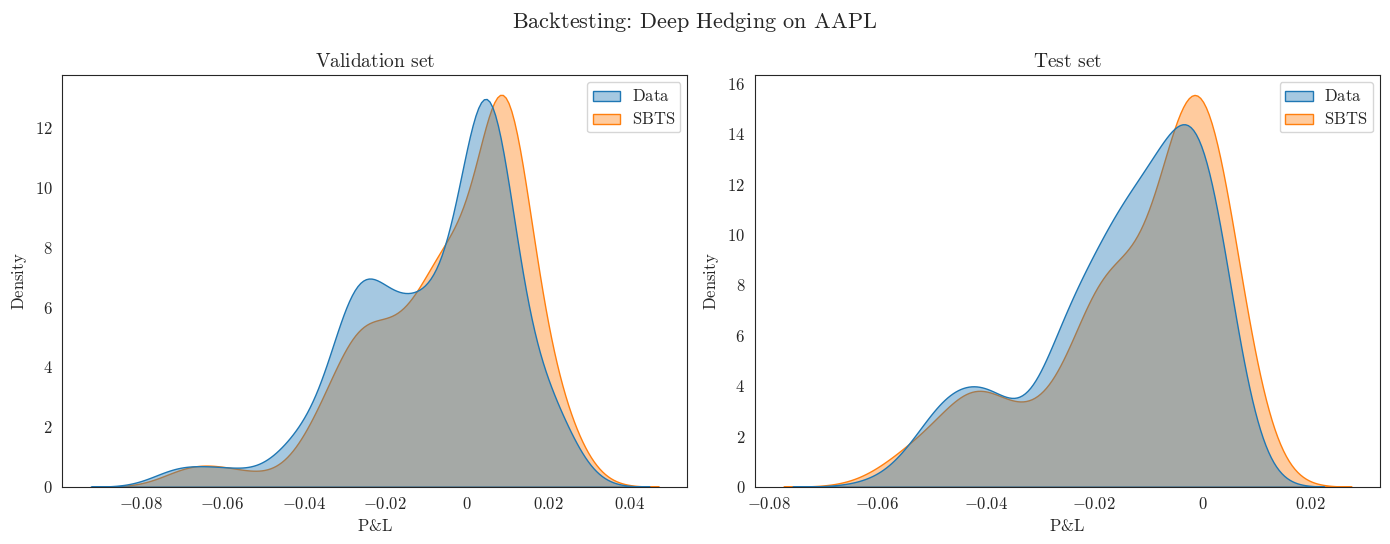

In [166]:
plot_PnL_distribution(dictio_PnL_val, dictio_PnL_test)

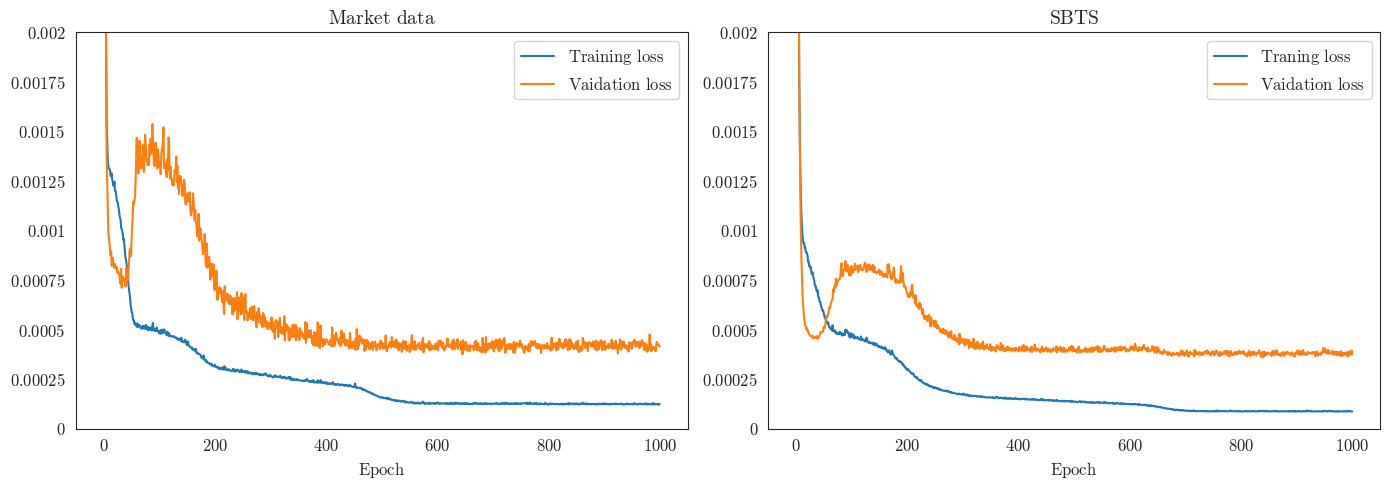

In [156]:
plot_loss_training(DeepHedging_Market, DeepHedging_SBTS)